<div class="alert alert-block alert-info">

# Imports

</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam, RMSprop
from keras.activations import relu, elu
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


<div class="alert alert-block alert-info">

# Dataframes

</div>

In [0]:
df_features = pd.read_csv('ted_main_features_580.csv',sep="|",quotechar='"')

In [6]:
df_features['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

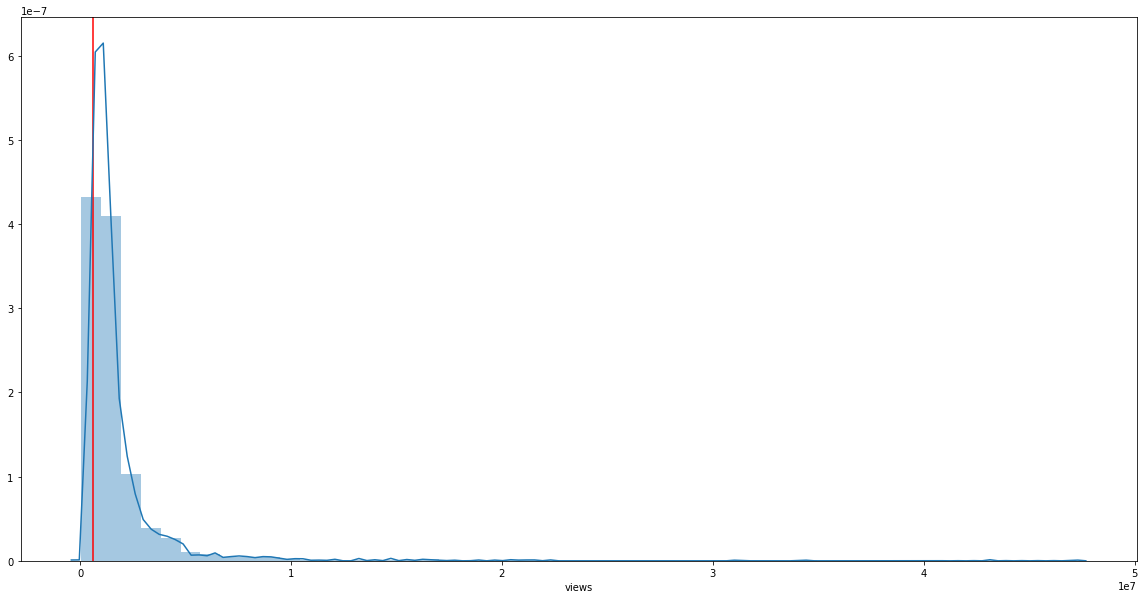

In [10]:
plt.figure(figsize=(20,10))
plt.axvline(600000, 0, 1, color='r')

sns.distplot(df_features['views']);

In [0]:
df_features.columns

Index(['comments', 'duration', 'languages', 'num_speaker', 'views',
       'film_month', 'film_dayofweek', 'published_month',
       'published_dayofweek', 'event_TED',
       ...
       'word_world', 'word_worldwide', 'word_worth', 'word_write',
       'word_writer', 'word_wrong', 'word_ye', 'word_year', 'word_york',
       'word_young'],
      dtype='object', length=580)

In [0]:
df_features.shape

(2550, 580)

In [0]:
df_features.head()

,comments,duration,languages,num_speaker,views,film_month,film_dayofweek,published_month,published_dayofweek,event_TED,...,word_world,word_worldwide,word_worth,word_write,word_writer,word_wrong,word_ye,word_year,word_york,word_young
0,10,810,1,1,418368,8,5,9,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3,795,1,1,542088,8,5,9,4,1,...,0,0,0,0,0,0,0,0,0,0
2,8,723,4,1,707788,8,5,9,4,1,...,0,0,0,0,0,0,0,0,1,0
3,10,934,2,1,527314,8,5,9,2,1,...,0,0,0,0,0,0,0,0,0,0
4,33,722,4,1,613915,7,2,9,3,1,...,1,0,0,0,0,0,0,0,0,0


<div class="alert alert-block alert-info">

# Dummies

</div>

## Create Dummies

In [0]:
df_published_month = pd.get_dummies(df_features['published_month'],prefix='published_month',drop_first=True)
df_published_day = pd.get_dummies(df_features['published_dayofweek'],prefix='published_dayofweek',drop_first=True)

In [0]:
df_published_month.head(2)

,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0


In [0]:
df_published_day.head(2)

,published_dayofweek_1,published_dayofweek_2,published_dayofweek_3,published_dayofweek_4,published_dayofweek_5,published_dayofweek_6
0,1,0,0,0,0,0
1,0,0,0,1,0,0


In [0]:
print(df_published_month.shape)
print(df_published_day.shape)

(2550, 11)
(2550, 6)


## Drop Columns

In [0]:
df_features = df_features.drop(columns=['film_month','film_dayofweek','published_month',
                                        'published_dayofweek','duration','tag_social_change',
                                        'tag_personal_growth','tag_global_issues'])
df_features.head()

,comments,languages,num_speaker,views,event_TED,event_TEDx,event_noTED,previous_talks,previous_talk_views,previous_views_sum,...,word_world,word_worldwide,word_worth,word_write,word_writer,word_wrong,word_ye,word_year,word_york,word_young
0,10,1,1,418368,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,542088,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,4,1,707788,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10,2,1,527314,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,4,1,613915,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Join Dummies

In [0]:
df_features = df_features.merge(df_published_month, left_index=True, right_index=True)
df_features = df_features.merge(df_published_day, left_index=True, right_index=True)
df_features.head()

,comments,languages,num_speaker,views,event_TED,event_TEDx,event_noTED,previous_talks,previous_talk_views,previous_views_sum,...,published_month_9,published_month_10,published_month_11,published_month_12,published_dayofweek_1,published_dayofweek_2,published_dayofweek_3,published_dayofweek_4,published_dayofweek_5,published_dayofweek_6
0,10,1,1,418368,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,3,1,1,542088,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,8,4,1,707788,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,10,2,1,527314,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,33,4,1,613915,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


<div class="alert alert-block alert-info">

# Train, Test, Split

</div>

In [0]:
# Generamos la matriz X y el vector y
X = df_features.drop(columns=['views'])
y = df_features['views']

In [0]:
# Separamos train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [0]:
# Estandarizamos las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Chequeamos las shapes
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (2040, 588)
X test shape:  (510, 588)
y train shape:  (2040,)
y test shape:  (510,)


In [0]:
from keras import backend as K

def r2_for_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [0]:
# Primero, definimos una función que permita construir el modelo, donde todos los valores de los hiperparámetros se obtienen del diccionario params 

model = Sequential()

model.add(Dense(512, input_dim=X_train.shape[1]))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae',r2_for_keras])

In [0]:
history = model.fit(X_train, y_train, batch_size=32, epochs=1500, validation_split = 0.3, 
                    verbose=1)

Train on 1428 samples, validate on 612 samples
Epoch 1/1500
1428/1428 [==============================] - 2s 1ms/step - loss: 9799346502532.6621 - mean_absolute_error: 1678562.4685 - r2_for_keras: -1.1759 - val_loss: 7722877011097.9346 - val_mean_absolute_error: 1734312.1891 - val_r2_for_keras: -1.2438
Epoch 2/1500
1428/1428 [==============================] - 0s 149us/step - loss: 9799346479035.1602 - mean_absolute_error: 1678562.3456 - r2_for_keras: -1.3584 - val_loss: 7722876542922.4561 - val_mean_absolute_error: 1734312.0376 - val_r2_for_keras: -1.2438
Epoch 3/1500
1428/1428 [==============================] - 0s 148us/step - loss: 9799345624313.5449 - mean_absolute_error: 1678562.1618 - r2_for_keras: -1.2712 - val_loss: 7722875773195.7129 - val_mean_absolute_error: 1734311.8007 - val_r2_for_keras: -1.2438
Epoch 4/1500
1428/1428 [==============================] - 0s 150us/step - loss: 9799344801900.9980 - mean_absolute_error: 1678561.9321 - r2_for_keras: -1.3909 - val_loss: 7722874825

1428/1428 [==============================] - 0s 173us/step - loss: 9799186862343.8887 - mean_absolute_error: 1678522.3309 - r2_for_keras: -1.2527 - val_loss: 7722719935441.1504 - val_mean_absolute_error: 1734269.1471 - val_r2_for_keras: -1.2438
Epoch 33/1500
1428/1428 [==============================] - 0s 153us/step - loss: 9799172474162.9121 - mean_absolute_error: 1678517.2164 - r2_for_keras: -1.3494 - val_loss: 7722699279607.6348 - val_mean_absolute_error: 1734263.6025 - val_r2_for_keras: -1.2438
Epoch 34/1500
1428/1428 [==============================] - 0s 142us/step - loss: 9799169439313.7480 - mean_absolute_error: 1678512.9620 - r2_for_keras: -1.2656 - val_loss: 7722678746279.3203 - val_mean_absolute_error: 1734258.1033 - val_r2_for_keras: -1.2438
Epoch 35/1500
1428/1428 [==============================] - 0s 165us/step - loss: 9799117294686.6562 - mean_absolute_error: 1678505.6327 - r2_for_keras: -1.2973 - val_loss: 7722653171819.0840 - val_mean_absolute_error: 1734251.3088 - val_

Epoch 64/1500
1428/1428 [==============================] - 0s 141us/step - loss: 9795807618745.0078 - mean_absolute_error: 1677803.5578 - r2_for_keras: -1.4519 - val_loss: 7720034056847.8955 - val_mean_absolute_error: 1733588.2124 - val_r2_for_keras: -1.2426
Epoch 65/1500
1428/1428 [==============================] - 0s 140us/step - loss: 9795561981739.7422 - mean_absolute_error: 1677761.0392 - r2_for_keras: -1.3747 - val_loss: 7719834725034.6670 - val_mean_absolute_error: 1733539.5335 - val_r2_for_keras: -1.2425
Epoch 66/1500
1428/1428 [==============================] - 0s 141us/step - loss: 9795317748710.1855 - mean_absolute_error: 1677715.4762 - r2_for_keras: -1.1648 - val_loss: 7719634575948.9668 - val_mean_absolute_error: 1733490.3770 - val_r2_for_keras: -1.2424
Epoch 67/1500
1428/1428 [==============================] - 0s 141us/step - loss: 9794860804549.1992 - mean_absolute_error: 1677645.8403 - r2_for_keras: -1.2647 - val_loss: 7719413035141.8564 - val_mean_absolute_error: 17334

Epoch 96/1500
1428/1428 [==============================] - 0s 141us/step - loss: 9778181950558.6562 - mean_absolute_error: 1674539.6513 - r2_for_keras: -1.2466 - val_loss: 7707884479160.0527 - val_mean_absolute_error: 1730727.5458 - val_r2_for_keras: -1.2375
Epoch 97/1500
1428/1428 [==============================] - 0s 144us/step - loss: 9776871878208.5371 - mean_absolute_error: 1674383.3067 - r2_for_keras: -1.3658 - val_loss: 7707289393433.0967 - val_mean_absolute_error: 1730590.7917 - val_r2_for_keras: -1.2372
Epoch 98/1500
1428/1428 [==============================] - 0s 141us/step - loss: 9776894397626.4414 - mean_absolute_error: 1674300.1071 - r2_for_keras: -1.3009 - val_loss: 7706680239311.4785 - val_mean_absolute_error: 1730450.9461 - val_r2_for_keras: -1.2370
Epoch 99/1500
1428/1428 [==============================] - 0s 143us/step - loss: 9773136277744.9414 - mean_absolute_error: 1674089.7458 - r2_for_keras: -1.3385 - val_loss: 7705985028711.7373 - val_mean_absolute_error: 17302

1428/1428 [==============================] - 0s 151us/step - loss: 9730458933483.2051 - mean_absolute_error: 1667039.7549 - r2_for_keras: -1.2922 - val_loss: 7679851289820.8623 - val_mean_absolute_error: 1724472.6119 - val_r2_for_keras: -1.2258
Epoch 128/1500
1428/1428 [==============================] - 0s 151us/step - loss: 9731825789748.3477 - mean_absolute_error: 1667101.7311 - r2_for_keras: -1.3175 - val_loss: 7678757721857.6738 - val_mean_absolute_error: 1724231.2614 - val_r2_for_keras: -1.2254
Epoch 129/1500
1428/1428 [==============================] - 0s 143us/step - loss: 9729220258291.0918 - mean_absolute_error: 1666481.4457 - r2_for_keras: -1.2516 - val_loss: 7677579511366.2754 - val_mean_absolute_error: 1723971.5923 - val_r2_for_keras: -1.2249
Epoch 130/1500
1428/1428 [==============================] - 0s 145us/step - loss: 9722701842862.2520 - mean_absolute_error: 1665967.4440 - r2_for_keras: -1.2030 - val_loss: 7676404363933.2812 - val_mean_absolute_error: 1723712.6454 - v

1428/1428 [==============================] - 0s 150us/step - loss: 9636341837238.8574 - mean_absolute_error: 1653720.8708 - r2_for_keras: -1.1985 - val_loss: 7629531407460.3926 - val_mean_absolute_error: 1713627.6806 - val_r2_for_keras: -1.2053
Epoch 159/1500
1428/1428 [==============================] - 0s 146us/step - loss: 9624849153497.2773 - mean_absolute_error: 1652859.6681 - r2_for_keras: -1.1947 - val_loss: 7627406594128.3145 - val_mean_absolute_error: 1713174.6368 - val_r2_for_keras: -1.2044
Epoch 160/1500
1428/1428 [==============================] - 0s 142us/step - loss: 9644551906083.1367 - mean_absolute_error: 1652831.1639 - r2_for_keras: -1.2269 - val_loss: 7625423261455.0596 - val_mean_absolute_error: 1712750.1185 - val_r2_for_keras: -1.2036
Epoch 161/1500
1428/1428 [==============================] - 0s 145us/step - loss: 9630990790162.6445 - mean_absolute_error: 1652343.6775 - r2_for_keras: -1.2424 - val_loss: 7623356061120.4189 - val_mean_absolute_error: 1712309.8480 - v

1428/1428 [==============================] - 0s 143us/step - loss: 9473084863117.9844 - mean_absolute_error: 1631314.0441 - r2_for_keras: -1.3847 - val_loss: 7546129423473.7783 - val_mean_absolute_error: 1696044.9154 - val_r2_for_keras: -1.1717
Epoch 190/1500
1428/1428 [==============================] - 0s 143us/step - loss: 9454029120841.8613 - mean_absolute_error: 1630007.3316 - r2_for_keras: -1.2158 - val_loss: 7542275818435.7637 - val_mean_absolute_error: 1695241.2165 - val_r2_for_keras: -1.1702
Epoch 191/1500
1428/1428 [==============================] - 0s 147us/step - loss: 9448244548536.2910 - mean_absolute_error: 1629792.0935 - r2_for_keras: -1.1608 - val_loss: 7538646350801.1504 - val_mean_absolute_error: 1694486.5425 - val_r2_for_keras: -1.1687
Epoch 192/1500
1428/1428 [==============================] - 0s 141us/step - loss: 9446978481131.9219 - mean_absolute_error: 1628472.4065 - r2_for_keras: -1.2861 - val_loss: 7534905820635.1895 - val_mean_absolute_error: 1693707.6859 - v

1428/1428 [==============================] - 0s 144us/step - loss: 9144737303508.9746 - mean_absolute_error: 1593466.0959 - r2_for_keras: -1.2347 - val_loss: 7411727120397.3857 - val_mean_absolute_error: 1668100.5139 - val_r2_for_keras: -1.1183
Epoch 221/1500
1428/1428 [==============================] - 0s 142us/step - loss: 9219354879259.9668 - mean_absolute_error: 1594618.7286 - r2_for_keras: -1.1604 - val_loss: 7406742547757.1768 - val_mean_absolute_error: 1667060.6793 - val_r2_for_keras: -1.1163
Epoch 222/1500
1428/1428 [==============================] - 0s 143us/step - loss: 9177698315656.9648 - mean_absolute_error: 1592587.1581 - r2_for_keras: -1.1168 - val_loss: 7401585206800.7324 - val_mean_absolute_error: 1665988.1601 - val_r2_for_keras: -1.1143
Epoch 223/1500
1428/1428 [==============================] - 0s 143us/step - loss: 9258926884789.4219 - mean_absolute_error: 1594211.9135 - r2_for_keras: -1.0902 - val_loss: 7397100905572.3926 - val_mean_absolute_error: 1665041.0486 - v

1428/1428 [==============================] - 0s 143us/step - loss: 8912554415353.5449 - mean_absolute_error: 1545598.3186 - r2_for_keras: -1.0463 - val_loss: 7224068496390.6924 - val_mean_absolute_error: 1628903.3807 - val_r2_for_keras: -1.0446
Epoch 252/1500
1428/1428 [==============================] - 0s 141us/step - loss: 8863614804862.9238 - mean_absolute_error: 1542553.9338 - r2_for_keras: -1.0495 - val_loss: 7217366061992.9941 - val_mean_absolute_error: 1627483.6275 - val_r2_for_keras: -1.0419
Epoch 253/1500
1428/1428 [==============================] - 0s 143us/step - loss: 8877877728000.7168 - mean_absolute_error: 1542040.3859 - r2_for_keras: -0.9485 - val_loss: 7210595783271.7373 - val_mean_absolute_error: 1626040.8668 - val_r2_for_keras: -1.0393
Epoch 254/1500
1428/1428 [==============================] - 0s 143us/step - loss: 8832599183899.2480 - mean_absolute_error: 1538989.3739 - r2_for_keras: -0.9659 - val_loss: 7202856066054.6924 - val_mean_absolute_error: 1624420.6033 - v

1428/1428 [==============================] - 0s 148us/step - loss: 8322197145433.6357 - mean_absolute_error: 1471040.8901 - r2_for_keras: -0.7894 - val_loss: 6964433469332.9150 - val_mean_absolute_error: 1573776.3007 - val_r2_for_keras: -0.9440
Epoch 283/1500
1428/1428 [==============================] - 0s 154us/step - loss: 8354578026300.9531 - mean_absolute_error: 1472127.2388 - r2_for_keras: -0.8103 - val_loss: 6955040628147.0322 - val_mean_absolute_error: 1571745.2966 - val_r2_for_keras: -0.9403
Epoch 284/1500
1428/1428 [==============================] - 0s 153us/step - loss: 8105452139930.1738 - mean_absolute_error: 1464763.1702 - r2_for_keras: -0.8028 - val_loss: 6944345757120.4180 - val_mean_absolute_error: 1569467.9367 - val_r2_for_keras: -0.9363
Epoch 285/1500
1428/1428 [==============================] - 0s 153us/step - loss: 8290471133321.6807 - mean_absolute_error: 1467546.5067 - r2_for_keras: -0.8386 - val_loss: 6935003893090.7188 - val_mean_absolute_error: 1567451.5490 - v

1428/1428 [==============================] - 0s 144us/step - loss: 7638439463342.2529 - mean_absolute_error: 1378577.2588 - r2_for_keras: -0.5369 - val_loss: 6634018592513.6729 - val_mean_absolute_error: 1501819.9714 - val_r2_for_keras: -0.8181
Epoch 314/1500
1428/1428 [==============================] - 0s 148us/step - loss: 7668969291087.5967 - mean_absolute_error: 1378046.8571 - r2_for_keras: -0.6907 - val_loss: 6623012448617.4121 - val_mean_absolute_error: 1499387.7443 - val_r2_for_keras: -0.8139
Epoch 315/1500
1428/1428 [==============================] - 0s 173us/step - loss: 7574444837018.8906 - mean_absolute_error: 1370775.1747 - r2_for_keras: -0.6183 - val_loss: 6610974880734.5361 - val_mean_absolute_error: 1496722.2692 - val_r2_for_keras: -0.8093
Epoch 316/1500
1428/1428 [==============================] - 0s 172us/step - loss: 7627870702824.3359 - mean_absolute_error: 1368137.0651 - r2_for_keras: -0.6426 - val_loss: 6598553530394.7715 - val_mean_absolute_error: 1494001.5008 - v

1428/1428 [==============================] - 0s 143us/step - loss: 7019206706528.8066 - mean_absolute_error: 1271265.2535 - r2_for_keras: -0.5541 - val_loss: 6231799615354.1436 - val_mean_absolute_error: 1411435.6060 - val_r2_for_keras: -0.6681
Epoch 345/1500
1428/1428 [==============================] - 0s 143us/step - loss: 6856303856642.8691 - mean_absolute_error: 1264507.0760 - r2_for_keras: -0.4647 - val_loss: 6218866338046.3271 - val_mean_absolute_error: 1408503.6201 - val_r2_for_keras: -0.6633
Epoch 346/1500
1428/1428 [==============================] - 0s 144us/step - loss: 6390992349591.3057 - mean_absolute_error: 1258962.8207 - r2_for_keras: -0.3773 - val_loss: 6203289298020.3926 - val_mean_absolute_error: 1405015.2945 - val_r2_for_keras: -0.6576
Epoch 347/1500
1428/1428 [==============================] - 0s 143us/step - loss: 7094212202530.4199 - mean_absolute_error: 1250688.8584 - r2_for_keras: -0.3555 - val_loss: 6191767498029.1768 - val_mean_absolute_error: 1402364.8280 - v

1428/1428 [==============================] - 0s 141us/step - loss: 6068189196161.7930 - mean_absolute_error: 1142844.7819 - r2_for_keras: -0.2515 - val_loss: 5783950762572.9678 - val_mean_absolute_error: 1309638.3873 - val_r2_for_keras: -0.5060
Epoch 376/1500
1428/1428 [==============================] - 0s 141us/step - loss: 5884867614542.1621 - mean_absolute_error: 1129285.9405 - r2_for_keras: -0.1926 - val_loss: 5770146187786.0391 - val_mean_absolute_error: 1306406.7486 - val_r2_for_keras: -0.5011
Epoch 377/1500
1428/1428 [==============================] - 0s 144us/step - loss: 6212523535477.6025 - mean_absolute_error: 1144987.1548 - r2_for_keras: -0.1596 - val_loss: 5753914929071.6865 - val_mean_absolute_error: 1302691.8566 - val_r2_for_keras: -0.4954
Epoch 378/1500
1428/1428 [==============================] - 0s 142us/step - loss: 6223167881583.1475 - mean_absolute_error: 1141104.7318 - r2_for_keras: -0.1896 - val_loss: 5739895201524.2871 - val_mean_absolute_error: 1299483.8533 - v

1428/1428 [==============================] - 0s 143us/step - loss: 4955596629413.6475 - mean_absolute_error: 1033951.7022 - r2_for_keras: 0.0141 - val_loss: 5311404909561.3076 - val_mean_absolute_error: 1201528.4886 - val_r2_for_keras: -0.3423
Epoch 407/1500
1428/1428 [==============================] - 0s 144us/step - loss: 5032301937236.6162 - mean_absolute_error: 1015833.3701 - r2_for_keras: 0.0508 - val_loss: 5298242123468.1309 - val_mean_absolute_error: 1198605.5300 - val_r2_for_keras: -0.3379
Epoch 408/1500
1428/1428 [==============================] - 0s 142us/step - loss: 5268020962174.9238 - mean_absolute_error: 1018233.7591 - r2_for_keras: -0.0493 - val_loss: 5282663225946.3525 - val_mean_absolute_error: 1195259.9060 - val_r2_for_keras: -0.3327
Epoch 409/1500
1428/1428 [==============================] - 0s 143us/step - loss: 4942790863071.7314 - mean_absolute_error: 1018782.2101 - r2_for_keras: 0.0593 - val_loss: 5267841075400.7842 - val_mean_absolute_error: 1192092.4665 - val_

Epoch 438/1500
1428/1428 [==============================] - 0s 141us/step - loss: 4315221220664.6499 - mean_absolute_error: 946285.3505 - r2_for_keras: 0.1146 - val_loss: 4844005832931.5557 - val_mean_absolute_error: 1110219.8476 - val_r2_for_keras: -0.1910
Epoch 439/1500
1428/1428 [==============================] - 0s 144us/step - loss: 3289062724031.4619 - mean_absolute_error: 921211.8768 - r2_for_keras: 0.1076 - val_loss: 4829584528618.2480 - val_mean_absolute_error: 1107711.8333 - val_r2_for_keras: -0.1865
Epoch 440/1500
1428/1428 [==============================] - 0s 142us/step - loss: 3901049025257.7700 - mean_absolute_error: 921029.4499 - r2_for_keras: 0.1315 - val_loss: 4815091258066.8232 - val_mean_absolute_error: 1105239.0229 - val_r2_for_keras: -0.1821
Epoch 441/1500
1428/1428 [==============================] - 0s 144us/step - loss: 3793355762392.5601 - mean_absolute_error: 929468.6814 - r2_for_keras: 0.1558 - val_loss: 4801023234770.8232 - val_mean_absolute_error: 1102832.4

Epoch 470/1500
1428/1428 [==============================] - 0s 143us/step - loss: 3360997634472.5151 - mean_absolute_error: 886472.7227 - r2_for_keras: 0.1973 - val_loss: 4438062908998.2744 - val_mean_absolute_error: 1048650.4763 - val_r2_for_keras: -0.0725
Epoch 471/1500
1428/1428 [==============================] - 0s 142us/step - loss: 3340428678806.5884 - mean_absolute_error: 860090.5872 - r2_for_keras: 0.2598 - val_loss: 4426997849523.0322 - val_mean_absolute_error: 1047305.2100 - val_r2_for_keras: -0.0695
Epoch 472/1500
1428/1428 [==============================] - 0s 146us/step - loss: 2955107589983.3726 - mean_absolute_error: 865431.5455 - r2_for_keras: 0.2333 - val_loss: 4416282657410.5098 - val_mean_absolute_error: 1045998.9322 - val_r2_for_keras: -0.0665
Epoch 473/1500
1428/1428 [==============================] - 0s 141us/step - loss: 2935644969745.9272 - mean_absolute_error: 858267.5830 - r2_for_keras: 0.2089 - val_loss: 4405184806162.4053 - val_mean_absolute_error: 1044670.0

Epoch 502/1500
1428/1428 [==============================] - 0s 142us/step - loss: 3218341696991.0137 - mean_absolute_error: 844770.6717 - r2_for_keras: 0.3311 - val_loss: 4130859589578.4580 - val_mean_absolute_error: 1016183.3472 - val_r2_for_keras: 0.0058
Epoch 503/1500
1428/1428 [==============================] - 0s 142us/step - loss: 2519031960917.3330 - mean_absolute_error: 810481.2985 - r2_for_keras: 0.3229 - val_loss: 4121730843266.5093 - val_mean_absolute_error: 1015441.1589 - val_r2_for_keras: 0.0079
Epoch 504/1500
1428/1428 [==============================] - 0s 141us/step - loss: 2976063255044.3022 - mean_absolute_error: 836348.8578 - r2_for_keras: 0.2732 - val_loss: 4113577648288.6274 - val_mean_absolute_error: 1014727.8509 - val_r2_for_keras: 0.0098
Epoch 505/1500
1428/1428 [==============================] - 0s 142us/step - loss: 2340131782242.9580 - mean_absolute_error: 828646.8813 - r2_for_keras: 0.1880 - val_loss: 4105488638326.7979 - val_mean_absolute_error: 1014059.9555

Epoch 534/1500
1428/1428 [==============================] - 0s 141us/step - loss: 2232593253178.0840 - mean_absolute_error: 819495.7642 - r2_for_keras: 0.1393 - val_loss: 3889176384532.0791 - val_mean_absolute_error: 999262.2492 - val_r2_for_keras: 0.0592
Epoch 535/1500
1428/1428 [==============================] - 0s 140us/step - loss: 2587986428087.5742 - mean_absolute_error: 820938.3692 - r2_for_keras: 0.1768 - val_loss: 3882312674605.1768 - val_mean_absolute_error: 998902.1716 - val_r2_for_keras: 0.0607
Epoch 536/1500
1428/1428 [==============================] - 0s 142us/step - loss: 2634528237883.5181 - mean_absolute_error: 844641.5487 - r2_for_keras: 0.1712 - val_loss: 3875813433932.9673 - val_mean_absolute_error: 998570.5261 - val_r2_for_keras: 0.0621
Epoch 537/1500
1428/1428 [==============================] - 0s 144us/step - loss: 2619995393807.0586 - mean_absolute_error: 831967.1901 - r2_for_keras: 0.2003 - val_loss: 3868673941236.2876 - val_mean_absolute_error: 998210.5588 - v

1428/1428 [==============================] - 0s 141us/step - loss: 3117562463676.5938 - mean_absolute_error: 830201.9219 - r2_for_keras: 0.2779 - val_loss: 3719303914810.5615 - val_mean_absolute_error: 988609.5576 - val_r2_for_keras: 0.0945
Epoch 567/1500
1428/1428 [==============================] - 0s 141us/step - loss: 2205365289923.7646 - mean_absolute_error: 825240.6471 - r2_for_keras: 0.1606 - val_loss: 3717337675896.4702 - val_mean_absolute_error: 988208.1724 - val_r2_for_keras: 0.0952
Epoch 568/1500
1428/1428 [==============================] - 0s 141us/step - loss: 2187621254175.5518 - mean_absolute_error: 793791.1259 - r2_for_keras: 0.2950 - val_loss: 3713312846279.1108 - val_mean_absolute_error: 987898.7484 - val_r2_for_keras: 0.0960
Epoch 569/1500
1428/1428 [==============================] - 0s 143us/step - loss: 2121969816825.5464 - mean_absolute_error: 787134.0744 - r2_for_keras: 0.2885 - val_loss: 3710070527638.5884 - val_mean_absolute_error: 987586.7096 - val_r2_for_keras

1428/1428 [==============================] - 0s 144us/step - loss: 2630528687370.7563 - mean_absolute_error: 800754.8964 - r2_for_keras: 0.2818 - val_loss: 3596721563045.6470 - val_mean_absolute_error: 977598.1793 - val_r2_for_keras: 0.1206
Epoch 599/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1695813801714.3752 - mean_absolute_error: 775334.3330 - r2_for_keras: 0.3517 - val_loss: 3594707305947.1890 - val_mean_absolute_error: 977235.7002 - val_r2_for_keras: 0.1212
Epoch 600/1500
1428/1428 [==============================] - 0s 145us/step - loss: 1808587718564.2131 - mean_absolute_error: 798825.5054 - r2_for_keras: 0.2490 - val_loss: 3590424242216.1572 - val_mean_absolute_error: 976872.0556 - val_r2_for_keras: 0.1220
Epoch 601/1500
1428/1428 [==============================] - 0s 143us/step - loss: 2615194234891.4736 - mean_absolute_error: 791820.3995 - r2_for_keras: 0.3661 - val_loss: 3586140983162.1436 - val_mean_absolute_error: 976553.1609 - val_r2_for_keras

1428/1428 [==============================] - 0s 143us/step - loss: 1769431893528.3809 - mean_absolute_error: 770127.8794 - r2_for_keras: 0.1636 - val_loss: 3503628953211.8169 - val_mean_absolute_error: 965912.2467 - val_r2_for_keras: 0.1421
Epoch 631/1500
1428/1428 [==============================] - 0s 143us/step - loss: 2040902336098.9578 - mean_absolute_error: 777775.1932 - r2_for_keras: 0.3825 - val_loss: 3501245147176.1567 - val_mean_absolute_error: 965529.5997 - val_r2_for_keras: 0.1427
Epoch 632/1500
1428/1428 [==============================] - 0s 143us/step - loss: 2113026944989.5798 - mean_absolute_error: 775585.4149 - r2_for_keras: 0.3406 - val_loss: 3496983718463.5815 - val_mean_absolute_error: 965239.1528 - val_r2_for_keras: 0.1433
Epoch 633/1500
1428/1428 [==============================] - 0s 142us/step - loss: 2244076017669.7363 - mean_absolute_error: 802363.0791 - r2_for_keras: 0.3696 - val_loss: 3493887704445.4902 - val_mean_absolute_error: 964842.7202 - val_r2_for_keras

1428/1428 [==============================] - 0s 140us/step - loss: 2284297596205.1763 - mean_absolute_error: 781934.2525 - r2_for_keras: 0.2876 - val_loss: 3402802060508.8628 - val_mean_absolute_error: 954012.6556 - val_r2_for_keras: 0.1640
Epoch 663/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1924933939073.7927 - mean_absolute_error: 749310.0450 - r2_for_keras: 0.3149 - val_loss: 3398332465044.9150 - val_mean_absolute_error: 953710.2296 - val_r2_for_keras: 0.1646
Epoch 664/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1799577212474.8010 - mean_absolute_error: 746865.0289 - r2_for_keras: 0.3403 - val_loss: 3397404998716.2354 - val_mean_absolute_error: 953319.6168 - val_r2_for_keras: 0.1650
Epoch 665/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1953219568556.8181 - mean_absolute_error: 773852.8270 - r2_for_keras: 0.2734 - val_loss: 3395116074673.3594 - val_mean_absolute_error: 952904.9910 - val_r2_for_keras

1428/1428 [==============================] - 0s 143us/step - loss: 1562976402125.0867 - mean_absolute_error: 744482.2244 - r2_for_keras: 0.3896 - val_loss: 3321962418470.4839 - val_mean_absolute_error: 942293.3260 - val_r2_for_keras: 0.1820
Epoch 695/1500
1428/1428 [==============================] - 0s 142us/step - loss: 2241796712671.7310 - mean_absolute_error: 764339.4014 - r2_for_keras: 0.3622 - val_loss: 3319169777878.1699 - val_mean_absolute_error: 941921.2312 - val_r2_for_keras: 0.1826
Epoch 696/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1640998435946.1289 - mean_absolute_error: 744205.5431 - r2_for_keras: 0.4013 - val_loss: 3322349689113.0981 - val_mean_absolute_error: 941480.7749 - val_r2_for_keras: 0.1827
Epoch 697/1500
1428/1428 [==============================] - 0s 141us/step - loss: 2590254716061.7588 - mean_absolute_error: 779790.8368 - r2_for_keras: 0.3926 - val_loss: 3319398770942.3267 - val_mean_absolute_error: 941183.7802 - val_r2_for_keras

1428/1428 [==============================] - 0s 141us/step - loss: 1743958262264.8291 - mean_absolute_error: 729582.9139 - r2_for_keras: 0.4217 - val_loss: 3273131457060.8105 - val_mean_absolute_error: 930447.4996 - val_r2_for_keras: 0.1969
Epoch 727/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1784429843751.4399 - mean_absolute_error: 721971.8711 - r2_for_keras: 0.4411 - val_loss: 3270006300083.0327 - val_mean_absolute_error: 930164.2198 - val_r2_for_keras: 0.1974
Epoch 728/1500
1428/1428 [==============================] - 0s 141us/step - loss: 2092527733212.1458 - mean_absolute_error: 740532.3859 - r2_for_keras: 0.3668 - val_loss: 3266457349635.3462 - val_mean_absolute_error: 929841.6197 - val_r2_for_keras: 0.1979
Epoch 729/1500
1428/1428 [==============================] - 0s 141us/step - loss: 2506441392403.3613 - mean_absolute_error: 764775.0168 - r2_for_keras: 0.2902 - val_loss: 3266281613780.4966 - val_mean_absolute_error: 929483.2578 - val_r2_for_keras

1428/1428 [==============================] - 0s 141us/step - loss: 1649858494509.8936 - mean_absolute_error: 718271.3375 - r2_for_keras: 0.3837 - val_loss: 3206729379545.5161 - val_mean_absolute_error: 919607.5678 - val_r2_for_keras: 0.2117
Epoch 759/1500
1428/1428 [==============================] - 0s 142us/step - loss: 2560610187705.7256 - mean_absolute_error: 746532.3722 - r2_for_keras: 0.3307 - val_loss: 3207187901098.6665 - val_mean_absolute_error: 919261.8056 - val_r2_for_keras: 0.2121
Epoch 760/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1702002789332.9749 - mean_absolute_error: 736176.7151 - r2_for_keras: 0.3108 - val_loss: 3205390244763.6079 - val_mean_absolute_error: 919004.5343 - val_r2_for_keras: 0.2125
Epoch 761/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1388316744465.9272 - mean_absolute_error: 710418.2358 - r2_for_keras: 0.3242 - val_loss: 3204593325718.5884 - val_mean_absolute_error: 918712.4428 - val_r2_for_keras

1428/1428 [==============================] - 0s 142us/step - loss: 1494116835305.0532 - mean_absolute_error: 707314.6075 - r2_for_keras: 0.2835 - val_loss: 3145183134552.6797 - val_mean_absolute_error: 910322.8276 - val_r2_for_keras: 0.2250
Epoch 791/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1630268901852.1458 - mean_absolute_error: 703006.7055 - r2_for_keras: 0.3813 - val_loss: 3142669003541.7515 - val_mean_absolute_error: 910104.4592 - val_r2_for_keras: 0.2255
Epoch 792/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1999134734869.5125 - mean_absolute_error: 725552.5616 - r2_for_keras: 0.3478 - val_loss: 3141055992102.4839 - val_mean_absolute_error: 909832.0098 - val_r2_for_keras: 0.2258
Epoch 793/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1521627243115.5630 - mean_absolute_error: 697102.2101 - r2_for_keras: 0.4648 - val_loss: 3138759054248.9937 - val_mean_absolute_error: 909555.5613 - val_r2_for_keras

1428/1428 [==============================] - 0s 144us/step - loss: 1774370072524.3699 - mean_absolute_error: 725426.4506 - r2_for_keras: 0.3200 - val_loss: 3084168169351.5293 - val_mean_absolute_error: 901336.5670 - val_r2_for_keras: 0.2383
Epoch 823/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1784200316853.4231 - mean_absolute_error: 679847.4135 - r2_for_keras: 0.4788 - val_loss: 3080103291669.7515 - val_mean_absolute_error: 901153.1397 - val_r2_for_keras: 0.2389
Epoch 824/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1948272046825.7703 - mean_absolute_error: 692194.6868 - r2_for_keras: 0.4878 - val_loss: 3079222366181.2285 - val_mean_absolute_error: 900854.4428 - val_r2_for_keras: 0.2393
Epoch 825/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1643589758758.0056 - mean_absolute_error: 692074.6836 - r2_for_keras: 0.4643 - val_loss: 3081729606917.0195 - val_mean_absolute_error: 900595.9130 - val_r2_for_keras

1428/1428 [==============================] - 0s 141us/step - loss: 1890387956205.3557 - mean_absolute_error: 688090.7127 - r2_for_keras: 0.5241 - val_loss: 3053731553440.6274 - val_mean_absolute_error: 893512.5711 - val_r2_for_keras: 0.2476
Epoch 855/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1336950815207.6191 - mean_absolute_error: 673192.8130 - r2_for_keras: 0.4878 - val_loss: 3059556056017.1504 - val_mean_absolute_error: 893122.5580 - val_r2_for_keras: 0.2475
Epoch 856/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1910983307091.8992 - mean_absolute_error: 682961.6289 - r2_for_keras: 0.5166 - val_loss: 3055383802953.6211 - val_mean_absolute_error: 893007.3288 - val_r2_for_keras: 0.2480
Epoch 857/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1865868777018.8010 - mean_absolute_error: 691227.1282 - r2_for_keras: 0.4615 - val_loss: 3053248491868.0264 - val_mean_absolute_error: 892885.9943 - val_r2_for_keras

1428/1428 [==============================] - 0s 145us/step - loss: 1642408626743.9326 - mean_absolute_error: 702468.1098 - r2_for_keras: 0.4251 - val_loss: 3023348862092.5488 - val_mean_absolute_error: 887265.2606 - val_r2_for_keras: 0.2552
Epoch 887/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1405860989771.2942 - mean_absolute_error: 647122.8342 - r2_for_keras: 0.4222 - val_loss: 3021282090526.1177 - val_mean_absolute_error: 887081.4297 - val_r2_for_keras: 0.2556
Epoch 888/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1770938145324.4592 - mean_absolute_error: 674495.5681 - r2_for_keras: 0.5348 - val_loss: 3019054640964.6011 - val_mean_absolute_error: 886863.8023 - val_r2_for_keras: 0.2560
Epoch 889/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1403923197275.0701 - mean_absolute_error: 661792.8645 - r2_for_keras: 0.4488 - val_loss: 3018275001149.9087 - val_mean_absolute_error: 886681.6936 - val_r2_for_keras

1428/1428 [==============================] - 0s 143us/step - loss: 1557787635769.3669 - mean_absolute_error: 673582.7201 - r2_for_keras: 0.4341 - val_loss: 2975212732630.1699 - val_mean_absolute_error: 880951.5359 - val_r2_for_keras: 0.2647
Epoch 919/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1208481818480.5828 - mean_absolute_error: 646128.3676 - r2_for_keras: 0.5923 - val_loss: 2972497833154.0913 - val_mean_absolute_error: 880775.1516 - val_r2_for_keras: 0.2650
Epoch 920/1500
1428/1428 [==============================] - 0s 142us/step - loss: 2225140013520.6724 - mean_absolute_error: 693803.5902 - r2_for_keras: 0.5161 - val_loss: 2970237375293.9087 - val_mean_absolute_error: 880708.0478 - val_r2_for_keras: 0.2652
Epoch 921/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1297776652115.8992 - mean_absolute_error: 648572.1590 - r2_for_keras: 0.4367 - val_loss: 2967560305510.0654 - val_mean_absolute_error: 880579.8480 - val_r2_for_keras

1428/1428 [==============================] - 0s 142us/step - loss: 1876042035211.4734 - mean_absolute_error: 660123.8808 - r2_for_keras: 0.4715 - val_loss: 2932997283036.8628 - val_mean_absolute_error: 875690.8489 - val_r2_for_keras: 0.2727
Epoch 951/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1405508843365.1094 - mean_absolute_error: 643979.5160 - r2_for_keras: 0.5268 - val_loss: 2935690209105.9868 - val_mean_absolute_error: 875454.0862 - val_r2_for_keras: 0.2728
Epoch 952/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1208068528271.4172 - mean_absolute_error: 628193.0660 - r2_for_keras: 0.6065 - val_loss: 2936637941050.5620 - val_mean_absolute_error: 875301.2418 - val_r2_for_keras: 0.2730
Epoch 953/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1894983069569.7927 - mean_absolute_error: 667832.3815 - r2_for_keras: 0.5282 - val_loss: 2935154459159.4248 - val_mean_absolute_error: 875253.9281 - val_r2_for_keras

1428/1428 [==============================] - 0s 141us/step - loss: 1215416268369.7480 - mean_absolute_error: 655762.8832 - r2_for_keras: 0.5738 - val_loss: 2927985871477.1240 - val_mean_absolute_error: 871620.2855 - val_r2_for_keras: 0.2774
Epoch 983/1500
1428/1428 [==============================] - 0s 140us/step - loss: 1322407089585.1206 - mean_absolute_error: 635786.4261 - r2_for_keras: 0.5444 - val_loss: 2927466575778.3008 - val_mean_absolute_error: 871518.2010 - val_r2_for_keras: 0.2775
Epoch 984/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1654127199676.5940 - mean_absolute_error: 625927.7085 - r2_for_keras: 0.4403 - val_loss: 2926011022074.9805 - val_mean_absolute_error: 871377.6789 - val_r2_for_keras: 0.2777
Epoch 985/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1196067432763.5181 - mean_absolute_error: 642458.6359 - r2_for_keras: 0.4789 - val_loss: 2926019651409.9868 - val_mean_absolute_error: 871240.1062 - val_r2_for_keras

1428/1428 [==============================] - 0s 141us/step - loss: 1369935037471.5518 - mean_absolute_error: 637068.0107 - r2_for_keras: 0.5273 - val_loss: 2891277128402.8237 - val_mean_absolute_error: 867917.1740 - val_r2_for_keras: 0.2825
Epoch 1015/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1349030901237.9607 - mean_absolute_error: 637830.1898 - r2_for_keras: 0.5350 - val_loss: 2887050786722.3008 - val_mean_absolute_error: 867813.7018 - val_r2_for_keras: 0.2827
Epoch 1016/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1816742355884.8181 - mean_absolute_error: 642996.7345 - r2_for_keras: 0.5490 - val_loss: 2890384176415.7910 - val_mean_absolute_error: 867714.1912 - val_r2_for_keras: 0.2827
Epoch 1017/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1392288285360.4033 - mean_absolute_error: 631215.5492 - r2_for_keras: 0.5155 - val_loss: 2891818561562.7715 - val_mean_absolute_error: 867585.0237 - val_r2_for_ke

Epoch 1046/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1140085710870.9468 - mean_absolute_error: 597367.6530 - r2_for_keras: 0.5932 - val_loss: 2868702061989.6470 - val_mean_absolute_error: 864453.5400 - val_r2_for_keras: 0.2876
Epoch 1047/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1539222227787.2942 - mean_absolute_error: 625233.6250 - r2_for_keras: 0.5616 - val_loss: 2864381754535.3203 - val_mean_absolute_error: 864319.2149 - val_r2_for_keras: 0.2879
Epoch 1048/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1541346064688.0449 - mean_absolute_error: 635746.0074 - r2_for_keras: 0.5885 - val_loss: 2863111573048.8887 - val_mean_absolute_error: 864197.0621 - val_r2_for_keras: 0.2880
Epoch 1049/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1500256774275.9441 - mean_absolute_error: 629367.6686 - r2_for_keras: 0.5859 - val_loss: 2866261362995.8691 - val_mean_absolute_error: 864098.4044

Epoch 1078/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1263513106460.6836 - mean_absolute_error: 597392.0000 - r2_for_keras: 0.5515 - val_loss: 2860493603458.5098 - val_mean_absolute_error: 861535.0392 - val_r2_for_keras: 0.2913
Epoch 1079/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1379263735343.3276 - mean_absolute_error: 627927.4679 - r2_for_keras: 0.5636 - val_loss: 2857856192378.1436 - val_mean_absolute_error: 861356.3382 - val_r2_for_keras: 0.2916
Epoch 1080/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1273160085607.2605 - mean_absolute_error: 621005.0082 - r2_for_keras: 0.5887 - val_loss: 2856129243818.6665 - val_mean_absolute_error: 861222.5931 - val_r2_for_keras: 0.2918
Epoch 1081/1500
1428/1428 [==============================] - 0s 142us/step - loss: 2009614704571.1594 - mean_absolute_error: 675396.7959 - r2_for_keras: 0.4339 - val_loss: 2852704455392.2090 - val_mean_absolute_error: 861098.5596

Epoch 1110/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1171113557694.7451 - mean_absolute_error: 589654.0643 - r2_for_keras: 0.6157 - val_loss: 2841230778314.4575 - val_mean_absolute_error: 858553.5074 - val_r2_for_keras: 0.2947
Epoch 1111/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1442604234780.6836 - mean_absolute_error: 604445.5924 - r2_for_keras: 0.5480 - val_loss: 2841700433705.8301 - val_mean_absolute_error: 858467.7733 - val_r2_for_keras: 0.2949
Epoch 1112/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1060981295855.5071 - mean_absolute_error: 592600.9373 - r2_for_keras: 0.5022 - val_loss: 2842009964517.2285 - val_mean_absolute_error: 858439.3170 - val_r2_for_keras: 0.2949
Epoch 1113/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1254726695583.1931 - mean_absolute_error: 615981.4558 - r2_for_keras: 0.5431 - val_loss: 2840661203653.4380 - val_mean_absolute_error: 858382.5020

Epoch 1142/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1177100695718.3640 - mean_absolute_error: 600328.7957 - r2_for_keras: 0.6173 - val_loss: 2829516460754.8237 - val_mean_absolute_error: 856245.3734 - val_r2_for_keras: 0.2974
Epoch 1143/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1298483198485.5127 - mean_absolute_error: 620907.0047 - r2_for_keras: 0.5876 - val_loss: 2831714116708.3921 - val_mean_absolute_error: 856157.1920 - val_r2_for_keras: 0.2974
Epoch 1144/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1401195981436.7732 - mean_absolute_error: 602163.4758 - r2_for_keras: 0.5385 - val_loss: 2834505045226.2485 - val_mean_absolute_error: 856136.0143 - val_r2_for_keras: 0.2973
Epoch 1145/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1047400093701.7367 - mean_absolute_error: 598217.7239 - r2_for_keras: 0.6099 - val_loss: 2832969047153.7778 - val_mean_absolute_error: 856079.4779

1428/1428 [==============================] - 0s 142us/step - loss: 1725473224181.9607 - mean_absolute_error: 610831.5998 - r2_for_keras: 0.5454 - val_loss: 2810365066514.4053 - val_mean_absolute_error: 854457.4833 - val_r2_for_keras: 0.3001
Epoch 1174/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1695796263950.3418 - mean_absolute_error: 621486.3018 - r2_for_keras: 0.5418 - val_loss: 2813866681551.4771 - val_mean_absolute_error: 854458.2516 - val_r2_for_keras: 0.2999
Epoch 1175/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1159062085012.4370 - mean_absolute_error: 584943.3083 - r2_for_keras: 0.5736 - val_loss: 2818399831515.1895 - val_mean_absolute_error: 854459.4310 - val_r2_for_keras: 0.2996
Epoch 1176/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1340116467253.0645 - mean_absolute_error: 611617.2495 - r2_for_keras: 0.5984 - val_loss: 2815469405552.1045 - val_mean_absolute_error: 854390.2684 - val_r2_for_ke

Epoch 1205/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1419876120650.5769 - mean_absolute_error: 611685.2180 - r2_for_keras: 0.5584 - val_loss: 2782660025350.6929 - val_mean_absolute_error: 853096.6822 - val_r2_for_keras: 0.3029
Epoch 1206/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1832811602401.8823 - mean_absolute_error: 613564.8817 - r2_for_keras: 0.6040 - val_loss: 2778607556246.5884 - val_mean_absolute_error: 853108.2627 - val_r2_for_keras: 0.3030
Epoch 1207/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1322868246040.3809 - mean_absolute_error: 588455.9322 - r2_for_keras: 0.6405 - val_loss: 2782241874401.8823 - val_mean_absolute_error: 853007.1279 - val_r2_for_keras: 0.3031
Epoch 1208/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1784991602188.9075 - mean_absolute_error: 624851.9715 - r2_for_keras: 0.5482 - val_loss: 2786578368391.5293 - val_mean_absolute_error: 852889.9126

Epoch 1237/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1539935300220.7732 - mean_absolute_error: 598734.5599 - r2_for_keras: 0.5609 - val_loss: 2778722302929.1504 - val_mean_absolute_error: 851830.0233 - val_r2_for_keras: 0.3043
Epoch 1238/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1164060506553.7256 - mean_absolute_error: 586649.7889 - r2_for_keras: 0.5915 - val_loss: 2780207748330.2485 - val_mean_absolute_error: 851735.4359 - val_r2_for_keras: 0.3043
Epoch 1239/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1415232317204.7957 - mean_absolute_error: 580106.2729 - r2_for_keras: 0.6189 - val_loss: 2778820794970.3530 - val_mean_absolute_error: 851706.1965 - val_r2_for_keras: 0.3044
Epoch 1240/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1958110807714.0615 - mean_absolute_error: 611410.0809 - r2_for_keras: 0.5703 - val_loss: 2779408506826.4575 - val_mean_absolute_error: 851691.9853

Epoch 1269/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1446590416683.7422 - mean_absolute_error: 584723.1119 - r2_for_keras: 0.5679 - val_loss: 2767780074408.9937 - val_mean_absolute_error: 851001.0433 - val_r2_for_keras: 0.3057
Epoch 1270/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1418655332013.5352 - mean_absolute_error: 606465.1571 - r2_for_keras: 0.5831 - val_loss: 2766065941778.4053 - val_mean_absolute_error: 850977.8194 - val_r2_for_keras: 0.3057
Epoch 1271/1500
1428/1428 [==============================] - 0s 143us/step - loss: 978001978101.2438 - mean_absolute_error: 556814.2219 - r2_for_keras: 0.6849 - val_loss: 2767182009149.9087 - val_mean_absolute_error: 850973.2761 - val_r2_for_keras: 0.3056
Epoch 1272/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1555307571240.1567 - mean_absolute_error: 604990.4765 - r2_for_keras: 0.5714 - val_loss: 2765625945924.6011 - val_mean_absolute_error: 850982.9763 

Epoch 1301/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1162756055338.3081 - mean_absolute_error: 570185.1595 - r2_for_keras: 0.6523 - val_loss: 2767507146952.7842 - val_mean_absolute_error: 850214.3056 - val_r2_for_keras: 0.3059
Epoch 1302/1500
1428/1428 [==============================] - 0s 141us/step - loss: 2006083514746.6218 - mean_absolute_error: 596449.5721 - r2_for_keras: 0.5870 - val_loss: 2770484239259.6079 - val_mean_absolute_error: 850257.2651 - val_r2_for_keras: 0.3057
Epoch 1303/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1194613503202.5994 - mean_absolute_error: 571564.2848 - r2_for_keras: 0.5646 - val_loss: 2778979117524.4966 - val_mean_absolute_error: 850295.0621 - val_r2_for_keras: 0.3053
Epoch 1304/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1666444666644.7957 - mean_absolute_error: 601531.8790 - r2_for_keras: 0.5746 - val_loss: 2779888369556.9150 - val_mean_absolute_error: 850321.9620

Epoch 1333/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1458384018056.2466 - mean_absolute_error: 579357.3845 - r2_for_keras: 0.6466 - val_loss: 2759255457792.0000 - val_mean_absolute_error: 849917.6716 - val_r2_for_keras: 0.3065
Epoch 1334/1500
1428/1428 [==============================] - 0s 141us/step - loss: 968637202845.0420 - mean_absolute_error: 586763.3965 - r2_for_keras: 0.5805 - val_loss: 2756165811902.7451 - val_mean_absolute_error: 849980.4052 - val_r2_for_keras: 0.3066
Epoch 1335/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1752241956766.4761 - mean_absolute_error: 608288.6457 - r2_for_keras: 0.6203 - val_loss: 2757713646719.1636 - val_mean_absolute_error: 849927.6434 - val_r2_for_keras: 0.3065
Epoch 1336/1500
1428/1428 [==============================] - 0s 145us/step - loss: 1356351730731.0251 - mean_absolute_error: 594128.8570 - r2_for_keras: 0.5842 - val_loss: 2762363018567.9478 - val_mean_absolute_error: 849956.2190 

Epoch 1365/1500
1428/1428 [==============================] - 0s 146us/step - loss: 897074232517.9159 - mean_absolute_error: 560304.6269 - r2_for_keras: 0.6381 - val_loss: 2739927052957.2812 - val_mean_absolute_error: 850051.9894 - val_r2_for_keras: 0.3061
Epoch 1366/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1205773398440.5154 - mean_absolute_error: 578588.3563 - r2_for_keras: 0.6092 - val_loss: 2739233487610.9805 - val_mean_absolute_error: 850081.7688 - val_r2_for_keras: 0.3060
Epoch 1367/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1252880106343.9775 - mean_absolute_error: 584925.4680 - r2_for_keras: 0.6250 - val_loss: 2737387524818.8237 - val_mean_absolute_error: 850083.6989 - val_r2_for_keras: 0.3060
Epoch 1368/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1400835821281.1653 - mean_absolute_error: 591379.3825 - r2_for_keras: 0.5981 - val_loss: 2740613614518.3789 - val_mean_absolute_error: 849983.0106 

Epoch 1397/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1626569946200.9189 - mean_absolute_error: 582122.0555 - r2_for_keras: 0.6161 - val_loss: 2710835498338.7188 - val_mean_absolute_error: 849904.6454 - val_r2_for_keras: 0.3063
Epoch 1398/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1223177664081.7480 - mean_absolute_error: 579856.7200 - r2_for_keras: 0.6103 - val_loss: 2709387185292.5488 - val_mean_absolute_error: 849931.6275 - val_r2_for_keras: 0.3062
Epoch 1399/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1682253243859.5408 - mean_absolute_error: 569344.2363 - r2_for_keras: 0.6309 - val_loss: 2710471471987.4512 - val_mean_absolute_error: 849788.2921 - val_r2_for_keras: 0.3064
Epoch 1400/1500
1428/1428 [==============================] - 0s 145us/step - loss: 2072852216525.0867 - mean_absolute_error: 595791.4663 - r2_for_keras: 0.6201 - val_loss: 2717878971800.2612 - val_mean_absolute_error: 849657.5253

Epoch 1429/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1230684599935.6414 - mean_absolute_error: 571162.9538 - r2_for_keras: 0.6499 - val_loss: 2702319846446.8496 - val_mean_absolute_error: 849509.8154 - val_r2_for_keras: 0.3078
Epoch 1430/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1028412903274.8459 - mean_absolute_error: 553172.6852 - r2_for_keras: 0.7019 - val_loss: 2702322065675.7124 - val_mean_absolute_error: 849439.8967 - val_r2_for_keras: 0.3079
Epoch 1431/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1161723196504.9189 - mean_absolute_error: 564313.7174 - r2_for_keras: 0.6556 - val_loss: 2701361657441.0459 - val_mean_absolute_error: 849449.2557 - val_r2_for_keras: 0.3080
Epoch 1432/1500
1428/1428 [==============================] - 0s 142us/step - loss: 2085932581552.4033 - mean_absolute_error: 601308.4261 - r2_for_keras: 0.6019 - val_loss: 2699055207444.0786 - val_mean_absolute_error: 849518.6989

Epoch 1461/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1343436575718.1848 - mean_absolute_error: 566459.4368 - r2_for_keras: 0.6702 - val_loss: 2695768852038.2744 - val_mean_absolute_error: 849333.3182 - val_r2_for_keras: 0.3084
Epoch 1462/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1077117996402.0167 - mean_absolute_error: 557011.6637 - r2_for_keras: 0.6654 - val_loss: 2694100490521.0981 - val_mean_absolute_error: 849369.2337 - val_r2_for_keras: 0.3085
Epoch 1463/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1274279638196.7058 - mean_absolute_error: 543627.4906 - r2_for_keras: 0.6712 - val_loss: 2692571593466.9805 - val_mean_absolute_error: 849407.8570 - val_r2_for_keras: 0.3085
Epoch 1464/1500
1428/1428 [==============================] - 0s 144us/step - loss: 1287548516426.5769 - mean_absolute_error: 575043.7523 - r2_for_keras: 0.6099 - val_loss: 2697121615738.1436 - val_mean_absolute_error: 849214.3243

Epoch 1493/1500
1428/1428 [==============================] - 0s 141us/step - loss: 1100271011214.7002 - mean_absolute_error: 552134.4447 - r2_for_keras: 0.6049 - val_loss: 2701450084780.3398 - val_mean_absolute_error: 849318.6352 - val_r2_for_keras: 0.3086
Epoch 1494/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1050091579845.1989 - mean_absolute_error: 546927.9342 - r2_for_keras: 0.6229 - val_loss: 2700030312019.6602 - val_mean_absolute_error: 849254.3676 - val_r2_for_keras: 0.3086
Epoch 1495/1500
1428/1428 [==============================] - 0s 142us/step - loss: 1269691629246.7451 - mean_absolute_error: 565939.2085 - r2_for_keras: 0.6275 - val_loss: 2701202182224.3140 - val_mean_absolute_error: 849192.5731 - val_r2_for_keras: 0.3087
Epoch 1496/1500
1428/1428 [==============================] - 0s 143us/step - loss: 1017001150618.8907 - mean_absolute_error: 552000.0965 - r2_for_keras: 0.6896 - val_loss: 2702814575569.1504 - val_mean_absolute_error: 849079.0237

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_r2_for_keras', 'loss', 'mean_absolute_error', 'r2_for_keras'])

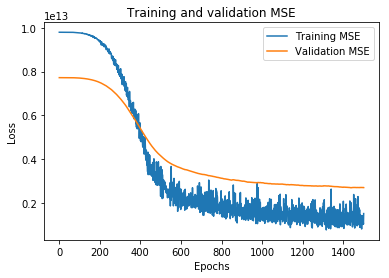

In [0]:
import matplotlib.pyplot as plt

acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es por "blue dot"
plt.plot(epochs, loss, label='Training MSE')
# b es por "solid blue line"
plt.plot(epochs, val_loss, label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

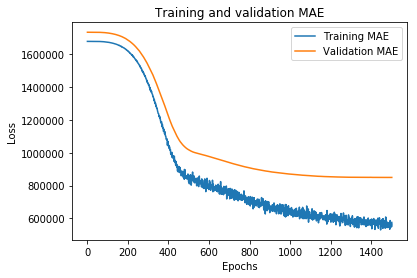

In [0]:
# "bo" es por "blue dot"
plt.plot(epochs, acc, label='Training MAE')
# b es por "solid blue line"
plt.plot(epochs, val_acc, label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
# Primero, definimos una función que permita construir el modelo, donde todos los valores de los hiperparámetros se obtienen del diccionario params 

model2 = Sequential()

model2.add(Dense(512, input_dim=X_train.shape[1]))
model2.add(Activation('relu'))

model2.add(Dense(256))
model2.add(Activation('relu'))

model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))

model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))

model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dropout(0.6))

model2.add(Dense(1))

model2.compile(optimizer=RMSprop(lr=1e-5), loss='mse', metrics=['mae',r2_for_keras])

In [0]:
history2 = model2.fit(X_train, y_train, batch_size=16, epochs=1500, validation_split = 0.3, 
                    verbose=1)

Train on 1428 samples, validate on 612 samples
Epoch 1/1500
1428/1428 [==============================] - 1s 524us/step - loss: 9799346198533.7363 - mean_absolute_error: 1678562.3032 - r2_for_keras: -2.0104 - val_loss: 7722876521933.8037 - val_mean_absolute_error: 1734312.0502 - val_r2_for_keras: -2.0943
Epoch 2/1500
1428/1428 [==============================] - 0s 282us/step - loss: 9799345585762.9590 - mean_absolute_error: 1678562.0917 - r2_for_keras: -2.0840 - val_loss: 7722876055043.3467 - val_mean_absolute_error: 1734311.9024 - val_r2_for_keras: -2.0943
Epoch 3/1500
1428/1428 [==============================] - 0s 279us/step - loss: 9799345149223.4395 - mean_absolute_error: 1678561.9496 - r2_for_keras: -1.9620 - val_loss: 7722875460507.6074 - val_mean_absolute_error: 1734311.7639 - val_r2_for_keras: -2.0943
Epoch 4/1500
1428/1428 [==============================] - 0s 277us/step - loss: 9799344665321.7715 - mean_absolute_error: 1678561.8277 - r2_for_keras: -2.2658 - val_loss: 77228748

1428/1428 [==============================] - 0s 280us/step - loss: 9798506250607.1484 - mean_absolute_error: 1678344.1954 - r2_for_keras: -1.9507 - val_loss: 7722028205102.8496 - val_mean_absolute_error: 1734082.3215 - val_r2_for_keras: -2.0936
Epoch 33/1500
1428/1428 [==============================] - 0s 278us/step - loss: 9798308432118.6777 - mean_absolute_error: 1678307.6996 - r2_for_keras: -1.9406 - val_loss: 7721898889724.6533 - val_mean_absolute_error: 1734047.6119 - val_r2_for_keras: -2.0935
Epoch 34/1500
1428/1428 [==============================] - 0s 278us/step - loss: 9798220950920.9629 - mean_absolute_error: 1678266.6243 - r2_for_keras: -1.9221 - val_loss: 7721745224509.9082 - val_mean_absolute_error: 1734006.3260 - val_r2_for_keras: -2.0933
Epoch 35/1500
1428/1428 [==============================] - 0s 278us/step - loss: 9797911767860.3477 - mean_absolute_error: 1678222.1660 - r2_for_keras: -2.1247 - val_loss: 7721562262989.8037 - val_mean_absolute_error: 1733957.5082 - val_

Epoch 64/1500
1428/1428 [==============================] - 0s 279us/step - loss: 9765179829916.3262 - mean_absolute_error: 1670791.3022 - r2_for_keras: -1.9275 - val_loss: 7694299156774.4834 - val_mean_absolute_error: 1726847.9297 - val_r2_for_keras: -2.0710
Epoch 65/1500
1428/1428 [==============================] - 0s 277us/step - loss: 9763904681461.9609 - mean_absolute_error: 1670177.7661 - r2_for_keras: -1.9386 - val_loss: 7691546523554.3008 - val_mean_absolute_error: 1726139.0956 - val_r2_for_keras: -2.0688
Epoch 66/1500
1428/1428 [==============================] - 0s 279us/step - loss: 9758095569320.5156 - mean_absolute_error: 1669491.5651 - r2_for_keras: -1.7188 - val_loss: 7689073698213.6475 - val_mean_absolute_error: 1725500.0960 - val_r2_for_keras: -2.0667
Epoch 67/1500
1428/1428 [==============================] - 0s 279us/step - loss: 9759820799564.0117 - mean_absolute_error: 1668550.5564 - r2_for_keras: -2.2495 - val_loss: 7685952915442.6143 - val_mean_absolute_error: 17246

Epoch 96/1500
1428/1428 [==============================] - 0s 279us/step - loss: 9462257711224.4707 - mean_absolute_error: 1604661.8775 - r2_for_keras: -1.8788 - val_loss: 7467863441408.0000 - val_mean_absolute_error: 1668540.8231 - val_r2_for_keras: -1.8877
Epoch 97/1500
1428/1428 [==============================] - 0s 277us/step - loss: 9371687083687.7988 - mean_absolute_error: 1600800.7778 - r2_for_keras: -1.6392 - val_loss: 7453006571560.1572 - val_mean_absolute_error: 1664702.4714 - val_r2_for_keras: -1.8757
Epoch 98/1500
1428/1428 [==============================] - 0s 277us/step - loss: 9365448685045.9609 - mean_absolute_error: 1595872.3690 - r2_for_keras: -1.6969 - val_loss: 7439599785087.1631 - val_mean_absolute_error: 1661200.7459 - val_r2_for_keras: -1.8649
Epoch 99/1500
1428/1428 [==============================] - 0s 276us/step - loss: 9351493214965.2422 - mean_absolute_error: 1591700.8606 - r2_for_keras: -1.6885 - val_loss: 7423935424337.9873 - val_mean_absolute_error: 16571

1428/1428 [==============================] - 0s 277us/step - loss: 8107115043418.3535 - mean_absolute_error: 1350701.0175 - r2_for_keras: -0.9477 - val_loss: 6668902052616.3662 - val_mean_absolute_error: 1449142.4765 - val_r2_for_keras: -1.2640
Epoch 128/1500
1428/1428 [==============================] - 0s 277us/step - loss: 8250140531152.6719 - mean_absolute_error: 1338334.5196 - r2_for_keras: -1.0142 - val_loss: 6628939889617.1504 - val_mean_absolute_error: 1437585.2288 - val_r2_for_keras: -1.2342
Epoch 129/1500
1428/1428 [==============================] - 0s 277us/step - loss: 8152936754293.6016 - mean_absolute_error: 1329933.2360 - r2_for_keras: -0.9311 - val_loss: 6587132793554.8232 - val_mean_absolute_error: 1425474.4510 - val_r2_for_keras: -1.2033
Epoch 130/1500
1428/1428 [==============================] - 0s 278us/step - loss: 7942406182183.4404 - mean_absolute_error: 1310945.6418 - r2_for_keras: -0.9617 - val_loss: 6542521081159.9473 - val_mean_absolute_error: 1412474.8697 - v

1428/1428 [==============================] - 0s 279us/step - loss: 5713226670974.9248 - mean_absolute_error: 1012329.9688 - r2_for_keras: -0.2750 - val_loss: 5350178386589.2812 - val_mean_absolute_error: 1100688.6448 - val_r2_for_keras: -0.4261
Epoch 159/1500
1428/1428 [==============================] - 0s 275us/step - loss: 5764657840495.1484 - mean_absolute_error: 1013975.0760 - r2_for_keras: -0.2518 - val_loss: 5319417221822.7451 - val_mean_absolute_error: 1095548.0249 - val_r2_for_keras: -0.4131
Epoch 160/1500
1428/1428 [==============================] - 0s 277us/step - loss: 5784666351059.5400 - mean_absolute_error: 1033968.2664 - r2_for_keras: -0.2846 - val_loss: 5292593792167.3203 - val_mean_absolute_error: 1091041.9105 - val_r2_for_keras: -0.4020
Epoch 161/1500
1428/1428 [==============================] - 0s 275us/step - loss: 5674904836055.8428 - mean_absolute_error: 1006737.4405 - r2_for_keras: -0.2786 - val_loss: 5265489347041.8828 - val_mean_absolute_error: 1086514.9695 - v

Epoch 190/1500
1428/1428 [==============================] - 0s 285us/step - loss: 4433704228135.4404 - mean_absolute_error: 977394.4293 - r2_for_keras: -0.1178 - val_loss: 4706921376962.0918 - val_mean_absolute_error: 1029277.4226 - val_r2_for_keras: -0.2771
Epoch 191/1500
1428/1428 [==============================] - 0s 285us/step - loss: 4663296834528.4482 - mean_absolute_error: 981198.4019 - r2_for_keras: -0.2151 - val_loss: 4693137968161.4639 - val_mean_absolute_error: 1028122.4702 - val_r2_for_keras: -0.2756
Epoch 192/1500
1428/1428 [==============================] - 0s 277us/step - loss: 4412940929683.7197 - mean_absolute_error: 974251.9912 - r2_for_keras: -0.3141 - val_loss: 4676824264088.2617 - val_mean_absolute_error: 1027100.9702 - val_r2_for_keras: -0.2749
Epoch 193/1500
1428/1428 [==============================] - 0s 277us/step - loss: 3974421362303.6416 - mean_absolute_error: 977082.7384 - r2_for_keras: -0.2178 - val_loss: 4665050668788.2871 - val_mean_absolute_error: 10259

Epoch 222/1500
1428/1428 [==============================] - 0s 279us/step - loss: 3806767960327.8882 - mean_absolute_error: 960729.7791 - r2_for_keras: -0.3512 - val_loss: 4327638234185.6211 - val_mean_absolute_error: 988792.6748 - val_r2_for_keras: -0.1981
Epoch 223/1500
1428/1428 [==============================] - 0s 277us/step - loss: 4527183786867.4512 - mean_absolute_error: 976222.9720 - r2_for_keras: -0.4566 - val_loss: 4316094706547.4512 - val_mean_absolute_error: 987348.6328 - val_r2_for_keras: -0.1947
Epoch 224/1500
1428/1428 [==============================] - 0s 277us/step - loss: 3892062456146.4648 - mean_absolute_error: 957018.6770 - r2_for_keras: -0.3663 - val_loss: 4303127637400.2612 - val_mean_absolute_error: 986334.6101 - val_r2_for_keras: -0.1932
Epoch 225/1500
1428/1428 [==============================] - 0s 276us/step - loss: 4162418526867.7202 - mean_absolute_error: 953283.3183 - r2_for_keras: -0.2596 - val_loss: 4290890695941.0195 - val_mean_absolute_error: 985024.3

Epoch 254/1500
1428/1428 [==============================] - 0s 277us/step - loss: 3019929876875.8320 - mean_absolute_error: 886819.2511 - r2_for_keras: -0.2476 - val_loss: 3958244228905.8301 - val_mean_absolute_error: 942930.5415 - val_r2_for_keras: -0.0989
Epoch 255/1500
1428/1428 [==============================] - 0s 275us/step - loss: 3685349283157.3330 - mean_absolute_error: 901478.3127 - r2_for_keras: -0.2981 - val_loss: 3947889732695.0063 - val_mean_absolute_error: 941192.8399 - val_r2_for_keras: -0.0949
Epoch 256/1500
1428/1428 [==============================] - 0s 282us/step - loss: 3083995316224.0000 - mean_absolute_error: 858798.7158 - r2_for_keras: -0.1343 - val_loss: 3936356539612.8628 - val_mean_absolute_error: 939791.1532 - val_r2_for_keras: -0.0924
Epoch 257/1500
1428/1428 [==============================] - 0s 279us/step - loss: 3761694535278.4316 - mean_absolute_error: 898154.9576 - r2_for_keras: -0.1207 - val_loss: 3924444069780.9150 - val_mean_absolute_error: 938299.0

Epoch 286/1500
1428/1428 [==============================] - 0s 277us/step - loss: 2505907958184.5151 - mean_absolute_error: 819424.3337 - r2_for_keras: -0.1395 - val_loss: 3626546366022.2744 - val_mean_absolute_error: 892215.8468 - val_r2_for_keras: 0.0081
Epoch 287/1500
1428/1428 [==============================] - 0s 276us/step - loss: 3270237674533.2886 - mean_absolute_error: 851971.7209 - r2_for_keras: -0.1444 - val_loss: 3614450291732.0786 - val_mean_absolute_error: 891213.1211 - val_r2_for_keras: 0.0092
Epoch 288/1500
1428/1428 [==============================] - 0s 276us/step - loss: 2918742166209.6133 - mean_absolute_error: 827037.5965 - r2_for_keras: -0.0385 - val_loss: 3601769496468.9150 - val_mean_absolute_error: 890035.4975 - val_r2_for_keras: 0.0109
Epoch 289/1500
1428/1428 [==============================] - 0s 281us/step - loss: 3406880844734.0278 - mean_absolute_error: 865973.6486 - r2_for_keras: -0.1858 - val_loss: 3590272276439.8433 - val_mean_absolute_error: 888225.8207

Epoch 318/1500
1428/1428 [==============================] - 0s 277us/step - loss: 3352103680395.8315 - mean_absolute_error: 806204.8346 - r2_for_keras: 0.1260 - val_loss: 3323858897418.0391 - val_mean_absolute_error: 846077.6373 - val_r2_for_keras: 0.0991
Epoch 319/1500
1428/1428 [==============================] - 0s 277us/step - loss: 2897754235407.7759 - mean_absolute_error: 803712.1411 - r2_for_keras: 0.0311 - val_loss: 3312398100520.1567 - val_mean_absolute_error: 844697.5304 - val_r2_for_keras: 0.1014
Epoch 320/1500
1428/1428 [==============================] - 0s 279us/step - loss: 3001599295579.7871 - mean_absolute_error: 754114.2416 - r2_for_keras: 0.1060 - val_loss: 3304828673887.3726 - val_mean_absolute_error: 843514.4187 - val_r2_for_keras: 0.1038
Epoch 321/1500
1428/1428 [==============================] - 0s 284us/step - loss: 2702119887421.6694 - mean_absolute_error: 785183.4961 - r2_for_keras: 0.1735 - val_loss: 3295213067270.6929 - val_mean_absolute_error: 842197.4011 - v

Epoch 350/1500
1428/1428 [==============================] - 0s 274us/step - loss: 2501463061868.2798 - mean_absolute_error: 740476.9657 - r2_for_keras: 0.2094 - val_loss: 3067030206263.2158 - val_mean_absolute_error: 808737.7921 - val_r2_for_keras: 0.1703
Epoch 351/1500
1428/1428 [==============================] - 0s 278us/step - loss: 2327196390098.8237 - mean_absolute_error: 769821.7230 - r2_for_keras: -0.0541 - val_loss: 3067911897302.1699 - val_mean_absolute_error: 807449.3999 - val_r2_for_keras: 0.1741
Epoch 352/1500
1428/1428 [==============================] - 0s 279us/step - loss: 2922738472736.2690 - mean_absolute_error: 793790.6786 - r2_for_keras: 0.0135 - val_loss: 3060762417433.0981 - val_mean_absolute_error: 806474.9828 - val_r2_for_keras: 0.1758
Epoch 353/1500
1428/1428 [==============================] - 0s 276us/step - loss: 2350089499048.5151 - mean_absolute_error: 757078.8831 - r2_for_keras: 0.2058 - val_loss: 3054153462215.1113 - val_mean_absolute_error: 805446.8084 - 

Epoch 382/1500
1428/1428 [==============================] - 0s 283us/step - loss: 1863892187577.7256 - mean_absolute_error: 720943.0707 - r2_for_keras: 0.2469 - val_loss: 2856103868429.3857 - val_mean_absolute_error: 776824.4028 - val_r2_for_keras: 0.2271
Epoch 383/1500
1428/1428 [==============================] - 0s 282us/step - loss: 1796097517493.4229 - mean_absolute_error: 701156.0881 - r2_for_keras: 0.1529 - val_loss: 2846727565552.9414 - val_mean_absolute_error: 776081.9963 - val_r2_for_keras: 0.2278
Epoch 384/1500
1428/1428 [==============================] - 0s 278us/step - loss: 2766347628234.2188 - mean_absolute_error: 746291.7824 - r2_for_keras: 0.1395 - val_loss: 2836330664551.7388 - val_mean_absolute_error: 775542.5750 - val_r2_for_keras: 0.2278
Epoch 385/1500
1428/1428 [==============================] - 0s 278us/step - loss: 2193087273883.6079 - mean_absolute_error: 711818.6744 - r2_for_keras: 0.2595 - val_loss: 2835339525822.7451 - val_mean_absolute_error: 774447.3531 - v

Epoch 414/1500
1428/1428 [==============================] - 0s 277us/step - loss: 2572834085512.2466 - mean_absolute_error: 690119.5872 - r2_for_keras: 0.1319 - val_loss: 2702733030045.2812 - val_mean_absolute_error: 749851.1699 - val_r2_for_keras: 0.2728
Epoch 415/1500
1428/1428 [==============================] - 0s 277us/step - loss: 2505753653397.1538 - mean_absolute_error: 697252.0199 - r2_for_keras: 0.2473 - val_loss: 2699122871115.2939 - val_mean_absolute_error: 749250.6648 - val_r2_for_keras: 0.2738
Epoch 416/1500
1428/1428 [==============================] - 0s 277us/step - loss: 2070034543291.8767 - mean_absolute_error: 706325.4174 - r2_for_keras: 0.2329 - val_loss: 2687484904816.1045 - val_mean_absolute_error: 748646.9016 - val_r2_for_keras: 0.2740
Epoch 417/1500
1428/1428 [==============================] - 0s 277us/step - loss: 2368198319278.9692 - mean_absolute_error: 685418.9028 - r2_for_keras: 0.1142 - val_loss: 2685100711668.2876 - val_mean_absolute_error: 748076.4579 - v

1428/1428 [==============================] - 0s 276us/step - loss: 2242428212519.4399 - mean_absolute_error: 676276.8234 - r2_for_keras: 0.2200 - val_loss: 2582016524180.9150 - val_mean_absolute_error: 728472.7649 - val_r2_for_keras: 0.3057
Epoch 447/1500
1428/1428 [==============================] - 0s 277us/step - loss: 2230410551364.8403 - mean_absolute_error: 679370.4664 - r2_for_keras: 0.2600 - val_loss: 2573090076149.9609 - val_mean_absolute_error: 727912.2337 - val_r2_for_keras: 0.3060
Epoch 448/1500
1428/1428 [==============================] - 0s 279us/step - loss: 1979445233073.1204 - mean_absolute_error: 662956.5460 - r2_for_keras: 0.3600 - val_loss: 2566849904747.0850 - val_mean_absolute_error: 727201.4449 - val_r2_for_keras: 0.3067
Epoch 449/1500
1428/1428 [==============================] - 0s 279us/step - loss: 1895956700197.2883 - mean_absolute_error: 669825.6682 - r2_for_keras: 0.2571 - val_loss: 2560799077021.2812 - val_mean_absolute_error: 726697.2259 - val_r2_for_keras

1428/1428 [==============================] - 0s 277us/step - loss: 2697769166888.1567 - mean_absolute_error: 681771.3459 - r2_for_keras: 0.2793 - val_loss: 2479789930937.7256 - val_mean_absolute_error: 711955.8166 - val_r2_for_keras: 0.3300
Epoch 479/1500
1428/1428 [==============================] - 0s 274us/step - loss: 2008639317964.3699 - mean_absolute_error: 664402.4753 - r2_for_keras: 0.2116 - val_loss: 2483494033046.5884 - val_mean_absolute_error: 711643.1266 - val_r2_for_keras: 0.3317
Epoch 480/1500
1428/1428 [==============================] - 0s 275us/step - loss: 2215527624256.5376 - mean_absolute_error: 663377.3950 - r2_for_keras: 0.3007 - val_loss: 2476414208950.3789 - val_mean_absolute_error: 710967.0094 - val_r2_for_keras: 0.3318
Epoch 481/1500
1428/1428 [==============================] - 0s 273us/step - loss: 1872715559129.9944 - mean_absolute_error: 661063.6769 - r2_for_keras: 0.2723 - val_loss: 2476624229985.0459 - val_mean_absolute_error: 710749.3513 - val_r2_for_keras

1428/1428 [==============================] - 0s 298us/step - loss: 1647096850793.4116 - mean_absolute_error: 643141.4949 - r2_for_keras: 0.2945 - val_loss: 2383353361160.3662 - val_mean_absolute_error: 699066.9873 - val_r2_for_keras: 0.3463
Epoch 511/1500
1428/1428 [==============================] - 0s 275us/step - loss: 2374388177498.3530 - mean_absolute_error: 669836.2013 - r2_for_keras: 0.3169 - val_loss: 2375059616841.6211 - val_mean_absolute_error: 698539.3358 - val_r2_for_keras: 0.3460
Epoch 512/1500
1428/1428 [==============================] - 0s 275us/step - loss: 2672400931188.8853 - mean_absolute_error: 680710.7595 - r2_for_keras: 0.2715 - val_loss: 2373719233020.6538 - val_mean_absolute_error: 698119.8070 - val_r2_for_keras: 0.3468
Epoch 513/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1467427799544.8291 - mean_absolute_error: 628140.8206 - r2_for_keras: 0.2919 - val_loss: 2370214384767.1636 - val_mean_absolute_error: 697677.0198 - val_r2_for_keras

1428/1428 [==============================] - 0s 275us/step - loss: 2155133869712.8516 - mean_absolute_error: 664072.4932 - r2_for_keras: 0.3427 - val_loss: 2328659196559.8955 - val_mean_absolute_error: 690422.3342 - val_r2_for_keras: 0.3607
Epoch 543/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1603253790163.5405 - mean_absolute_error: 627879.7595 - r2_for_keras: 0.3167 - val_loss: 2334093299149.8037 - val_mean_absolute_error: 690517.9685 - val_r2_for_keras: 0.3616
Epoch 544/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1391119374708.8850 - mean_absolute_error: 619381.4426 - r2_for_keras: 0.3302 - val_loss: 2336408464363.9214 - val_mean_absolute_error: 690494.7600 - val_r2_for_keras: 0.3621
Epoch 545/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1821608028842.6665 - mean_absolute_error: 626531.0606 - r2_for_keras: 0.3486 - val_loss: 2330846631574.5884 - val_mean_absolute_error: 690033.2680 - val_r2_for_keras

1428/1428 [==============================] - 0s 273us/step - loss: 2436067054933.3335 - mean_absolute_error: 659622.1078 - r2_for_keras: 0.2368 - val_loss: 2262280091447.2158 - val_mean_absolute_error: 683953.9248 - val_r2_for_keras: 0.3656
Epoch 575/1500
1428/1428 [==============================] - 0s 275us/step - loss: 2641312109863.4399 - mean_absolute_error: 649167.4680 - r2_for_keras: 0.3941 - val_loss: 2258978773273.0981 - val_mean_absolute_error: 683756.5862 - val_r2_for_keras: 0.3656
Epoch 576/1500
1428/1428 [==============================] - 0s 273us/step - loss: 2113502140020.1680 - mean_absolute_error: 655923.2587 - r2_for_keras: 0.3175 - val_loss: 2260472820809.6211 - val_mean_absolute_error: 683771.0758 - val_r2_for_keras: 0.3661
Epoch 577/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1787360164832.4482 - mean_absolute_error: 635414.2659 - r2_for_keras: 0.3329 - val_loss: 2255031309439.1636 - val_mean_absolute_error: 683489.2794 - val_r2_for_keras

1428/1428 [==============================] - 0s 277us/step - loss: 2049939572615.5293 - mean_absolute_error: 634054.4400 - r2_for_keras: 0.3569 - val_loss: 2214905064106.6665 - val_mean_absolute_error: 679541.0766 - val_r2_for_keras: 0.3708
Epoch 607/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1822972358300.3250 - mean_absolute_error: 613520.0783 - r2_for_keras: 0.3769 - val_loss: 2214668142685.6992 - val_mean_absolute_error: 679460.0825 - val_r2_for_keras: 0.3712
Epoch 608/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1757975248620.6387 - mean_absolute_error: 601946.6248 - r2_for_keras: 0.3707 - val_loss: 2216936204006.9019 - val_mean_absolute_error: 679448.2725 - val_r2_for_keras: 0.3720
Epoch 609/1500
1428/1428 [==============================] - 0s 272us/step - loss: 1713370243966.9243 - mean_absolute_error: 621705.7114 - r2_for_keras: 0.3914 - val_loss: 2218300422799.8955 - val_mean_absolute_error: 679515.1422 - val_r2_for_keras

1428/1428 [==============================] - 0s 277us/step - loss: 1724587185539.2271 - mean_absolute_error: 602552.1912 - r2_for_keras: 0.3973 - val_loss: 2169270589935.2681 - val_mean_absolute_error: 678153.9236 - val_r2_for_keras: 0.3710
Epoch 639/1500
1428/1428 [==============================] - 0s 277us/step - loss: 1340007990980.4819 - mean_absolute_error: 605686.1719 - r2_for_keras: 0.4298 - val_loss: 2178767952902.6929 - val_mean_absolute_error: 678435.1740 - val_r2_for_keras: 0.3728
Epoch 640/1500
1428/1428 [==============================] - 0s 276us/step - loss: 1370999479241.5015 - mean_absolute_error: 610040.2236 - r2_for_keras: 0.3831 - val_loss: 2173372204614.2744 - val_mean_absolute_error: 678445.8440 - val_r2_for_keras: 0.3720
Epoch 641/1500
1428/1428 [==============================] - 0s 278us/step - loss: 1799592097224.0674 - mean_absolute_error: 605738.8552 - r2_for_keras: 0.3827 - val_loss: 2173737764208.1045 - val_mean_absolute_error: 678363.9826 - val_r2_for_keras

1428/1428 [==============================] - 0s 277us/step - loss: 1742006320750.4312 - mean_absolute_error: 635275.4397 - r2_for_keras: 0.2639 - val_loss: 2156460369103.4771 - val_mean_absolute_error: 678431.4943 - val_r2_for_keras: 0.3743
Epoch 671/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1553796072250.0840 - mean_absolute_error: 601704.3911 - r2_for_keras: 0.4060 - val_loss: 2153553107760.5229 - val_mean_absolute_error: 678326.2508 - val_r2_for_keras: 0.3743
Epoch 672/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1947063297262.0730 - mean_absolute_error: 593358.6576 - r2_for_keras: 0.4801 - val_loss: 2149925560266.4575 - val_mean_absolute_error: 678244.1495 - val_r2_for_keras: 0.3738
Epoch 673/1500
1428/1428 [==============================] - 0s 273us/step - loss: 2673321624194.5098 - mean_absolute_error: 649005.1225 - r2_for_keras: 0.4047 - val_loss: 2149845197924.3921 - val_mean_absolute_error: 678290.4432 - val_r2_for_keras

1428/1428 [==============================] - 0s 275us/step - loss: 2069360262296.0225 - mean_absolute_error: 623678.8664 - r2_for_keras: 0.2991 - val_loss: 2134116985193.4119 - val_mean_absolute_error: 678569.3554 - val_r2_for_keras: 0.3733
Epoch 703/1500
1428/1428 [==============================] - 0s 277us/step - loss: 1993659154707.3613 - mean_absolute_error: 610217.0552 - r2_for_keras: 0.4700 - val_loss: 2127485385252.8105 - val_mean_absolute_error: 678419.7136 - val_r2_for_keras: 0.3724
Epoch 704/1500
1428/1428 [==============================] - 0s 274us/step - loss: 2032668157900.3699 - mean_absolute_error: 618744.9447 - r2_for_keras: 0.4780 - val_loss: 2121320076843.5032 - val_mean_absolute_error: 678220.1236 - val_r2_for_keras: 0.3714
Epoch 705/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1650345841546.3977 - mean_absolute_error: 609066.4907 - r2_for_keras: 0.4996 - val_loss: 2121934207631.8955 - val_mean_absolute_error: 678245.8039 - val_r2_for_keras

1428/1428 [==============================] - 0s 315us/step - loss: 1830801387439.6860 - mean_absolute_error: 599379.1052 - r2_for_keras: 0.4222 - val_loss: 2091560824644.6013 - val_mean_absolute_error: 680286.9657 - val_r2_for_keras: 0.3637
Epoch 735/1500
1428/1428 [==============================] - 0s 317us/step - loss: 2170503264697.7256 - mean_absolute_error: 611295.6798 - r2_for_keras: 0.3376 - val_loss: 2099195489902.4314 - val_mean_absolute_error: 680375.1573 - val_r2_for_keras: 0.3658
Epoch 736/1500
1428/1428 [==============================] - 0s 321us/step - loss: 1473346686505.5911 - mean_absolute_error: 581786.9342 - r2_for_keras: 0.4054 - val_loss: 2102528113831.3203 - val_mean_absolute_error: 680373.7210 - val_r2_for_keras: 0.3666
Epoch 737/1500
1428/1428 [==============================] - 0s 319us/step - loss: 2014738007897.6357 - mean_absolute_error: 608096.1853 - r2_for_keras: 0.4456 - val_loss: 2108340693781.7517 - val_mean_absolute_error: 680591.7696 - val_r2_for_keras

1428/1428 [==============================] - 0s 275us/step - loss: 1334778888788.6162 - mean_absolute_error: 568004.5256 - r2_for_keras: 0.5380 - val_loss: 2101507584133.8562 - val_mean_absolute_error: 683214.3595 - val_r2_for_keras: 0.3662
Epoch 767/1500
1428/1428 [==============================] - 0s 275us/step - loss: 2443108520337.5688 - mean_absolute_error: 596200.8547 - r2_for_keras: 0.4674 - val_loss: 2102671204084.2876 - val_mean_absolute_error: 683411.3840 - val_r2_for_keras: 0.3662
Epoch 768/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1933856242335.1934 - mean_absolute_error: 603397.5410 - r2_for_keras: 0.4657 - val_loss: 2107053724477.9084 - val_mean_absolute_error: 683654.6319 - val_r2_for_keras: 0.3671
Epoch 769/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1961804061182.5659 - mean_absolute_error: 599563.4659 - r2_for_keras: 0.4971 - val_loss: 2106898046815.3726 - val_mean_absolute_error: 683551.5852 - val_r2_for_keras

1428/1428 [==============================] - 0s 275us/step - loss: 1203279038894.2522 - mean_absolute_error: 558317.0821 - r2_for_keras: 0.5586 - val_loss: 2087052408738.3005 - val_mean_absolute_error: 686058.6708 - val_r2_for_keras: 0.3618
Epoch 799/1500
1428/1428 [==============================] - 0s 276us/step - loss: 1922872184774.6331 - mean_absolute_error: 622100.1437 - r2_for_keras: 0.3370 - val_loss: 2080963420641.8823 - val_mean_absolute_error: 686112.4026 - val_r2_for_keras: 0.3603
Epoch 800/1500
1428/1428 [==============================] - 0s 285us/step - loss: 1948012147387.8767 - mean_absolute_error: 592567.7741 - r2_for_keras: 0.5113 - val_loss: 2078190556072.9934 - val_mean_absolute_error: 686207.9252 - val_r2_for_keras: 0.3596
Epoch 801/1500
1428/1428 [==============================] - 0s 281us/step - loss: 2195212564325.1094 - mean_absolute_error: 557414.3905 - r2_for_keras: 0.5322 - val_loss: 2078752014443.0850 - val_mean_absolute_error: 686484.4959 - val_r2_for_keras

1428/1428 [==============================] - 0s 273us/step - loss: 1327230043121.6584 - mean_absolute_error: 578516.8666 - r2_for_keras: 0.4729 - val_loss: 2076676515558.9019 - val_mean_absolute_error: 689799.6401 - val_r2_for_keras: 0.3557
Epoch 831/1500
1428/1428 [==============================] - 0s 273us/step - loss: 1363179694166.0505 - mean_absolute_error: 592953.2362 - r2_for_keras: 0.4613 - val_loss: 2080014261361.7778 - val_mean_absolute_error: 690133.8858 - val_r2_for_keras: 0.3560
Epoch 832/1500
1428/1428 [==============================] - 0s 271us/step - loss: 2146073352381.3108 - mean_absolute_error: 599152.4200 - r2_for_keras: 0.5130 - val_loss: 2081600220354.0916 - val_mean_absolute_error: 690248.4898 - val_r2_for_keras: 0.3560
Epoch 833/1500
1428/1428 [==============================] - 0s 284us/step - loss: 1817219984180.3474 - mean_absolute_error: 598557.5083 - r2_for_keras: 0.4027 - val_loss: 2084721404479.5818 - val_mean_absolute_error: 690521.6842 - val_r2_for_keras

1428/1428 [==============================] - 0s 272us/step - loss: 2488160877697.0757 - mean_absolute_error: 585473.6124 - r2_for_keras: 0.5062 - val_loss: 2064660691492.8105 - val_mean_absolute_error: 693728.4391 - val_r2_for_keras: 0.3492
Epoch 863/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1688356759087.3279 - mean_absolute_error: 580465.2106 - r2_for_keras: 0.4784 - val_loss: 2059404834722.3005 - val_mean_absolute_error: 693758.6377 - val_r2_for_keras: 0.3476
Epoch 864/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1925371010704.8516 - mean_absolute_error: 606474.8556 - r2_for_keras: 0.3977 - val_loss: 2056559409807.8955 - val_mean_absolute_error: 693867.5261 - val_r2_for_keras: 0.3464
Epoch 865/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1794075817370.1736 - mean_absolute_error: 612708.3304 - r2_for_keras: 0.4714 - val_loss: 2058342306621.9084 - val_mean_absolute_error: 694044.1716 - val_r2_for_keras

1428/1428 [==============================] - 0s 274us/step - loss: 1198165473079.2156 - mean_absolute_error: 562114.2082 - r2_for_keras: 0.4174 - val_loss: 2054321117143.8430 - val_mean_absolute_error: 699264.6270 - val_r2_for_keras: 0.3402
Epoch 895/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1669920925369.0083 - mean_absolute_error: 574649.8463 - r2_for_keras: 0.5337 - val_loss: 2054046267191.2156 - val_mean_absolute_error: 699423.4812 - val_r2_for_keras: 0.3399
Epoch 896/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1455740283057.8374 - mean_absolute_error: 578450.5206 - r2_for_keras: 0.4479 - val_loss: 2058324541654.1699 - val_mean_absolute_error: 699755.2563 - val_r2_for_keras: 0.3403
Epoch 897/1500
1428/1428 [==============================] - 0s 276us/step - loss: 1465373756740.1233 - mean_absolute_error: 587184.7223 - r2_for_keras: 0.4848 - val_loss: 2059264251114.2483 - val_mean_absolute_error: 699887.6458 - val_r2_for_keras

1428/1428 [==============================] - 0s 279us/step - loss: 1364162659038.2969 - mean_absolute_error: 561248.3265 - r2_for_keras: 0.5341 - val_loss: 2042046583613.9084 - val_mean_absolute_error: 704510.2859 - val_r2_for_keras: 0.3308
Epoch 927/1500
1428/1428 [==============================] - 0s 290us/step - loss: 1506109187447.7534 - mean_absolute_error: 619402.0401 - r2_for_keras: 0.4387 - val_loss: 2045329295667.8694 - val_mean_absolute_error: 704775.5245 - val_r2_for_keras: 0.3314
Epoch 928/1500
1428/1428 [==============================] - 0s 334us/step - loss: 1492005541847.8430 - mean_absolute_error: 602344.9610 - r2_for_keras: 0.3738 - val_loss: 2050808756879.8955 - val_mean_absolute_error: 705230.1252 - val_r2_for_keras: 0.3321
Epoch 929/1500
1428/1428 [==============================] - 0s 305us/step - loss: 1369679724635.7871 - mean_absolute_error: 571378.0430 - r2_for_keras: 0.4646 - val_loss: 2048354287401.8301 - val_mean_absolute_error: 705378.4179 - val_r2_for_keras

1428/1428 [==============================] - 0s 301us/step - loss: 1369272360661.6919 - mean_absolute_error: 556534.4375 - r2_for_keras: 0.4488 - val_loss: 2040076284466.1960 - val_mean_absolute_error: 711244.1426 - val_r2_for_keras: 0.3223
Epoch 959/1500
1428/1428 [==============================] - 0s 324us/step - loss: 1465110688352.0896 - mean_absolute_error: 551471.9188 - r2_for_keras: 0.5267 - val_loss: 2039105964875.2942 - val_mean_absolute_error: 711434.0020 - val_r2_for_keras: 0.3218
Epoch 960/1500
1428/1428 [==============================] - 0s 300us/step - loss: 1224136652828.6836 - mean_absolute_error: 550012.9480 - r2_for_keras: 0.5634 - val_loss: 2039657811191.6340 - val_mean_absolute_error: 711606.0911 - val_r2_for_keras: 0.3214
Epoch 961/1500
1428/1428 [==============================] - 0s 309us/step - loss: 1067772388681.8600 - mean_absolute_error: 563568.5187 - r2_for_keras: 0.5093 - val_loss: 2036709443142.2744 - val_mean_absolute_error: 711740.8433 - val_r2_for_keras

1428/1428 [==============================] - 0s 274us/step - loss: 1819448539440.0447 - mean_absolute_error: 585457.1359 - r2_for_keras: 0.3404 - val_loss: 2039926946662.0654 - val_mean_absolute_error: 717750.0987 - val_r2_for_keras: 0.3122
Epoch 991/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1068207466897.5686 - mean_absolute_error: 557601.6565 - r2_for_keras: 0.5148 - val_loss: 2040416051146.4575 - val_mean_absolute_error: 717828.2034 - val_r2_for_keras: 0.3123
Epoch 992/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1219470639975.9775 - mean_absolute_error: 552659.2897 - r2_for_keras: 0.5125 - val_loss: 2044162276840.5752 - val_mean_absolute_error: 717911.5560 - val_r2_for_keras: 0.3133
Epoch 993/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1446329532278.3193 - mean_absolute_error: 584728.7029 - r2_for_keras: 0.4693 - val_loss: 2045123522800.9412 - val_mean_absolute_error: 718137.5462 - val_r2_for_keras

Epoch 1022/1500
1428/1428 [==============================] - 0s 272us/step - loss: 1530459087788.8179 - mean_absolute_error: 574421.0641 - r2_for_keras: 0.5089 - val_loss: 2028989797931.5032 - val_mean_absolute_error: 724890.1993 - val_r2_for_keras: 0.2964
Epoch 1023/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1332783640518.6331 - mean_absolute_error: 573167.6262 - r2_for_keras: 0.5128 - val_loss: 2026360232538.3530 - val_mean_absolute_error: 725148.8474 - val_r2_for_keras: 0.2952
Epoch 1024/1500
1428/1428 [==============================] - 0s 272us/step - loss: 1532432008039.9775 - mean_absolute_error: 588041.7486 - r2_for_keras: 0.4738 - val_loss: 2028131540617.2026 - val_mean_absolute_error: 725559.6303 - val_r2_for_keras: 0.2950
Epoch 1025/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1812395493989.8264 - mean_absolute_error: 579607.8429 - r2_for_keras: 0.4780 - val_loss: 2031654668595.8694 - val_mean_absolute_error: 725505.2835

Epoch 1054/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1375883101903.9551 - mean_absolute_error: 579823.3273 - r2_for_keras: 0.4800 - val_loss: 2027095879492.6013 - val_mean_absolute_error: 730921.4839 - val_r2_for_keras: 0.2857
Epoch 1055/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1779244490316.0112 - mean_absolute_error: 571873.1175 - r2_for_keras: 0.5535 - val_loss: 2024542168271.4771 - val_mean_absolute_error: 731162.7320 - val_r2_for_keras: 0.2847
Epoch 1056/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1695575204597.2437 - mean_absolute_error: 560486.5814 - r2_for_keras: 0.5362 - val_loss: 2028432629920.6274 - val_mean_absolute_error: 731218.2169 - val_r2_for_keras: 0.2860
Epoch 1057/1500
1428/1428 [==============================] - 0s 272us/step - loss: 1320186137052.1455 - mean_absolute_error: 570747.2857 - r2_for_keras: 0.5045 - val_loss: 2030542693583.4771 - val_mean_absolute_error: 731388.3015

Epoch 1086/1500
1428/1428 [==============================] - 0s 273us/step - loss: 1544781800427.9216 - mean_absolute_error: 573767.9532 - r2_for_keras: 0.4722 - val_loss: 2040621602240.4182 - val_mean_absolute_error: 737467.3407 - val_r2_for_keras: 0.2756
Epoch 1087/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1109346323137.6135 - mean_absolute_error: 554581.0352 - r2_for_keras: 0.4624 - val_loss: 2040167661996.3398 - val_mean_absolute_error: 737545.9696 - val_r2_for_keras: 0.2752
Epoch 1088/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1543676364794.2632 - mean_absolute_error: 585356.6352 - r2_for_keras: 0.4877 - val_loss: 2044480082856.9934 - val_mean_absolute_error: 737817.5012 - val_r2_for_keras: 0.2758
Epoch 1089/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1264776707132.2354 - mean_absolute_error: 566331.6624 - r2_for_keras: 0.4998 - val_loss: 2048428392876.3398 - val_mean_absolute_error: 737822.6027

Epoch 1118/1500
1428/1428 [==============================] - 0s 310us/step - loss: 1049264188120.5602 - mean_absolute_error: 532316.7523 - r2_for_keras: 0.5176 - val_loss: 2029965667522.0916 - val_mean_absolute_error: 742670.5658 - val_r2_for_keras: 0.2600
Epoch 1119/1500
1428/1428 [==============================] - 0s 338us/step - loss: 1235828291842.1511 - mean_absolute_error: 528336.7421 - r2_for_keras: 0.5496 - val_loss: 2031026039573.7517 - val_mean_absolute_error: 742981.1577 - val_r2_for_keras: 0.2594
Epoch 1120/1500
1428/1428 [==============================] - 0s 338us/step - loss: 1311336740663.2156 - mean_absolute_error: 562284.9230 - r2_for_keras: 0.4931 - val_loss: 2031646524998.2744 - val_mean_absolute_error: 743455.1029 - val_r2_for_keras: 0.2582
Epoch 1121/1500
1428/1428 [==============================] - 0s 323us/step - loss: 1290349581699.2271 - mean_absolute_error: 549026.9583 - r2_for_keras: 0.5272 - val_loss: 2027222145305.0981 - val_mean_absolute_error: 743866.5380

Epoch 1150/1500
1428/1428 [==============================] - 0s 277us/step - loss: 1177504641723.8767 - mean_absolute_error: 550574.3797 - r2_for_keras: 0.5446 - val_loss: 2035569055918.0132 - val_mean_absolute_error: 750752.0878 - val_r2_for_keras: 0.2430
Epoch 1151/1500
1428/1428 [==============================] - 0s 280us/step - loss: 2291056396947.7202 - mean_absolute_error: 599142.9216 - r2_for_keras: 0.3922 - val_loss: 2038223479158.7974 - val_mean_absolute_error: 750951.1957 - val_r2_for_keras: 0.2434
Epoch 1152/1500
1428/1428 [==============================] - 0s 278us/step - loss: 1496903220146.5547 - mean_absolute_error: 572604.2015 - r2_for_keras: 0.5317 - val_loss: 2043351017512.1570 - val_mean_absolute_error: 750923.7302 - val_r2_for_keras: 0.2453
Epoch 1153/1500
1428/1428 [==============================] - 0s 277us/step - loss: 961651729233.0308 - mean_absolute_error: 539981.4505 - r2_for_keras: 0.4872 - val_loss: 2044258746689.2549 - val_mean_absolute_error: 750985.2116 

Epoch 1182/1500
1428/1428 [==============================] - 0s 272us/step - loss: 1484637885781.3333 - mean_absolute_error: 546574.1391 - r2_for_keras: 0.5696 - val_loss: 2044939903779.1372 - val_mean_absolute_error: 757065.7851 - val_r2_for_keras: 0.2333
Epoch 1183/1500
1428/1428 [==============================] - 0s 281us/step - loss: 2647966327793.6582 - mean_absolute_error: 627850.0354 - r2_for_keras: 0.4883 - val_loss: 2044926782443.9216 - val_mean_absolute_error: 757317.0935 - val_r2_for_keras: 0.2324
Epoch 1184/1500
1428/1428 [==============================] - 0s 278us/step - loss: 1202466381663.3726 - mean_absolute_error: 553055.1679 - r2_for_keras: 0.5011 - val_loss: 2044374111466.2483 - val_mean_absolute_error: 757497.7128 - val_r2_for_keras: 0.2318
Epoch 1185/1500
1428/1428 [==============================] - 0s 284us/step - loss: 1552073161834.1289 - mean_absolute_error: 565641.2384 - r2_for_keras: 0.5434 - val_loss: 2045348145620.4968 - val_mean_absolute_error: 757604.8632

Epoch 1214/1500
1428/1428 [==============================] - 0s 277us/step - loss: 1405718875024.1345 - mean_absolute_error: 567652.8382 - r2_for_keras: 0.5083 - val_loss: 2043154613401.9346 - val_mean_absolute_error: 764685.5874 - val_r2_for_keras: 0.2120
Epoch 1215/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1267741915531.8318 - mean_absolute_error: 549196.4863 - r2_for_keras: 0.5620 - val_loss: 2040384290173.4902 - val_mean_absolute_error: 764987.8762 - val_r2_for_keras: 0.2100
Epoch 1216/1500
1428/1428 [==============================] - 0s 274us/step - loss: 960514936453.3782 - mean_absolute_error: 543694.2192 - r2_for_keras: 0.5008 - val_loss: 2038317890620.2354 - val_mean_absolute_error: 765045.7130 - val_r2_for_keras: 0.2087
Epoch 1217/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1521405857241.2773 - mean_absolute_error: 562784.5055 - r2_for_keras: 0.5143 - val_loss: 2040658214162.4053 - val_mean_absolute_error: 765094.8456 

Epoch 1246/1500
1428/1428 [==============================] - 0s 277us/step - loss: 1482645364208.2241 - mean_absolute_error: 584268.0742 - r2_for_keras: 0.4914 - val_loss: 2058864772357.0195 - val_mean_absolute_error: 772063.1732 - val_r2_for_keras: 0.2009
Epoch 1247/1500
1428/1428 [==============================] - 0s 277us/step - loss: 1562046420768.2688 - mean_absolute_error: 559116.8463 - r2_for_keras: 0.5359 - val_loss: 2060265525649.5686 - val_mean_absolute_error: 772230.9220 - val_r2_for_keras: 0.2012
Epoch 1248/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1071209457520.5825 - mean_absolute_error: 547573.6034 - r2_for_keras: 0.4955 - val_loss: 2058783013948.2354 - val_mean_absolute_error: 772624.0033 - val_r2_for_keras: 0.1991
Epoch 1249/1500
1428/1428 [==============================] - 0s 284us/step - loss: 1338132480229.4678 - mean_absolute_error: 555518.7197 - r2_for_keras: 0.5183 - val_loss: 2060604925456.7319 - val_mean_absolute_error: 772832.1605

Epoch 1278/1500
1428/1428 [==============================] - 0s 279us/step - loss: 2151581491635.9888 - mean_absolute_error: 593136.1698 - r2_for_keras: 0.4593 - val_loss: 2064182103930.1438 - val_mean_absolute_error: 779067.1266 - val_r2_for_keras: 0.1837
Epoch 1279/1500
1428/1428 [==============================] - 0s 276us/step - loss: 1158093346638.1626 - mean_absolute_error: 535468.4606 - r2_for_keras: 0.5584 - val_loss: 2067587804461.1765 - val_mean_absolute_error: 778974.5411 - val_r2_for_keras: 0.1852
Epoch 1280/1500
1428/1428 [==============================] - 0s 280us/step - loss: 1467375037167.5071 - mean_absolute_error: 571905.1573 - r2_for_keras: 0.5143 - val_loss: 2071316513731.7646 - val_mean_absolute_error: 778994.7802 - val_r2_for_keras: 0.1861
Epoch 1281/1500
1428/1428 [==============================] - 0s 280us/step - loss: 1855279142814.4763 - mean_absolute_error: 590710.8752 - r2_for_keras: 0.5077 - val_loss: 2074678775459.9739 - val_mean_absolute_error: 779217.2696

Epoch 1310/1500
1428/1428 [==============================] - 0s 279us/step - loss: 2037238095986.7339 - mean_absolute_error: 587760.5149 - r2_for_keras: 0.4471 - val_loss: 2073805549380.6013 - val_mean_absolute_error: 786229.6434 - val_r2_for_keras: 0.1668
Epoch 1311/1500
1428/1428 [==============================] - 0s 283us/step - loss: 1435214821611.2043 - mean_absolute_error: 563609.6022 - r2_for_keras: 0.5363 - val_loss: 2071834929727.5818 - val_mean_absolute_error: 786646.9877 - val_r2_for_keras: 0.1650
Epoch 1312/1500
1428/1428 [==============================] - 0s 281us/step - loss: 1228952437103.1484 - mean_absolute_error: 557329.3367 - r2_for_keras: 0.5414 - val_loss: 2073780153109.7517 - val_mean_absolute_error: 786637.2210 - val_r2_for_keras: 0.1659
Epoch 1313/1500
1428/1428 [==============================] - 0s 287us/step - loss: 1097718239541.7816 - mean_absolute_error: 542326.4898 - r2_for_keras: 0.5053 - val_loss: 2070759929976.4707 - val_mean_absolute_error: 787001.0674

Epoch 1342/1500
1428/1428 [==============================] - 0s 280us/step - loss: 1138354970463.3726 - mean_absolute_error: 547980.6805 - r2_for_keras: 0.5369 - val_loss: 2079772080998.0654 - val_mean_absolute_error: 793748.5292 - val_r2_for_keras: 0.1469
Epoch 1343/1500
1428/1428 [==============================] - 0s 279us/step - loss: 1437976846129.4790 - mean_absolute_error: 550021.4511 - r2_for_keras: 0.5442 - val_loss: 2080880102754.7190 - val_mean_absolute_error: 793719.6654 - val_r2_for_keras: 0.1475
Epoch 1344/1500
1428/1428 [==============================] - 0s 282us/step - loss: 1980105186892.0112 - mean_absolute_error: 576458.2509 - r2_for_keras: 0.5027 - val_loss: 2075909282501.4380 - val_mean_absolute_error: 794835.5880 - val_r2_for_keras: 0.1421
Epoch 1345/1500
1428/1428 [==============================] - 0s 281us/step - loss: 1296619949334.2297 - mean_absolute_error: 546543.5289 - r2_for_keras: 0.5446 - val_loss: 2077827022312.5752 - val_mean_absolute_error: 794820.2475

Epoch 1374/1500
1428/1428 [==============================] - 0s 282us/step - loss: 994674669401.6359 - mean_absolute_error: 531642.5715 - r2_for_keras: 0.5258 - val_loss: 2092719623629.8040 - val_mean_absolute_error: 801390.8672 - val_r2_for_keras: 0.1310
Epoch 1375/1500
1428/1428 [==============================] - 0s 298us/step - loss: 1869724895708.1455 - mean_absolute_error: 573538.2405 - r2_for_keras: 0.5065 - val_loss: 2094123805247.5818 - val_mean_absolute_error: 801528.9154 - val_r2_for_keras: 0.1312
Epoch 1376/1500
1428/1428 [==============================] - 0s 293us/step - loss: 1609434852148.3474 - mean_absolute_error: 564524.2634 - r2_for_keras: 0.4746 - val_loss: 2097177517919.3726 - val_mean_absolute_error: 801455.1569 - val_r2_for_keras: 0.1331
Epoch 1377/1500
1428/1428 [==============================] - 0s 281us/step - loss: 1409428445694.5659 - mean_absolute_error: 554488.2418 - r2_for_keras: 0.5034 - val_loss: 2092059913624.2615 - val_mean_absolute_error: 801945.8660 

Epoch 1406/1500
1428/1428 [==============================] - 0s 301us/step - loss: 1337175182935.4846 - mean_absolute_error: 562031.7297 - r2_for_keras: 0.5225 - val_loss: 2099955696686.8496 - val_mean_absolute_error: 811120.3975 - val_r2_for_keras: 0.1040
Epoch 1407/1500
1428/1428 [==============================] - 0s 281us/step - loss: 895182049222.6331 - mean_absolute_error: 535325.4496 - r2_for_keras: 0.4968 - val_loss: 2099847606191.6863 - val_mean_absolute_error: 811045.4647 - val_r2_for_keras: 0.1044
Epoch 1408/1500
1428/1428 [==============================] - 0s 277us/step - loss: 1414781938530.2410 - mean_absolute_error: 570611.4464 - r2_for_keras: 0.5528 - val_loss: 2103461646095.0588 - val_mean_absolute_error: 811027.3084 - val_r2_for_keras: 0.1057
Epoch 1409/1500
1428/1428 [==============================] - 0s 319us/step - loss: 1301702866789.1094 - mean_absolute_error: 559045.0300 - r2_for_keras: 0.5201 - val_loss: 2104280923731.6602 - val_mean_absolute_error: 811115.1446 

Epoch 1438/1500
1428/1428 [==============================] - 0s 322us/step - loss: 1680167306139.6079 - mean_absolute_error: 558871.2115 - r2_for_keras: 0.5708 - val_loss: 2107054172949.7517 - val_mean_absolute_error: 818064.3190 - val_r2_for_keras: 0.0846
Epoch 1439/1500
1428/1428 [==============================] - 0s 278us/step - loss: 1514385115290.8906 - mean_absolute_error: 580397.9674 - r2_for_keras: 0.4856 - val_loss: 2107130380716.3398 - val_mean_absolute_error: 818573.4988 - val_r2_for_keras: 0.0835
Epoch 1440/1500
1428/1428 [==============================] - 0s 277us/step - loss: 1259427624346.1738 - mean_absolute_error: 560787.5958 - r2_for_keras: 0.5213 - val_loss: 2108170039215.6863 - val_mean_absolute_error: 818400.5061 - val_r2_for_keras: 0.0848
Epoch 1441/1500
1428/1428 [==============================] - 0s 278us/step - loss: 1299145020298.3977 - mean_absolute_error: 563886.9020 - r2_for_keras: 0.4278 - val_loss: 2109624761725.4902 - val_mean_absolute_error: 818644.5069

Epoch 1470/1500
1428/1428 [==============================] - 0s 272us/step - loss: 1034957673951.0139 - mean_absolute_error: 548810.8079 - r2_for_keras: 0.5397 - val_loss: 2112550848177.3594 - val_mean_absolute_error: 826707.6863 - val_r2_for_keras: 0.0570
Epoch 1471/1500
1428/1428 [==============================] - 0s 277us/step - loss: 1470543340231.3501 - mean_absolute_error: 563199.8421 - r2_for_keras: 0.5152 - val_loss: 2115273490003.6602 - val_mean_absolute_error: 826467.6379 - val_r2_for_keras: 0.0591
Epoch 1472/1500
1428/1428 [==============================] - 0s 275us/step - loss: 1462256890280.5154 - mean_absolute_error: 550024.6640 - r2_for_keras: 0.5587 - val_loss: 2114409997519.4771 - val_mean_absolute_error: 826862.4381 - val_r2_for_keras: 0.0569
Epoch 1473/1500
1428/1428 [==============================] - 0s 274us/step - loss: 1054925977353.3221 - mean_absolute_error: 541274.4161 - r2_for_keras: 0.5593 - val_loss: 2113525157861.2288 - val_mean_absolute_error: 827435.6524

In [0]:
history_dict2 = history2.history
history_dict2.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_r2_for_keras', 'loss', 'mean_absolute_error', 'r2_for_keras'])

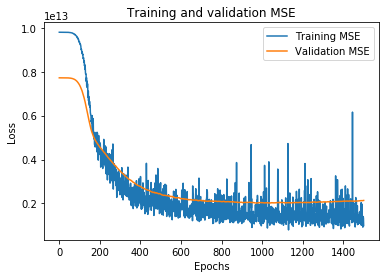

In [0]:
acc2 = history2.history['mean_absolute_error']
val_acc2 = history2.history['val_mean_absolute_error']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es por "blue dot"
plt.plot(epochs, loss2, label='Training MSE')
# b es por "solid blue line"
plt.plot(epochs, val_loss2, label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

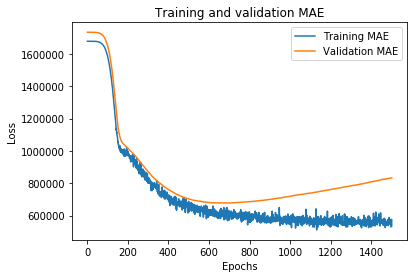

In [0]:
plt.plot(epochs, acc2, label='Training MAE')
# b es por "solid blue line"
plt.plot(epochs, val_acc2, label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
# Primero, definimos una función que permita construir el modelo, donde todos los valores de los hiperparámetros se obtienen del diccionario params 

model3 = Sequential()

model3.add(Dense(512, input_dim=X_train.shape[1]))
model3.add(Activation('relu'))

model3.add(Dense(256))
model3.add(Activation('relu'))

model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dropout(0.1))

model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))

model3.add(Dense(32))
model3.add(Activation('relu'))
model3.add(Dropout(0.6))

model3.add(Dense(1))

model3.compile(optimizer=RMSprop(lr=1e-6), loss='mse', metrics=['mae',r2_for_keras])

In [0]:
history3 = model3.fit(X_train, y_train, batch_size=8, epochs=5000, validation_split = 0.3, 
                    verbose=1)

Train on 1428 samples, validate on 612 samples
Epoch 1/5000
1428/1428 [==============================] - 1s 948us/step - loss: 9799344913330.5547 - mean_absolute_error: 1678561.9902 - r2_for_keras: -3.1346 - val_loss: 7722876150991.4775 - val_mean_absolute_error: 1734311.9653 - val_r2_for_keras: -4.0350
Epoch 2/5000
1428/1428 [==============================] - 1s 591us/step - loss: 9799344896625.3008 - mean_absolute_error: 1678561.9653 - r2_for_keras: -3.2874 - val_loss: 7722876085027.1377 - val_mean_absolute_error: 1734311.9261 - val_r2_for_keras: -4.0350
Epoch 3/5000
1428/1428 [==============================] - 1s 581us/step - loss: 9799344958673.3906 - mean_absolute_error: 1678561.9436 - r2_for_keras: -3.2584 - val_loss: 7722876009639.3203 - val_mean_absolute_error: 1734311.8934 - val_r2_for_keras: -4.0350
Epoch 4/5000
1428/1428 [==============================] - 1s 587us/step - loss: 9799344598133.6016 - mean_absolute_error: 1678561.9093 - r2_for_keras: -3.1360 - val_loss: 77228759

1428/1428 [==============================] - 1s 585us/step - loss: 9799339715793.3906 - mean_absolute_error: 1678560.4562 - r2_for_keras: -3.5000 - val_loss: 7722870258748.2354 - val_mean_absolute_error: 1734310.3350 - val_r2_for_keras: -4.0350
Epoch 33/5000
1428/1428 [==============================] - 1s 585us/step - loss: 9799339859715.5859 - mean_absolute_error: 1678560.3540 - r2_for_keras: -2.9947 - val_loss: 7722870038581.5430 - val_mean_absolute_error: 1734310.2557 - val_r2_for_keras: -4.0350
Epoch 34/5000
1428/1428 [==============================] - 1s 584us/step - loss: 9799338649594.2637 - mean_absolute_error: 1678560.2216 - r2_for_keras: -3.3355 - val_loss: 7722869717326.6406 - val_mean_absolute_error: 1734310.1385 - val_r2_for_keras: -4.0350
Epoch 35/5000
1428/1428 [==============================] - 1s 588us/step - loss: 9799337968533.8711 - mean_absolute_error: 1678560.1443 - r2_for_keras: -2.8456 - val_loss: 7722869404210.1963 - val_mean_absolute_error: 1734310.0490 - val_

Epoch 64/5000
1428/1428 [==============================] - 1s 582us/step - loss: 9799315620207.1484 - mean_absolute_error: 1678553.9814 - r2_for_keras: -3.0516 - val_loss: 7722845562384.7324 - val_mean_absolute_error: 1734303.4877 - val_r2_for_keras: -4.0349
Epoch 65/5000
1428/1428 [==============================] - 1s 580us/step - loss: 9799310924745.5020 - mean_absolute_error: 1678553.2910 - r2_for_keras: -3.4903 - val_loss: 7722844183130.3525 - val_mean_absolute_error: 1734303.0572 - val_r2_for_keras: -4.0349
Epoch 66/5000
1428/1428 [==============================] - 1s 583us/step - loss: 9799312187369.0527 - mean_absolute_error: 1678553.3044 - r2_for_keras: -3.2601 - val_loss: 7722842684797.4902 - val_mean_absolute_error: 1734302.6360 - val_r2_for_keras: -4.0349
Epoch 67/5000
1428/1428 [==============================] - 1s 579us/step - loss: 9799311152561.1191 - mean_absolute_error: 1678552.6821 - r2_for_keras: -3.1170 - val_loss: 7722840913183.7910 - val_mean_absolute_error: 17343

Epoch 96/5000
1428/1428 [==============================] - 1s 632us/step - loss: 9799216399804.5938 - mean_absolute_error: 1678527.2808 - r2_for_keras: -3.2480 - val_loss: 7722747972855.6338 - val_mean_absolute_error: 1734276.4293 - val_r2_for_keras: -4.0348
Epoch 97/5000
1428/1428 [==============================] - 1s 665us/step - loss: 9799213864369.1191 - mean_absolute_error: 1678525.5658 - r2_for_keras: -3.2609 - val_loss: 7722742437847.8428 - val_mean_absolute_error: 1734274.8873 - val_r2_for_keras: -4.0347
Epoch 98/5000
1428/1428 [==============================] - 1s 637us/step - loss: 9799204146591.9102 - mean_absolute_error: 1678524.1369 - r2_for_keras: -3.2185 - val_loss: 7722736605572.1826 - val_mean_absolute_error: 1734273.3325 - val_r2_for_keras: -4.0347
Epoch 99/5000
1428/1428 [==============================] - 1s 625us/step - loss: 9799193421083.9668 - mean_absolute_error: 1678521.5893 - r2_for_keras: -3.4344 - val_loss: 7722730933067.2939 - val_mean_absolute_error: 17342

1428/1428 [==============================] - 1s 592us/step - loss: 9798884848958.3867 - mean_absolute_error: 1678440.7216 - r2_for_keras: -3.3613 - val_loss: 7722432077342.1172 - val_mean_absolute_error: 1734189.4216 - val_r2_for_keras: -4.0342
Epoch 128/5000
1428/1428 [==============================] - 1s 586us/step - loss: 9798870149068.3691 - mean_absolute_error: 1678435.1159 - r2_for_keras: -3.2650 - val_loss: 7722415090667.9219 - val_mean_absolute_error: 1734184.7467 - val_r2_for_keras: -4.0342
Epoch 129/5000
1428/1428 [==============================] - 1s 583us/step - loss: 9798905304084.0781 - mean_absolute_error: 1678432.2651 - r2_for_keras: -3.0284 - val_loss: 7722396139627.0850 - val_mean_absolute_error: 1734179.5756 - val_r2_for_keras: -4.0342
Epoch 130/5000
1428/1428 [==============================] - 1s 582us/step - loss: 9798807257271.5742 - mean_absolute_error: 1678425.0935 - r2_for_keras: -3.1256 - val_loss: 7722378661647.0586 - val_mean_absolute_error: 1734174.7533 - v

1428/1428 [==============================] - 1s 585us/step - loss: 9797885222659.5859 - mean_absolute_error: 1678194.3922 - r2_for_keras: -3.9184 - val_loss: 7721550803613.2812 - val_mean_absolute_error: 1733947.7426 - val_r2_for_keras: -4.0328
Epoch 159/5000
1428/1428 [==============================] - 1s 627us/step - loss: 9797889870116.5703 - mean_absolute_error: 1678186.1327 - r2_for_keras: -3.9215 - val_loss: 7721507209751.4248 - val_mean_absolute_error: 1733935.8358 - val_r2_for_keras: -4.0327
Epoch 160/5000
1428/1428 [==============================] - 1s 644us/step - loss: 9797893961527.2148 - mean_absolute_error: 1678178.3431 - r2_for_keras: -3.5964 - val_loss: 7721462492354.0918 - val_mean_absolute_error: 1733923.5989 - val_r2_for_keras: -4.0326
Epoch 161/5000
1428/1428 [==============================] - 1s 594us/step - loss: 9797866445585.9277 - mean_absolute_error: 1678161.5767 - r2_for_keras: -3.6325 - val_loss: 7721415005311.1631 - val_mean_absolute_error: 1733910.6511 - v

1428/1428 [==============================] - 1s 713us/step - loss: 9795875266215.7988 - mean_absolute_error: 1677597.8890 - r2_for_keras: -3.3319 - val_loss: 7719429964846.8496 - val_mean_absolute_error: 1733368.9498 - val_r2_for_keras: -4.0292
Epoch 190/5000
1428/1428 [==============================] - 1s 679us/step - loss: 9795431648442.4434 - mean_absolute_error: 1677537.1064 - r2_for_keras: -3.3815 - val_loss: 7719325116670.3271 - val_mean_absolute_error: 1733340.3962 - val_r2_for_keras: -4.0290
Epoch 191/5000
1428/1428 [==============================] - 1s 632us/step - loss: 9795382205660.8633 - mean_absolute_error: 1677519.8965 - r2_for_keras: -3.1790 - val_loss: 7719220653143.0068 - val_mean_absolute_error: 1733311.9710 - val_r2_for_keras: -4.0288
Epoch 192/5000
1428/1428 [==============================] - 1s 704us/step - loss: 9795289263496.9629 - mean_absolute_error: 1677496.8151 - r2_for_keras: -3.5992 - val_loss: 7719117088272.7324 - val_mean_absolute_error: 1733283.7328 - v

1428/1428 [==============================] - 1s 589us/step - loss: 9790957250921.4121 - mean_absolute_error: 1676313.0987 - r2_for_keras: -3.8472 - val_loss: 7714805873188.8105 - val_mean_absolute_error: 1732112.7230 - val_r2_for_keras: -4.0214
Epoch 221/5000
1428/1428 [==============================] - 1s 607us/step - loss: 9790086827836.9531 - mean_absolute_error: 1676195.0060 - r2_for_keras: -3.2005 - val_loss: 7714598679197.2812 - val_mean_absolute_error: 1732056.5090 - val_r2_for_keras: -4.0211
Epoch 222/5000
1428/1428 [==============================] - 1s 588us/step - loss: 9789728115347.7188 - mean_absolute_error: 1676142.2314 - r2_for_keras: -3.4678 - val_loss: 7714389670758.0654 - val_mean_absolute_error: 1731999.7324 - val_r2_for_keras: -4.0207
Epoch 223/5000
1428/1428 [==============================] - 1s 589us/step - loss: 9789142493361.8379 - mean_absolute_error: 1676065.6535 - r2_for_keras: -3.3570 - val_loss: 7714175810084.8105 - val_mean_absolute_error: 1731941.8284 - v

1428/1428 [==============================] - 1s 582us/step - loss: 9778360269425.3008 - mean_absolute_error: 1673545.4967 - r2_for_keras: -3.3922 - val_loss: 7705804126649.7256 - val_mean_absolute_error: 1729675.3309 - val_r2_for_keras: -4.0062
Epoch 252/5000
1428/1428 [==============================] - 1s 583us/step - loss: 9778951730907.4297 - mean_absolute_error: 1673524.2342 - r2_for_keras: -3.8806 - val_loss: 7705396400208.3135 - val_mean_absolute_error: 1729565.1181 - val_r2_for_keras: -4.0055
Epoch 253/5000
1428/1428 [==============================] - 1s 590us/step - loss: 9777452461081.8164 - mean_absolute_error: 1673311.4133 - r2_for_keras: -3.0669 - val_loss: 7705005448412.8623 - val_mean_absolute_error: 1729459.3738 - val_r2_for_keras: -4.0048
Epoch 254/5000
1428/1428 [==============================] - 1s 582us/step - loss: 9779404902250.8457 - mean_absolute_error: 1673296.9632 - r2_for_keras: -3.8609 - val_loss: 7704565372031.1631 - val_mean_absolute_error: 1729340.7247 - v

1428/1428 [==============================] - 1s 590us/step - loss: 9760933700341.2422 - mean_absolute_error: 1668716.9265 - r2_for_keras: -3.4844 - val_loss: 7689209786073.5166 - val_mean_absolute_error: 1725194.3685 - val_r2_for_keras: -3.9781
Epoch 283/5000
1428/1428 [==============================] - 1s 592us/step - loss: 9757678676283.5176 - mean_absolute_error: 1668500.6506 - r2_for_keras: -3.1235 - val_loss: 7688505062045.2812 - val_mean_absolute_error: 1725003.7847 - val_r2_for_keras: -3.9769
Epoch 284/5000
1428/1428 [==============================] - 1s 597us/step - loss: 9756737685429.4238 - mean_absolute_error: 1668185.9989 - r2_for_keras: -3.1917 - val_loss: 7687780040275.6602 - val_mean_absolute_error: 1724807.7712 - val_r2_for_keras: -3.9757
Epoch 285/5000
1428/1428 [==============================] - 1s 591us/step - loss: 9752216551010.9590 - mean_absolute_error: 1667828.1856 - r2_for_keras: -3.0833 - val_loss: 7687040241637.2285 - val_mean_absolute_error: 1724608.2541 - v

1428/1428 [==============================] - 1s 585us/step - loss: 9726393558804.7969 - mean_absolute_error: 1660244.1740 - r2_for_keras: -3.2715 - val_loss: 7659895852815.0586 - val_mean_absolute_error: 1717280.7839 - val_r2_for_keras: -3.9285
Epoch 314/5000
1428/1428 [==============================] - 1s 583us/step - loss: 9717406816215.8438 - mean_absolute_error: 1659689.7199 - r2_for_keras: -3.0685 - val_loss: 7658729303448.2617 - val_mean_absolute_error: 1716965.6156 - val_r2_for_keras: -3.9265
Epoch 315/5000
1428/1428 [==============================] - 1s 585us/step - loss: 9714904096423.7988 - mean_absolute_error: 1659104.6173 - r2_for_keras: -3.3360 - val_loss: 7657571953965.1768 - val_mean_absolute_error: 1716652.6136 - val_r2_for_keras: -3.9245
Epoch 316/5000
1428/1428 [==============================] - 1s 595us/step - loss: 9717840355763.9883 - mean_absolute_error: 1658787.6665 - r2_for_keras: -2.9172 - val_loss: 7656294145887.3721 - val_mean_absolute_error: 1716307.4571 - v

1428/1428 [==============================] - 1s 613us/step - loss: 9661196540735.8203 - mean_absolute_error: 1645104.0707 - r2_for_keras: -3.2535 - val_loss: 7612018647950.2227 - val_mean_absolute_error: 1704320.2614 - val_r2_for_keras: -3.8474
Epoch 345/5000
1428/1428 [==============================] - 1s 584us/step - loss: 9661453251856.4922 - mean_absolute_error: 1644688.5539 - r2_for_keras: -3.3138 - val_loss: 7609975250462.1172 - val_mean_absolute_error: 1703766.7194 - val_r2_for_keras: -3.8439
Epoch 346/5000
1428/1428 [==============================] - 1s 640us/step - loss: 9647457639415.3945 - mean_absolute_error: 1643932.0235 - r2_for_keras: -2.8050 - val_loss: 7607936968208.7324 - val_mean_absolute_error: 1703214.3105 - val_r2_for_keras: -3.8405
Epoch 347/5000
1428/1428 [==============================] - 1s 581us/step - loss: 9653562646780.4141 - mean_absolute_error: 1643908.8997 - r2_for_keras: -2.7712 - val_loss: 7605938486439.3203 - val_mean_absolute_error: 1702671.5482 - v

1428/1428 [==============================] - 1s 729us/step - loss: 9572573446694.7227 - mean_absolute_error: 1622746.1192 - r2_for_keras: -3.3016 - val_loss: 7534062491822.0127 - val_mean_absolute_error: 1683087.5229 - val_r2_for_keras: -3.7158
Epoch 376/5000
1428/1428 [==============================] - 1s 645us/step - loss: 9569872075537.9277 - mean_absolute_error: 1622023.3085 - r2_for_keras: -3.2650 - val_loss: 7530829198730.8760 - val_mean_absolute_error: 1682202.4865 - val_r2_for_keras: -3.7104
Epoch 377/5000
1428/1428 [==============================] - 1s 684us/step - loss: 9560069232599.8438 - mean_absolute_error: 1619929.1145 - r2_for_keras: -2.9946 - val_loss: 7527645116750.6406 - val_mean_absolute_error: 1681330.1087 - val_r2_for_keras: -3.7050
Epoch 378/5000
1428/1428 [==============================] - 1s 604us/step - loss: 9558893662884.9297 - mean_absolute_error: 1619068.0217 - r2_for_keras: -2.9834 - val_loss: 7524244570647.4248 - val_mean_absolute_error: 1680399.8039 - v

1428/1428 [==============================] - 1s 579us/step - loss: 9403843530924.0996 - mean_absolute_error: 1585960.5655 - r2_for_keras: -2.8190 - val_loss: 7416659815939.3467 - val_mean_absolute_error: 1650666.3072 - val_r2_for_keras: -3.5188
Epoch 407/5000
1428/1428 [==============================] - 1s 581us/step - loss: 9371718183548.7734 - mean_absolute_error: 1583172.9482 - r2_for_keras: -2.8262 - val_loss: 7412142995148.1309 - val_mean_absolute_error: 1649404.7149 - val_r2_for_keras: -3.5112
Epoch 408/5000
1428/1428 [==============================] - 1s 578us/step - loss: 9397627889428.7969 - mean_absolute_error: 1581678.9982 - r2_for_keras: -3.1171 - val_loss: 7407257219098.7715 - val_mean_absolute_error: 1648043.2761 - val_r2_for_keras: -3.5031
Epoch 409/5000
1428/1428 [==============================] - 1s 583us/step - loss: 9413126455296.0000 - mean_absolute_error: 1580766.0079 - r2_for_keras: -2.6673 - val_loss: 7402218479027.0322 - val_mean_absolute_error: 1646637.1667 - v

1428/1428 [==============================] - 1s 625us/step - loss: 9238610584905.8594 - mean_absolute_error: 1533064.1141 - r2_for_keras: -2.5753 - val_loss: 7246427623183.0586 - val_mean_absolute_error: 1602547.1773 - val_r2_for_keras: -3.2362
Epoch 438/5000
1428/1428 [==============================] - 1s 664us/step - loss: 9151859875862.9473 - mean_absolute_error: 1528197.7994 - r2_for_keras: -2.5285 - val_loss: 7239927322583.8428 - val_mean_absolute_error: 1600686.1736 - val_r2_for_keras: -3.2255
Epoch 439/5000
1428/1428 [==============================] - 1s 634us/step - loss: 9137327033989.3789 - mean_absolute_error: 1526984.6576 - r2_for_keras: -2.5646 - val_loss: 7233357433675.2939 - val_mean_absolute_error: 1598804.4967 - val_r2_for_keras: -3.2147
Epoch 440/5000
1428/1428 [==============================] - 1s 612us/step - loss: 9189805440519.1699 - mean_absolute_error: 1525859.3967 - r2_for_keras: -2.7433 - val_loss: 7226601907621.6475 - val_mean_absolute_error: 1596866.5404 - v

1428/1428 [==============================] - 1s 586us/step - loss: 8883190968147.9004 - mean_absolute_error: 1459996.7581 - r2_for_keras: -2.1473 - val_loss: 7015059729280.8369 - val_mean_absolute_error: 1535074.3333 - val_r2_for_keras: -2.8594
Epoch 469/5000
1428/1428 [==============================] - 1s 586us/step - loss: 8929230672503.0371 - mean_absolute_error: 1453990.3915 - r2_for_keras: -2.0581 - val_loss: 7005589698680.4707 - val_mean_absolute_error: 1532274.6605 - val_r2_for_keras: -2.8442
Epoch 470/5000
1428/1428 [==============================] - 1s 584us/step - loss: 8759745087918.2529 - mean_absolute_error: 1447290.9783 - r2_for_keras: -2.2345 - val_loss: 6997655853979.6074 - val_mean_absolute_error: 1529918.3730 - val_r2_for_keras: -2.8315
Epoch 471/5000
1428/1428 [==============================] - 1s 588us/step - loss: 8796664946619.1602 - mean_absolute_error: 1449657.8213 - r2_for_keras: -2.3609 - val_loss: 6989153917102.0127 - val_mean_absolute_error: 1527392.0462 - v

1428/1428 [==============================] - 1s 681us/step - loss: 8492984058911.5518 - mean_absolute_error: 1358582.8367 - r2_for_keras: -1.7801 - val_loss: 6717168359062.5879 - val_mean_absolute_error: 1444106.4436 - val_r2_for_keras: -2.3903
Epoch 500/5000
1428/1428 [==============================] - 1s 628us/step - loss: 8439623588029.3115 - mean_absolute_error: 1359975.5058 - r2_for_keras: -2.2774 - val_loss: 6706944805600.2090 - val_mean_absolute_error: 1440928.6115 - val_r2_for_keras: -2.3745
Epoch 501/5000
1428/1428 [==============================] - 1s 646us/step - loss: 8359900859853.8047 - mean_absolute_error: 1349019.2609 - r2_for_keras: -1.8543 - val_loss: 6696197828741.8564 - val_mean_absolute_error: 1437585.4667 - val_r2_for_keras: -2.3580
Epoch 502/5000
1428/1428 [==============================] - 1s 580us/step - loss: 8454008820251.2490 - mean_absolute_error: 1347134.2348 - r2_for_keras: -1.9199 - val_loss: 6685374474601.4121 - val_mean_absolute_error: 1434210.3019 - v

1428/1428 [==============================] - 1s 588us/step - loss: 8064551399802.6211 - mean_absolute_error: 1246728.8228 - r2_for_keras: -1.3963 - val_loss: 6358701570168.4707 - val_mean_absolute_error: 1330946.7941 - val_r2_for_keras: -1.8579
Epoch 531/5000
1428/1428 [==============================] - 1s 586us/step - loss: 7957378889802.5771 - mean_absolute_error: 1236897.4543 - r2_for_keras: -1.4902 - val_loss: 6347242849005.5947 - val_mean_absolute_error: 1327260.7657 - val_r2_for_keras: -1.8415
Epoch 532/5000
1428/1428 [==============================] - 1s 583us/step - loss: 7828990607681.2559 - mean_absolute_error: 1232576.7633 - r2_for_keras: -1.3057 - val_loss: 6335422349847.4248 - val_mean_absolute_error: 1323455.8527 - val_r2_for_keras: -1.8247
Epoch 533/5000
1428/1428 [==============================] - 1s 604us/step - loss: 7905470592593.7471 - mean_absolute_error: 1233402.4655 - r2_for_keras: -1.2889 - val_loss: 6323215205851.1895 - val_mean_absolute_error: 1319526.9947 - v

1428/1428 [==============================] - 1s 654us/step - loss: 7377927439575.1260 - mean_absolute_error: 1144789.6514 - r2_for_keras: -1.0245 - val_loss: 5980055338097.7773 - val_mean_absolute_error: 1212270.0312 - val_r2_for_keras: -1.3517
Epoch 562/5000
1428/1428 [==============================] - 1s 648us/step - loss: 7551985432650.5771 - mean_absolute_error: 1148710.6269 - r2_for_keras: -0.8560 - val_loss: 5967186311609.7256 - val_mean_absolute_error: 1208302.7983 - val_r2_for_keras: -1.3360
Epoch 563/5000
1428/1428 [==============================] - 1s 616us/step - loss: 7369248219801.4570 - mean_absolute_error: 1141933.7452 - r2_for_keras: -0.9878 - val_loss: 5956102697200.9414 - val_mean_absolute_error: 1204863.4422 - val_r2_for_keras: -1.3224
Epoch 564/5000
1428/1428 [==============================] - 1s 571us/step - loss: 7354689017448.6943 - mean_absolute_error: 1130392.1284 - r2_for_keras: -0.8856 - val_loss: 5944003190302.1172 - val_mean_absolute_error: 1201157.1757 - v

1428/1428 [==============================] - 1s 581us/step - loss: 6830210379259.6973 - mean_absolute_error: 1079006.0692 - r2_for_keras: -0.9269 - val_loss: 5644371960209.5684 - val_mean_absolute_error: 1118942.4613 - val_r2_for_keras: -0.9806
Epoch 593/5000
1428/1428 [==============================] - 1s 578us/step - loss: 6898775896672.0898 - mean_absolute_error: 1078072.1626 - r2_for_keras: -0.7524 - val_loss: 5633223045387.7129 - val_mean_absolute_error: 1116349.8402 - val_r2_for_keras: -0.9701
Epoch 594/5000
1428/1428 [==============================] - 1s 575us/step - loss: 7047144948308.6162 - mean_absolute_error: 1085453.6887 - r2_for_keras: -0.8482 - val_loss: 5623135187405.8037 - val_mean_absolute_error: 1114074.2145 - val_r2_for_keras: -0.9608
Epoch 595/5000
1428/1428 [==============================] - 1s 574us/step - loss: 7243980934468.1230 - mean_absolute_error: 1099740.6296 - r2_for_keras: -1.3114 - val_loss: 5613063137333.5430 - val_mean_absolute_error: 1111824.3585 - v

1428/1428 [==============================] - 1s 577us/step - loss: 6270073517099.0254 - mean_absolute_error: 1046790.0958 - r2_for_keras: -0.8101 - val_loss: 5385625383380.4971 - val_mean_absolute_error: 1067493.2778 - val_r2_for_keras: -0.7800
Epoch 624/5000
1428/1428 [==============================] - 1s 571us/step - loss: 6468006686226.6436 - mean_absolute_error: 1032643.3100 - r2_for_keras: -0.8612 - val_loss: 5378311465388.3398 - val_mean_absolute_error: 1066254.9146 - val_r2_for_keras: -0.7759
Epoch 625/5000
1428/1428 [==============================] - 1s 576us/step - loss: 6301179895830.9473 - mean_absolute_error: 1055523.9953 - r2_for_keras: -0.8341 - val_loss: 5371935513419.2939 - val_mean_absolute_error: 1065188.0389 - val_r2_for_keras: -0.7724
Epoch 626/5000
1428/1428 [==============================] - 1s 577us/step - loss: 6285077493008.4932 - mean_absolute_error: 1047571.5016 - r2_for_keras: -0.8222 - val_loss: 5364630406779.8174 - val_mean_absolute_error: 1063988.8507 - v

1428/1428 [==============================] - 1s 617us/step - loss: 6211336588176.1348 - mean_absolute_error: 1067434.1389 - r2_for_keras: -1.1721 - val_loss: 5209468059059.0322 - val_mean_absolute_error: 1041755.8075 - val_r2_for_keras: -0.7101
Epoch 655/5000
1428/1428 [==============================] - 1s 659us/step - loss: 6287342510148.8398 - mean_absolute_error: 1058213.5805 - r2_for_keras: -1.2655 - val_loss: 5204998137387.5029 - val_mean_absolute_error: 1041229.2481 - val_r2_for_keras: -0.7092
Epoch 656/5000
1428/1428 [==============================] - 1s 632us/step - loss: 6108872870868.9746 - mean_absolute_error: 1061576.1977 - r2_for_keras: -0.9719 - val_loss: 5201161117535.3721 - val_mean_absolute_error: 1040790.4475 - val_r2_for_keras: -0.7084
Epoch 657/5000
1428/1428 [==============================] - 1s 580us/step - loss: 6592760846204.0557 - mean_absolute_error: 1065607.4814 - r2_for_keras: -1.4130 - val_loss: 5196820714060.9678 - val_mean_absolute_error: 1040289.2642 - v

1428/1428 [==============================] - 1s 590us/step - loss: 6263371882151.7979 - mean_absolute_error: 1038209.3187 - r2_for_keras: -1.0870 - val_loss: 5084329682448.7324 - val_mean_absolute_error: 1030078.0739 - val_r2_for_keras: -0.6997
Epoch 686/5000
1428/1428 [==============================] - 1s 585us/step - loss: 5623468625266.0166 - mean_absolute_error: 1041909.5765 - r2_for_keras: -0.8219 - val_loss: 5080849910710.3789 - val_mean_absolute_error: 1029855.6667 - val_r2_for_keras: -0.7000
Epoch 687/5000
1428/1428 [==============================] - 1s 587us/step - loss: 6363387910929.9277 - mean_absolute_error: 1067735.8435 - r2_for_keras: -1.0373 - val_loss: 5077080528213.3330 - val_mean_absolute_error: 1029571.5012 - val_r2_for_keras: -0.7001
Epoch 688/5000
1428/1428 [==============================] - 1s 591us/step - loss: 5689584491970.3301 - mean_absolute_error: 1073515.3725 - r2_for_keras: -1.3913 - val_loss: 5074662151616.4180 - val_mean_absolute_error: 1029370.5345 - v

1428/1428 [==============================] - 1s 587us/step - loss: 6114300883597.9834 - mean_absolute_error: 1036701.3668 - r2_for_keras: -0.8637 - val_loss: 4995763202034.6143 - val_mean_absolute_error: 1023269.0705 - val_r2_for_keras: -0.7005
Epoch 717/5000
1428/1428 [==============================] - 1s 648us/step - loss: 6104104978082.0615 - mean_absolute_error: 1081983.1171 - r2_for_keras: -1.2550 - val_loss: 4993133587543.0068 - val_mean_absolute_error: 1023036.0194 - val_r2_for_keras: -0.7004
Epoch 718/5000
1428/1428 [==============================] - 1s 599us/step - loss: 5637612501938.5547 - mean_absolute_error: 1032479.4038 - r2_for_keras: -1.1579 - val_loss: 4990238092803.3467 - val_mean_absolute_error: 1022837.1765 - val_r2_for_keras: -0.7008
Epoch 719/5000
1428/1428 [==============================] - 1s 641us/step - loss: 6050832848534.5879 - mean_absolute_error: 1062278.5303 - r2_for_keras: -1.1980 - val_loss: 4987464964484.1826 - val_mean_absolute_error: 1022631.7539 - v

1428/1428 [==============================] - 1s 587us/step - loss: 5787437316583.6191 - mean_absolute_error: 1070419.5581 - r2_for_keras: -1.1607 - val_loss: 4916223850509.3857 - val_mean_absolute_error: 1016545.5882 - val_r2_for_keras: -0.7033
Epoch 748/5000
1428/1428 [==============================] - 1s 602us/step - loss: 5316914743267.3164 - mean_absolute_error: 1057620.8314 - r2_for_keras: -1.3806 - val_loss: 4913946018327.4248 - val_mean_absolute_error: 1016345.2077 - val_r2_for_keras: -0.7033
Epoch 749/5000
1428/1428 [==============================] - 1s 595us/step - loss: 5569373555439.5068 - mean_absolute_error: 1030476.4907 - r2_for_keras: -1.2406 - val_loss: 4911358841233.5684 - val_mean_absolute_error: 1016152.9197 - val_r2_for_keras: -0.7037
Epoch 750/5000
1428/1428 [==============================] - 1s 586us/step - loss: 5584006892087.9326 - mean_absolute_error: 1048462.8689 - r2_for_keras: -1.4321 - val_loss: 4909082854125.5947 - val_mean_absolute_error: 1015943.7996 - v

1428/1428 [==============================] - 1s 586us/step - loss: 5500360958112.6279 - mean_absolute_error: 1046860.7584 - r2_for_keras: -1.4151 - val_loss: 4844302054473.6211 - val_mean_absolute_error: 1009520.6101 - val_r2_for_keras: -0.7011
Epoch 779/5000
1428/1428 [==============================] - 1s 621us/step - loss: 5798368804083.8096 - mean_absolute_error: 1036918.4052 - r2_for_keras: -1.0337 - val_loss: 4842579342837.9609 - val_mean_absolute_error: 1009299.7749 - val_r2_for_keras: -0.7005
Epoch 780/5000
1428/1428 [==============================] - 1s 624us/step - loss: 5677430996992.0000 - mean_absolute_error: 1025127.7972 - r2_for_keras: -1.4425 - val_loss: 4840131561886.9541 - val_mean_absolute_error: 1009096.3248 - val_r2_for_keras: -0.7008
Epoch 781/5000
1428/1428 [==============================] - 1s 621us/step - loss: 5983701118482.6445 - mean_absolute_error: 1049326.3985 - r2_for_keras: -2.1017 - val_loss: 4837733049765.6475 - val_mean_absolute_error: 1008822.0723 - v

1428/1428 [==============================] - 1s 572us/step - loss: 5539973933004.3691 - mean_absolute_error: 1043893.3948 - r2_for_keras: -0.8187 - val_loss: 4777359560141.8037 - val_mean_absolute_error: 1002165.8877 - val_r2_for_keras: -0.6944
Epoch 810/5000
1428/1428 [==============================] - 1s 577us/step - loss: 5339233360933.2881 - mean_absolute_error: 1041903.0315 - r2_for_keras: -1.5644 - val_loss: 4775646768536.2617 - val_mean_absolute_error: 1001913.4285 - val_r2_for_keras: -0.6935
Epoch 811/5000
1428/1428 [==============================] - 1s 572us/step - loss: 5438355970948.6611 - mean_absolute_error: 1022687.4599 - r2_for_keras: -1.2102 - val_loss: 4773444801234.8232 - val_mean_absolute_error: 1001666.0866 - val_r2_for_keras: -0.6932
Epoch 812/5000
1428/1428 [==============================] - 1s 574us/step - loss: 5487428445330.2852 - mean_absolute_error: 1044545.8397 - r2_for_keras: -1.2061 - val_loss: 4771211752735.7910 - val_mean_absolute_error: 1001405.7281 - v

Epoch 841/5000
1428/1428 [==============================] - 1s 583us/step - loss: 4763374491929.0977 - mean_absolute_error: 1005106.0315 - r2_for_keras: -1.0010 - val_loss: 4707932285824.8369 - val_mean_absolute_error: 994155.1820 - val_r2_for_keras: -0.6840
Epoch 842/5000
1428/1428 [==============================] - 1s 655us/step - loss: 5329628747965.3105 - mean_absolute_error: 1024365.5690 - r2_for_keras: -1.3895 - val_loss: 4705697667888.5225 - val_mean_absolute_error: 993969.3922 - val_r2_for_keras: -0.6844
Epoch 843/5000
1428/1428 [==============================] - 1s 585us/step - loss: 5866666522377.3223 - mean_absolute_error: 1048792.0564 - r2_for_keras: -1.5025 - val_loss: 4703734430994.4053 - val_mean_absolute_error: 993672.7661 - val_r2_for_keras: -0.6834
Epoch 844/5000
1428/1428 [==============================] - 1s 578us/step - loss: 5391072461350.7227 - mean_absolute_error: 1034359.4575 - r2_for_keras: -1.2355 - val_loss: 4701636659400.7842 - val_mean_absolute_error: 9934

Epoch 873/5000
1428/1428 [==============================] - 1s 580us/step - loss: 5127371031675.3389 - mean_absolute_error: 1013024.0457 - r2_for_keras: -1.0236 - val_loss: 4641372783448.6797 - val_mean_absolute_error: 986630.0292 - val_r2_for_keras: -0.6691
Epoch 874/5000
1428/1428 [==============================] - 1s 687us/step - loss: 5508337362479.3271 - mean_absolute_error: 1036441.1740 - r2_for_keras: -1.7132 - val_loss: 4639697059197.4902 - val_mean_absolute_error: 986296.0752 - val_r2_for_keras: -0.6674
Epoch 875/5000
1428/1428 [==============================] - 1s 580us/step - loss: 5487262901027.1377 - mean_absolute_error: 1039794.1338 - r2_for_keras: -1.7455 - val_loss: 4638542953103.8955 - val_mean_absolute_error: 986004.5315 - val_r2_for_keras: -0.6658
Epoch 876/5000
1428/1428 [==============================] - 1s 647us/step - loss: 5465075339757.3555 - mean_absolute_error: 1032996.6059 - r2_for_keras: -1.4828 - val_loss: 4636033347182.4316 - val_mean_absolute_error: 9857

Epoch 905/5000
1428/1428 [==============================] - 1s 574us/step - loss: 5423248480215.8428 - mean_absolute_error: 1021867.4659 - r2_for_keras: -1.7547 - val_loss: 4578534802693.0195 - val_mean_absolute_error: 978785.9504 - val_r2_for_keras: -0.6468
Epoch 906/5000
1428/1428 [==============================] - 1s 574us/step - loss: 4942721340344.2910 - mean_absolute_error: 1039878.3270 - r2_for_keras: -1.4591 - val_loss: 4577110690421.1240 - val_mean_absolute_error: 978526.8707 - val_r2_for_keras: -0.6455
Epoch 907/5000
1428/1428 [==============================] - 1s 577us/step - loss: 4718662512146.6445 - mean_absolute_error: 1009795.0772 - r2_for_keras: -1.0909 - val_loss: 4575442075969.2549 - val_mean_absolute_error: 978281.9585 - val_r2_for_keras: -0.6447
Epoch 908/5000
1428/1428 [==============================] - 1s 573us/step - loss: 4499450705627.4287 - mean_absolute_error: 1009043.6698 - r2_for_keras: -2.2572 - val_loss: 4573894362694.2744 - val_mean_absolute_error: 9780

Epoch 937/5000
1428/1428 [==============================] - 1s 608us/step - loss: 5707475680224.4482 - mean_absolute_error: 1033075.5860 - r2_for_keras: -1.6127 - val_loss: 4514864194553.3076 - val_mean_absolute_error: 970777.4592 - val_r2_for_keras: -0.6247
Epoch 938/5000
1428/1428 [==============================] - 1s 609us/step - loss: 5207115475397.1992 - mean_absolute_error: 986901.7134 - r2_for_keras: -1.0725 - val_loss: 4512796083889.3594 - val_mean_absolute_error: 970559.0925 - val_r2_for_keras: -0.6244
Epoch 939/5000
1428/1428 [==============================] - 1s 610us/step - loss: 4647885505338.0840 - mean_absolute_error: 1021091.3178 - r2_for_keras: -1.0625 - val_loss: 4511308164825.5166 - val_mean_absolute_error: 970219.8004 - val_r2_for_keras: -0.6226
Epoch 940/5000
1428/1428 [==============================] - 1s 641us/step - loss: 5715223842391.4844 - mean_absolute_error: 1034104.0903 - r2_for_keras: -1.4705 - val_loss: 4509495426215.3203 - val_mean_absolute_error: 96988

Epoch 969/5000
1428/1428 [==============================] - 1s 601us/step - loss: 4451216733089.3447 - mean_absolute_error: 962079.2719 - r2_for_keras: -0.9859 - val_loss: 4450240784424.1572 - val_mean_absolute_error: 962883.2555 - val_r2_for_keras: -0.6043
Epoch 970/5000
1428/1428 [==============================] - 1s 606us/step - loss: 5259021944711.5293 - mean_absolute_error: 1019407.3384 - r2_for_keras: -1.7579 - val_loss: 4448831526657.6729 - val_mean_absolute_error: 962585.6879 - val_r2_for_keras: -0.6028
Epoch 971/5000
1428/1428 [==============================] - 1s 602us/step - loss: 4403440814785.6133 - mean_absolute_error: 974945.5278 - r2_for_keras: -1.3777 - val_loss: 4446769958028.5488 - val_mean_absolute_error: 962362.8934 - val_r2_for_keras: -0.6024
Epoch 972/5000
1428/1428 [==============================] - 1s 606us/step - loss: 4461833269121.7930 - mean_absolute_error: 982902.0149 - r2_for_keras: -1.1539 - val_loss: 4444497991104.4180 - val_mean_absolute_error: 962137.

Epoch 1001/5000
1428/1428 [==============================] - 1s 605us/step - loss: 5040941033925.1992 - mean_absolute_error: 1000928.7659 - r2_for_keras: -0.8651 - val_loss: 4383579390808.6797 - val_mean_absolute_error: 954575.3893 - val_r2_for_keras: -0.5820
Epoch 1002/5000
1428/1428 [==============================] - 1s 625us/step - loss: 4625081810760.4258 - mean_absolute_error: 967732.3529 - r2_for_keras: -1.1505 - val_loss: 4381582449991.9478 - val_mean_absolute_error: 954358.2394 - val_r2_for_keras: -0.5816
Epoch 1003/5000
1428/1428 [==============================] - 1s 609us/step - loss: 4044148232501.7812 - mean_absolute_error: 957768.9558 - r2_for_keras: -1.0139 - val_loss: 4379741930221.5947 - val_mean_absolute_error: 954133.9087 - val_r2_for_keras: -0.5810
Epoch 1004/5000
1428/1428 [==============================] - 1s 609us/step - loss: 4859967755972.4814 - mean_absolute_error: 969515.3926 - r2_for_keras: -1.2379 - val_loss: 4377601355160.2612 - val_mean_absolute_error: 953

Epoch 1033/5000
1428/1428 [==============================] - 1s 609us/step - loss: 4888954966463.4619 - mean_absolute_error: 979776.0897 - r2_for_keras: -1.1850 - val_loss: 4315411290286.0132 - val_mean_absolute_error: 946250.6505 - val_r2_for_keras: -0.5614
Epoch 1034/5000
1428/1428 [==============================] - 1s 602us/step - loss: 4957658360903.7090 - mean_absolute_error: 942167.4484 - r2_for_keras: -1.2700 - val_loss: 4313554753924.1831 - val_mean_absolute_error: 946022.5525 - val_r2_for_keras: -0.5608
Epoch 1035/5000
1428/1428 [==============================] - 1s 618us/step - loss: 4059369923271.3501 - mean_absolute_error: 954212.0066 - r2_for_keras: -0.9258 - val_loss: 4311726075502.4312 - val_mean_absolute_error: 945802.9060 - val_r2_for_keras: -0.5602
Epoch 1036/5000
1428/1428 [==============================] - 1s 618us/step - loss: 3690739336062.9248 - mean_absolute_error: 956106.7714 - r2_for_keras: -1.5688 - val_loss: 4309850494400.4185 - val_mean_absolute_error: 9455

Epoch 1065/5000
1428/1428 [==============================] - 1s 606us/step - loss: 4879092621747.9893 - mean_absolute_error: 976601.1353 - r2_for_keras: -1.3510 - val_loss: 4251574374587.3989 - val_mean_absolute_error: 937766.0592 - val_r2_for_keras: -0.5366
Epoch 1066/5000
1428/1428 [==============================] - 1s 607us/step - loss: 4082447169610.5767 - mean_absolute_error: 948455.3598 - r2_for_keras: -1.7114 - val_loss: 4249532009184.2090 - val_mean_absolute_error: 937521.9150 - val_r2_for_keras: -0.5361
Epoch 1067/5000
1428/1428 [==============================] - 1s 630us/step - loss: 3947497410456.7397 - mean_absolute_error: 931186.1731 - r2_for_keras: -0.9787 - val_loss: 4247256736440.0522 - val_mean_absolute_error: 937272.6324 - val_r2_for_keras: -0.5358
Epoch 1068/5000
1428/1428 [==============================] - 1s 651us/step - loss: 4182219008544.9858 - mean_absolute_error: 963365.1265 - r2_for_keras: -1.7443 - val_loss: 4244967028856.4707 - val_mean_absolute_error: 9370

Epoch 1097/5000
1428/1428 [==============================] - 1s 599us/step - loss: 4231325581220.2129 - mean_absolute_error: 953725.5884 - r2_for_keras: -0.9890 - val_loss: 4184649267534.6406 - val_mean_absolute_error: 929239.4216 - val_r2_for_keras: -0.5134
Epoch 1098/5000
1428/1428 [==============================] - 1s 644us/step - loss: 4361652974543.2383 - mean_absolute_error: 960614.2300 - r2_for_keras: -1.0468 - val_loss: 4182702997718.1699 - val_mean_absolute_error: 928971.4931 - val_r2_for_keras: -0.5126
Epoch 1099/5000
1428/1428 [==============================] - 1s 704us/step - loss: 4961798513764.3926 - mean_absolute_error: 940498.1892 - r2_for_keras: -0.8724 - val_loss: 4180487894517.9609 - val_mean_absolute_error: 928753.9461 - val_r2_for_keras: -0.5124
Epoch 1100/5000
1428/1428 [==============================] - 1s 634us/step - loss: 4384605268971.9219 - mean_absolute_error: 958274.9573 - r2_for_keras: -0.9012 - val_loss: 4177635696479.3726 - val_mean_absolute_error: 9285

Epoch 1129/5000
1428/1428 [==============================] - 1s 576us/step - loss: 4640620389889.4346 - mean_absolute_error: 961771.2349 - r2_for_keras: -1.0743 - val_loss: 4116519508677.4380 - val_mean_absolute_error: 920762.6532 - val_r2_for_keras: -0.4921
Epoch 1130/5000
1428/1428 [==============================] - 1s 581us/step - loss: 4260221382621.5796 - mean_absolute_error: 949368.9636 - r2_for_keras: -0.9441 - val_loss: 4113949317829.4380 - val_mean_absolute_error: 920509.4820 - val_r2_for_keras: -0.4919
Epoch 1131/5000
1428/1428 [==============================] - 1s 576us/step - loss: 4888244135150.0723 - mean_absolute_error: 973842.7406 - r2_for_keras: -1.3524 - val_loss: 4112080679367.1113 - val_mean_absolute_error: 920207.0623 - val_r2_for_keras: -0.4907
Epoch 1132/5000
1428/1428 [==============================] - 1s 592us/step - loss: 4566167365098.4873 - mean_absolute_error: 950181.3077 - r2_for_keras: -1.1496 - val_loss: 4109852035486.9541 - val_mean_absolute_error: 9199

Epoch 1161/5000
1428/1428 [==============================] - 1s 616us/step - loss: 3756114588944.4932 - mean_absolute_error: 945793.0327 - r2_for_keras: -0.7976 - val_loss: 4050412728560.9414 - val_mean_absolute_error: 912102.5719 - val_r2_for_keras: -0.4681
Epoch 1162/5000
1428/1428 [==============================] - 1s 583us/step - loss: 3935714484705.8828 - mean_absolute_error: 947902.5446 - r2_for_keras: -1.1569 - val_loss: 4049092819599.8955 - val_mean_absolute_error: 911806.1765 - val_r2_for_keras: -0.4666
Epoch 1163/5000
1428/1428 [==============================] - 1s 584us/step - loss: 3654067102177.8828 - mean_absolute_error: 919563.4125 - r2_for_keras: -1.5314 - val_loss: 4046466362990.4312 - val_mean_absolute_error: 911605.7392 - val_r2_for_keras: -0.4669
Epoch 1164/5000
1428/1428 [==============================] - 1s 581us/step - loss: 3873035587480.7397 - mean_absolute_error: 924155.8789 - r2_for_keras: -1.4363 - val_loss: 4044714094832.9414 - val_mean_absolute_error: 9112

Epoch 1193/5000
1428/1428 [==============================] - 1s 588us/step - loss: 4409429052327.0811 - mean_absolute_error: 902791.9556 - r2_for_keras: -0.7036 - val_loss: 3984850565347.5557 - val_mean_absolute_error: 903440.6074 - val_r2_for_keras: -0.4440
Epoch 1194/5000
1428/1428 [==============================] - 1s 583us/step - loss: 3950868645974.0503 - mean_absolute_error: 954243.7374 - r2_for_keras: -1.2297 - val_loss: 3982832872535.0063 - val_mean_absolute_error: 903118.3468 - val_r2_for_keras: -0.4428
Epoch 1195/5000
1428/1428 [==============================] - 1s 604us/step - loss: 4450044489142.8564 - mean_absolute_error: 939487.6312 - r2_for_keras: -1.1035 - val_loss: 3980574529174.5884 - val_mean_absolute_error: 902855.2124 - val_r2_for_keras: -0.4423
Epoch 1196/5000
1428/1428 [==============================] - 1s 604us/step - loss: 5059504182108.5039 - mean_absolute_error: 979467.4820 - r2_for_keras: -1.3883 - val_loss: 3979857252432.3140 - val_mean_absolute_error: 9025

Epoch 1225/5000
1428/1428 [==============================] - 1s 585us/step - loss: 3758702788401.4790 - mean_absolute_error: 911585.3521 - r2_for_keras: -1.1699 - val_loss: 3921641282245.4380 - val_mean_absolute_error: 894834.4016 - val_r2_for_keras: -0.4187
Epoch 1226/5000
1428/1428 [==============================] - 1s 576us/step - loss: 3577740635689.5908 - mean_absolute_error: 906894.7845 - r2_for_keras: -0.9081 - val_loss: 3919230202204.0264 - val_mean_absolute_error: 894655.3660 - val_r2_for_keras: -0.4188
Epoch 1227/5000
1428/1428 [==============================] - 1s 586us/step - loss: 3147796736728.5601 - mean_absolute_error: 904556.4189 - r2_for_keras: -0.8450 - val_loss: 3916743174398.3267 - val_mean_absolute_error: 894370.4577 - val_r2_for_keras: -0.4183
Epoch 1228/5000
1428/1428 [==============================] - 1s 582us/step - loss: 4004702508166.8120 - mean_absolute_error: 909827.7239 - r2_for_keras: -1.1893 - val_loss: 3914872417688.2612 - val_mean_absolute_error: 8941

Epoch 1257/5000
1428/1428 [==============================] - 1s 572us/step - loss: 3427875717877.2437 - mean_absolute_error: 887320.3622 - r2_for_keras: -0.8574 - val_loss: 3854510302736.7319 - val_mean_absolute_error: 886316.7516 - val_r2_for_keras: -0.3979
Epoch 1258/5000
1428/1428 [==============================] - 1s 577us/step - loss: 4456533843118.9697 - mean_absolute_error: 936018.7139 - r2_for_keras: -0.9198 - val_loss: 3852183961600.0000 - val_mean_absolute_error: 886055.0809 - val_r2_for_keras: -0.3974
Epoch 1259/5000
1428/1428 [==============================] - 1s 569us/step - loss: 4190237388168.9639 - mean_absolute_error: 920645.3561 - r2_for_keras: -0.9529 - val_loss: 3850675447312.7319 - val_mean_absolute_error: 885689.5519 - val_r2_for_keras: -0.3957
Epoch 1260/5000
1428/1428 [==============================] - 1s 578us/step - loss: 4317887915291.9663 - mean_absolute_error: 937948.8062 - r2_for_keras: -0.8563 - val_loss: 3848703016531.6602 - val_mean_absolute_error: 8854

Epoch 1289/5000
1428/1428 [==============================] - 1s 576us/step - loss: 4265557426634.9355 - mean_absolute_error: 893305.3446 - r2_for_keras: -0.8391 - val_loss: 3792641220126.1177 - val_mean_absolute_error: 877295.6887 - val_r2_for_keras: -0.3715
Epoch 1290/5000
1428/1428 [==============================] - 1s 575us/step - loss: 4020061494653.4902 - mean_absolute_error: 892555.8392 - r2_for_keras: -0.6399 - val_loss: 3790241641866.8760 - val_mean_absolute_error: 877041.8942 - val_r2_for_keras: -0.3713
Epoch 1291/5000
1428/1428 [==============================] - 1s 577us/step - loss: 3922850350891.7422 - mean_absolute_error: 919586.7497 - r2_for_keras: -1.1979 - val_loss: 3788375232806.4839 - val_mean_absolute_error: 876744.7598 - val_r2_for_keras: -0.3703
Epoch 1292/5000
1428/1428 [==============================] - 1s 574us/step - loss: 3811246522046.7451 - mean_absolute_error: 880933.5931 - r2_for_keras: -0.8691 - val_loss: 3786404899070.3267 - val_mean_absolute_error: 8765

Epoch 1321/5000
1428/1428 [==============================] - 1s 585us/step - loss: 3618725372362.9355 - mean_absolute_error: 906538.9934 - r2_for_keras: -0.6679 - val_loss: 3731736959685.4380 - val_mean_absolute_error: 868277.7749 - val_r2_for_keras: -0.3459
Epoch 1322/5000
1428/1428 [==============================] - 1s 586us/step - loss: 3214427060528.0449 - mean_absolute_error: 863712.1871 - r2_for_keras: -0.7745 - val_loss: 3730501546439.1113 - val_mean_absolute_error: 868020.9073 - val_r2_for_keras: -0.3448
Epoch 1323/5000
1428/1428 [==============================] - 1s 583us/step - loss: 3598324883478.9468 - mean_absolute_error: 891266.2367 - r2_for_keras: -0.7972 - val_loss: 3727559638504.5752 - val_mean_absolute_error: 867779.8913 - val_r2_for_keras: -0.3452
Epoch 1324/5000
1428/1428 [==============================] - 1s 586us/step - loss: 4118625499072.8965 - mean_absolute_error: 883844.2259 - r2_for_keras: -1.3085 - val_loss: 3725446527417.7256 - val_mean_absolute_error: 8675

Epoch 1353/5000
1428/1428 [==============================] - 1s 628us/step - loss: 3719293767484.9526 - mean_absolute_error: 876478.0772 - r2_for_keras: -0.8752 - val_loss: 3671591903928.0522 - val_mean_absolute_error: 859494.8307 - val_r2_for_keras: -0.3219
Epoch 1354/5000
1428/1428 [==============================] - 1s 587us/step - loss: 4079585105306.1738 - mean_absolute_error: 897096.9053 - r2_for_keras: -0.7284 - val_loss: 3669715762664.5752 - val_mean_absolute_error: 859176.5899 - val_r2_for_keras: -0.3209
Epoch 1355/5000
1428/1428 [==============================] - 1s 586us/step - loss: 4414049699604.7949 - mean_absolute_error: 921533.9361 - r2_for_keras: -1.0729 - val_loss: 3667960762662.4839 - val_mean_absolute_error: 858882.6932 - val_r2_for_keras: -0.3200
Epoch 1356/5000
1428/1428 [==============================] - 1s 604us/step - loss: 3913479357242.0840 - mean_absolute_error: 892550.5174 - r2_for_keras: -1.1135 - val_loss: 3665617603082.0391 - val_mean_absolute_error: 8586

Epoch 1385/5000
1428/1428 [==============================] - 1s 623us/step - loss: 4149262257751.4849 - mean_absolute_error: 882976.7265 - r2_for_keras: -0.8469 - val_loss: 3609847245696.8364 - val_mean_absolute_error: 850904.4634 - val_r2_for_keras: -0.3006
Epoch 1386/5000
1428/1428 [==============================] - 1s 606us/step - loss: 3637348413726.8345 - mean_absolute_error: 871374.0215 - r2_for_keras: -0.7776 - val_loss: 3607341062318.0132 - val_mean_absolute_error: 850626.2533 - val_r2_for_keras: -0.3002
Epoch 1387/5000
1428/1428 [==============================] - 1s 602us/step - loss: 3635642973336.0225 - mean_absolute_error: 872621.4498 - r2_for_keras: -0.9784 - val_loss: 3605666567188.0786 - val_mean_absolute_error: 850376.7921 - val_r2_for_keras: -0.2996
Epoch 1388/5000
1428/1428 [==============================] - 1s 602us/step - loss: 3034186837155.4956 - mean_absolute_error: 865640.0751 - r2_for_keras: -1.2817 - val_loss: 3603701877258.0391 - val_mean_absolute_error: 8500

Epoch 1417/5000
1428/1428 [==============================] - 1s 591us/step - loss: 2968374938948.1230 - mean_absolute_error: 874738.8986 - r2_for_keras: -1.0127 - val_loss: 3551607073664.8364 - val_mean_absolute_error: 842819.6722 - val_r2_for_keras: -0.2800
Epoch 1418/5000
1428/1428 [==============================] - 1s 588us/step - loss: 3330383619333.0195 - mean_absolute_error: 859150.8811 - r2_for_keras: -1.0545 - val_loss: 3549253785131.5034 - val_mean_absolute_error: 842595.0184 - val_r2_for_keras: -0.2799
Epoch 1419/5000
1428/1428 [==============================] - 1s 601us/step - loss: 3131735756834.4199 - mean_absolute_error: 831451.8969 - r2_for_keras: -0.6504 - val_loss: 3547040972371.6602 - val_mean_absolute_error: 842430.8891 - val_r2_for_keras: -0.2802
Epoch 1420/5000
1428/1428 [==============================] - 1s 596us/step - loss: 4409458364037.3789 - mean_absolute_error: 911613.0466 - r2_for_keras: -0.7237 - val_loss: 3545182799751.5293 - val_mean_absolute_error: 8421

Epoch 1449/5000
1428/1428 [==============================] - 1s 635us/step - loss: 3763927329634.2407 - mean_absolute_error: 881698.5119 - r2_for_keras: -1.2509 - val_loss: 3497054969267.0327 - val_mean_absolute_error: 834430.5615 - val_r2_for_keras: -0.2546
Epoch 1450/5000
1428/1428 [==============================] - 1s 631us/step - loss: 3907703444844.2798 - mean_absolute_error: 868048.9063 - r2_for_keras: -0.7126 - val_loss: 3495393947781.8564 - val_mean_absolute_error: 834188.4994 - val_r2_for_keras: -0.2540
Epoch 1451/5000
1428/1428 [==============================] - 1s 603us/step - loss: 3705386742161.5684 - mean_absolute_error: 848027.6087 - r2_for_keras: -0.6110 - val_loss: 3493243936286.1177 - val_mean_absolute_error: 833957.7555 - val_r2_for_keras: -0.2537
Epoch 1452/5000
1428/1428 [==============================] - 1s 591us/step - loss: 4199170900381.0420 - mean_absolute_error: 901959.8255 - r2_for_keras: -0.6502 - val_loss: 3491513752796.8628 - val_mean_absolute_error: 8336

Epoch 1481/5000
1428/1428 [==============================] - 1s 595us/step - loss: 3381171045728.8066 - mean_absolute_error: 857002.8601 - r2_for_keras: -1.3888 - val_loss: 3437323653414.4839 - val_mean_absolute_error: 826644.3435 - val_r2_for_keras: -0.2364
Epoch 1482/5000
1428/1428 [==============================] - 1s 611us/step - loss: 3604862689761.8828 - mean_absolute_error: 834068.1028 - r2_for_keras: -0.9331 - val_loss: 3435615380044.9673 - val_mean_absolute_error: 826411.5292 - val_r2_for_keras: -0.2357
Epoch 1483/5000
1428/1428 [==============================] - 1s 583us/step - loss: 2940904410803.2715 - mean_absolute_error: 832744.9350 - r2_for_keras: -0.7454 - val_loss: 3433611548738.9282 - val_mean_absolute_error: 826175.4171 - val_r2_for_keras: -0.2352
Epoch 1484/5000
1428/1428 [==============================] - 1s 590us/step - loss: 3296494643240.1572 - mean_absolute_error: 839383.9655 - r2_for_keras: -0.8766 - val_loss: 3432972543076.3921 - val_mean_absolute_error: 8258

Epoch 1513/5000
1428/1428 [==============================] - 1s 615us/step - loss: 3264619909349.4678 - mean_absolute_error: 849958.9157 - r2_for_keras: -0.6275 - val_loss: 3381800230644.2876 - val_mean_absolute_error: 818970.1736 - val_r2_for_keras: -0.2165
Epoch 1514/5000
1428/1428 [==============================] - 1s 629us/step - loss: 3300370313273.3667 - mean_absolute_error: 860757.6149 - r2_for_keras: -0.6743 - val_loss: 3380955419025.5688 - val_mean_absolute_error: 818670.1097 - val_r2_for_keras: -0.2151
Epoch 1515/5000
1428/1428 [==============================] - 1s 651us/step - loss: 3254955678275.4062 - mean_absolute_error: 827593.3315 - r2_for_keras: -0.8717 - val_loss: 3379747332684.9673 - val_mean_absolute_error: 818413.4449 - val_r2_for_keras: -0.2140
Epoch 1516/5000
1428/1428 [==============================] - 1s 714us/step - loss: 3445211945975.3950 - mean_absolute_error: 856194.2376 - r2_for_keras: -1.3381 - val_loss: 3379208751197.6992 - val_mean_absolute_error: 8180

Epoch 1545/5000
1428/1428 [==============================] - 1s 583us/step - loss: 3009726180699.0703 - mean_absolute_error: 840703.7890 - r2_for_keras: -0.8350 - val_loss: 3330136872705.6733 - val_mean_absolute_error: 811657.5423 - val_r2_for_keras: -0.1955
Epoch 1546/5000
1428/1428 [==============================] - 1s 613us/step - loss: 3138535153342.7451 - mean_absolute_error: 860437.7628 - r2_for_keras: -0.9016 - val_loss: 3329267819834.5620 - val_mean_absolute_error: 811376.5639 - val_r2_for_keras: -0.1942
Epoch 1547/5000
1428/1428 [==============================] - 1s 609us/step - loss: 2886179068781.7144 - mean_absolute_error: 829942.3646 - r2_for_keras: -0.7753 - val_loss: 3326156742602.4575 - val_mean_absolute_error: 811208.1716 - val_r2_for_keras: -0.1947
Epoch 1548/5000
1428/1428 [==============================] - 1s 627us/step - loss: 2869766923915.1147 - mean_absolute_error: 846763.0618 - r2_for_keras: -1.0196 - val_loss: 3324214765179.8169 - val_mean_absolute_error: 8110

Epoch 1577/5000
1428/1428 [==============================] - 1s 588us/step - loss: 2909487086422.7676 - mean_absolute_error: 841641.0468 - r2_for_keras: -0.7217 - val_loss: 3274395426548.2876 - val_mean_absolute_error: 804207.1099 - val_r2_for_keras: -0.1767
Epoch 1578/5000
1428/1428 [==============================] - 1s 581us/step - loss: 3515349435377.6587 - mean_absolute_error: 855472.8601 - r2_for_keras: -0.6662 - val_loss: 3273516744704.0000 - val_mean_absolute_error: 803977.0825 - val_r2_for_keras: -0.1756
Epoch 1579/5000
1428/1428 [==============================] - 1s 580us/step - loss: 2473971685152.2690 - mean_absolute_error: 788374.6113 - r2_for_keras: -0.4461 - val_loss: 3271335106091.5034 - val_mean_absolute_error: 803783.5819 - val_r2_for_keras: -0.1755
Epoch 1580/5000
1428/1428 [==============================] - 1s 580us/step - loss: 3562098882680.4707 - mean_absolute_error: 836356.2711 - r2_for_keras: -0.6662 - val_loss: 3269245096123.3989 - val_mean_absolute_error: 8035

Epoch 1609/5000
1428/1428 [==============================] - 1s 585us/step - loss: 2364180226621.6694 - mean_absolute_error: 802282.3209 - r2_for_keras: -0.5066 - val_loss: 3223932366339.3462 - val_mean_absolute_error: 797568.3783 - val_r2_for_keras: -0.1589
Epoch 1610/5000
1428/1428 [==============================] - 1s 590us/step - loss: 3180856234385.5684 - mean_absolute_error: 811663.6711 - r2_for_keras: -0.7956 - val_loss: 3223212508742.2744 - val_mean_absolute_error: 797280.7739 - val_r2_for_keras: -0.1575
Epoch 1611/5000
1428/1428 [==============================] - 1s 590us/step - loss: 3915523990811.9663 - mean_absolute_error: 829443.0785 - r2_for_keras: -0.4854 - val_loss: 3221432347413.7515 - val_mean_absolute_error: 797133.6285 - val_r2_for_keras: -0.1573
Epoch 1612/5000
1428/1428 [==============================] - 1s 582us/step - loss: 2823855304348.3252 - mean_absolute_error: 803404.7146 - r2_for_keras: -0.5369 - val_loss: 3220569422801.1504 - val_mean_absolute_error: 7968

Epoch 1641/5000
1428/1428 [==============================] - 1s 580us/step - loss: 2630773097641.2324 - mean_absolute_error: 803950.1282 - r2_for_keras: -0.4624 - val_loss: 3181331830529.6733 - val_mean_absolute_error: 790885.0805 - val_r2_for_keras: -0.1370
Epoch 1642/5000
1428/1428 [==============================] - 1s 579us/step - loss: 3345477558616.2017 - mean_absolute_error: 832393.4466 - r2_for_keras: -0.8161 - val_loss: 3178952803589.0195 - val_mean_absolute_error: 790724.9988 - val_r2_for_keras: -0.1370
Epoch 1643/5000
1428/1428 [==============================] - 1s 571us/step - loss: 3406316956101.1992 - mean_absolute_error: 840828.6708 - r2_for_keras: -0.7744 - val_loss: 3177439412116.9150 - val_mean_absolute_error: 790438.0948 - val_r2_for_keras: -0.1360
Epoch 1644/5000
1428/1428 [==============================] - 1s 578us/step - loss: 3129117964775.6191 - mean_absolute_error: 817449.4396 - r2_for_keras: -0.6656 - val_loss: 3175973514219.9214 - val_mean_absolute_error: 7902

Epoch 1673/5000
1428/1428 [==============================] - 1s 651us/step - loss: 2692886059839.8208 - mean_absolute_error: 787565.5593 - r2_for_keras: -0.1810 - val_loss: 3128321165834.0391 - val_mean_absolute_error: 784626.6642 - val_r2_for_keras: -0.1227
Epoch 1674/5000
1428/1428 [==============================] - 1s 648us/step - loss: 2698997035386.6221 - mean_absolute_error: 806183.2250 - r2_for_keras: -0.7542 - val_loss: 3126127020125.6992 - val_mean_absolute_error: 784476.8636 - val_r2_for_keras: -0.1228
Epoch 1675/5000
1428/1428 [==============================] - 1s 633us/step - loss: 2622187579202.6895 - mean_absolute_error: 780440.7523 - r2_for_keras: -0.4976 - val_loss: 3123976999206.4839 - val_mean_absolute_error: 784315.0141 - val_r2_for_keras: -0.1228
Epoch 1676/5000
1428/1428 [==============================] - 1s 574us/step - loss: 2709824384209.3892 - mean_absolute_error: 796301.6956 - r2_for_keras: -0.4154 - val_loss: 3122562207395.9736 - val_mean_absolute_error: 7841

Epoch 1705/5000
1428/1428 [==============================] - 1s 571us/step - loss: 3128639425676.5488 - mean_absolute_error: 797363.5500 - r2_for_keras: -0.6805 - val_loss: 3087974696839.5293 - val_mean_absolute_error: 778158.9655 - val_r2_for_keras: -0.1024
Epoch 1706/5000
1428/1428 [==============================] - 1s 618us/step - loss: 3019524714645.1538 - mean_absolute_error: 784233.6567 - r2_for_keras: -1.6119 - val_loss: 3086068277515.7124 - val_mean_absolute_error: 778017.3039 - val_r2_for_keras: -0.1024
Epoch 1707/5000
1428/1428 [==============================] - 1s 627us/step - loss: 3677708642344.1572 - mean_absolute_error: 795605.8822 - r2_for_keras: -0.7189 - val_loss: 3084676726141.4902 - val_mean_absolute_error: 777808.8297 - val_r2_for_keras: -0.1019
Epoch 1708/5000
1428/1428 [==============================] - 1s 648us/step - loss: 2839546681349.7368 - mean_absolute_error: 810614.0474 - r2_for_keras: -0.5123 - val_loss: 3083302593957.6470 - val_mean_absolute_error: 7775

Epoch 1737/5000
1428/1428 [==============================] - 1s 572us/step - loss: 2940654011171.1372 - mean_absolute_error: 785036.9142 - r2_for_keras: -0.6156 - val_loss: 3038361275318.3789 - val_mean_absolute_error: 772097.0502 - val_r2_for_keras: -0.0895
Epoch 1738/5000
1428/1428 [==============================] - 1s 575us/step - loss: 2437994164969.7700 - mean_absolute_error: 778721.1749 - r2_for_keras: -1.2009 - val_loss: 3037869414252.7583 - val_mean_absolute_error: 771857.0396 - val_r2_for_keras: -0.0884
Epoch 1739/5000
1428/1428 [==============================] - 1s 571us/step - loss: 2207587768555.2046 - mean_absolute_error: 764441.3745 - r2_for_keras: -0.4747 - val_loss: 3037062941301.1240 - val_mean_absolute_error: 771649.6928 - val_r2_for_keras: -0.0875
Epoch 1740/5000
1428/1428 [==============================] - 1s 574us/step - loss: 2609513705208.1123 - mean_absolute_error: 764551.8119 - r2_for_keras: -0.5123 - val_loss: 3035343685083.1895 - val_mean_absolute_error: 7714

Epoch 1769/5000
1428/1428 [==============================] - 1s 580us/step - loss: 2763241303249.3892 - mean_absolute_error: 794408.3087 - r2_for_keras: -0.3228 - val_loss: 2996712786977.4639 - val_mean_absolute_error: 766184.8092 - val_r2_for_keras: -0.0739
Epoch 1770/5000
1428/1428 [==============================] - 1s 575us/step - loss: 3165233511507.1821 - mean_absolute_error: 804440.8339 - r2_for_keras: -0.6801 - val_loss: 2995638431021.1763 - val_mean_absolute_error: 765981.9657 - val_r2_for_keras: -0.0731
Epoch 1771/5000
1428/1428 [==============================] - 1s 578us/step - loss: 2718541991052.5488 - mean_absolute_error: 787138.0450 - r2_for_keras: -0.8884 - val_loss: 2993447787098.3530 - val_mean_absolute_error: 765837.8570 - val_r2_for_keras: -0.0733
Epoch 1772/5000
1428/1428 [==============================] - 1s 611us/step - loss: 3882816161212.5938 - mean_absolute_error: 820929.3534 - r2_for_keras: -0.4827 - val_loss: 2992364155228.0264 - val_mean_absolute_error: 7656

Epoch 1801/5000
1428/1428 [==============================] - 1s 623us/step - loss: 2422072424201.3223 - mean_absolute_error: 755589.9996 - r2_for_keras: -0.4328 - val_loss: 2951894727097.7256 - val_mean_absolute_error: 760680.4943 - val_r2_for_keras: -0.0627
Epoch 1802/5000
1428/1428 [==============================] - 1s 603us/step - loss: 3405772013109.0645 - mean_absolute_error: 802209.9890 - r2_for_keras: -0.5587 - val_loss: 2950380469415.3203 - val_mean_absolute_error: 760501.1417 - val_r2_for_keras: -0.0623
Epoch 1803/5000
1428/1428 [==============================] - 1s 578us/step - loss: 2988713601029.7368 - mean_absolute_error: 770608.1709 - r2_for_keras: -0.4337 - val_loss: 2948848671322.3530 - val_mean_absolute_error: 760335.9420 - val_r2_for_keras: -0.0621
Epoch 1804/5000
1428/1428 [==============================] - 1s 597us/step - loss: 2320229571116.4595 - mean_absolute_error: 762871.2542 - r2_for_keras: -0.4634 - val_loss: 2947646733907.6602 - val_mean_absolute_error: 7601

Epoch 1833/5000
1428/1428 [==============================] - 1s 687us/step - loss: 2531396333785.9946 - mean_absolute_error: 771396.9951 - r2_for_keras: -0.3921 - val_loss: 2910924773657.0981 - val_mean_absolute_error: 754777.8401 - val_r2_for_keras: -0.0482
Epoch 1834/5000
1428/1428 [==============================] - 1s 660us/step - loss: 3422597550733.9834 - mean_absolute_error: 789066.7817 - r2_for_keras: -0.3204 - val_loss: 2910012301044.2876 - val_mean_absolute_error: 754616.8542 - val_r2_for_keras: -0.0477
Epoch 1835/5000
1428/1428 [==============================] - 1s 633us/step - loss: 3075991429785.4565 - mean_absolute_error: 776507.9254 - r2_for_keras: -0.3961 - val_loss: 2909268269337.0981 - val_mean_absolute_error: 754418.6730 - val_r2_for_keras: -0.0468
Epoch 1836/5000
1428/1428 [==============================] - 1s 704us/step - loss: 2380213162293.7812 - mean_absolute_error: 765442.4240 - r2_for_keras: -0.8780 - val_loss: 2909482488637.9087 - val_mean_absolute_error: 7542

Epoch 1865/5000
1428/1428 [==============================] - 1s 579us/step - loss: 3147816656907.4736 - mean_absolute_error: 780674.9490 - r2_for_keras: -0.4649 - val_loss: 2873933394803.4512 - val_mean_absolute_error: 749378.5888 - val_r2_for_keras: -0.0356
Epoch 1866/5000
1428/1428 [==============================] - 1s 589us/step - loss: 3349714853337.2773 - mean_absolute_error: 818838.1698 - r2_for_keras: -0.5305 - val_loss: 2873173338259.2417 - val_mean_absolute_error: 749151.7022 - val_r2_for_keras: -0.0346
Epoch 1867/5000
1428/1428 [==============================] - 1s 578us/step - loss: 3073239312011.1147 - mean_absolute_error: 780506.9776 - r2_for_keras: -0.5784 - val_loss: 2872887012439.0063 - val_mean_absolute_error: 748945.6068 - val_r2_for_keras: -0.0335
Epoch 1868/5000
1428/1428 [==============================] - 1s 577us/step - loss: 2563884280123.5181 - mean_absolute_error: 762531.0177 - r2_for_keras: -0.3987 - val_loss: 2872028870133.9609 - val_mean_absolute_error: 7487

Epoch 1897/5000
1428/1428 [==============================] - 1s 609us/step - loss: 2940505482294.4985 - mean_absolute_error: 787905.9062 - r2_for_keras: -0.7595 - val_loss: 2840297186832.7319 - val_mean_absolute_error: 743682.5925 - val_r2_for_keras: -0.0198
Epoch 1898/5000
1428/1428 [==============================] - 1s 603us/step - loss: 3081739300783.6860 - mean_absolute_error: 775405.8554 - r2_for_keras: -0.5394 - val_loss: 2839572652620.9673 - val_mean_absolute_error: 743547.8105 - val_r2_for_keras: -0.0194
Epoch 1899/5000
1428/1428 [==============================] - 1s 605us/step - loss: 3392727478421.1543 - mean_absolute_error: 774684.3789 - r2_for_keras: -0.2355 - val_loss: 2838413779532.9673 - val_mean_absolute_error: 743357.3194 - val_r2_for_keras: -0.0190
Epoch 1900/5000
1428/1428 [==============================] - 1s 608us/step - loss: 2313139031868.9526 - mean_absolute_error: 759622.4995 - r2_for_keras: -0.4809 - val_loss: 2837639930659.1372 - val_mean_absolute_error: 7431

Epoch 1929/5000
1428/1428 [==============================] - 1s 578us/step - loss: 2350805686553.0981 - mean_absolute_error: 745419.8233 - r2_for_keras: -0.4301 - val_loss: 2809072607713.8823 - val_mean_absolute_error: 738508.3503 - val_r2_for_keras: -0.0059
Epoch 1930/5000
1428/1428 [==============================] - 1s 617us/step - loss: 1900126588652.6387 - mean_absolute_error: 716396.6097 - r2_for_keras: -0.1644 - val_loss: 2808132927273.8301 - val_mean_absolute_error: 738378.2279 - val_r2_for_keras: -0.0057
Epoch 1931/5000
1428/1428 [==============================] - 1s 611us/step - loss: 2519914736160.9858 - mean_absolute_error: 764438.0432 - r2_for_keras: -0.1748 - val_loss: 2805493463695.8955 - val_mean_absolute_error: 738227.2496 - val_r2_for_keras: -0.0062
Epoch 1932/5000
1428/1428 [==============================] - 1s 613us/step - loss: 2316495231899.6079 - mean_absolute_error: 743841.7650 - r2_for_keras: -0.3635 - val_loss: 2803365910487.8433 - val_mean_absolute_error: 7381

1428/1428 [==============================] - 1s 635us/step - loss: 2240642458403.1372 - mean_absolute_error: 733946.6165 - r2_for_keras: -0.3653 - val_loss: 2767762288666.7715 - val_mean_absolute_error: 733589.7132 - val_r2_for_keras: 2.0044e-04
Epoch 1961/5000
1428/1428 [==============================] - 1s 662us/step - loss: 2613090638311.6191 - mean_absolute_error: 732111.7530 - r2_for_keras: -0.2499 - val_loss: 2766111761936.7319 - val_mean_absolute_error: 733433.0635 - val_r2_for_keras: 1.6204e-04
Epoch 1962/5000
1428/1428 [==============================] - 1s 574us/step - loss: 3580621436681.3218 - mean_absolute_error: 796363.8492 - r2_for_keras: -0.3872 - val_loss: 2765629851527.5293 - val_mean_absolute_error: 733255.3415 - val_r2_for_keras: 0.0010
Epoch 1963/5000
1428/1428 [==============================] - 1s 647us/step - loss: 2958059655821.9834 - mean_absolute_error: 757915.4512 - r2_for_keras: -0.3560 - val_loss: 2765050123605.3335 - val_mean_absolute_error: 733079.9585 - v

Epoch 1992/5000
1428/1428 [==============================] - 1s 578us/step - loss: 2309118491800.0225 - mean_absolute_error: 722181.3696 - r2_for_keras: -0.1802 - val_loss: 2738672321368.6797 - val_mean_absolute_error: 728564.6191 - val_r2_for_keras: 0.0133
Epoch 1993/5000
1428/1428 [==============================] - 1s 573us/step - loss: 2060292231661.3557 - mean_absolute_error: 726369.4870 - r2_for_keras: -0.3258 - val_loss: 2739153023324.0264 - val_mean_absolute_error: 728446.6550 - val_r2_for_keras: 0.0144
Epoch 1994/5000
1428/1428 [==============================] - 1s 569us/step - loss: 2122439273176.5601 - mean_absolute_error: 723636.2166 - r2_for_keras: -0.3157 - val_loss: 2738639627471.4771 - val_mean_absolute_error: 728288.6857 - val_r2_for_keras: 0.0150
Epoch 1995/5000
1428/1428 [==============================] - 1s 576us/step - loss: 2725287842836.0786 - mean_absolute_error: 744253.1786 - r2_for_keras: -0.1749 - val_loss: 2736635974354.8237 - val_mean_absolute_error: 728139.

Epoch 2024/5000
1428/1428 [==============================] - 1s 576us/step - loss: 2638495450441.8599 - mean_absolute_error: 754329.0941 - r2_for_keras: -0.2671 - val_loss: 2713228573649.1504 - val_mean_absolute_error: 723635.3127 - val_r2_for_keras: 0.0270
Epoch 2025/5000
1428/1428 [==============================] - 1s 578us/step - loss: 2612838184851.0029 - mean_absolute_error: 732341.1973 - r2_for_keras: -0.3783 - val_loss: 2710985501354.6665 - val_mean_absolute_error: 723488.6207 - val_r2_for_keras: 0.0266
Epoch 2026/5000
1428/1428 [==============================] - 1s 577us/step - loss: 2144665307703.9326 - mean_absolute_error: 741495.4219 - r2_for_keras: -0.1728 - val_loss: 2710446129366.1699 - val_mean_absolute_error: 723331.3484 - val_r2_for_keras: 0.0273
Epoch 2027/5000
1428/1428 [==============================] - 1s 574us/step - loss: 2480678134471.3501 - mean_absolute_error: 741108.6345 - r2_for_keras: -0.3045 - val_loss: 2709403456210.8237 - val_mean_absolute_error: 723200.

Epoch 2056/5000
1428/1428 [==============================] - 1s 574us/step - loss: 2513747063070.8350 - mean_absolute_error: 722340.2608 - r2_for_keras: -0.1904 - val_loss: 2688740433116.8628 - val_mean_absolute_error: 719269.6213 - val_r2_for_keras: 0.0383
Epoch 2057/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2941494070045.4004 - mean_absolute_error: 770261.8280 - r2_for_keras: -0.4076 - val_loss: 2686793490860.3398 - val_mean_absolute_error: 719112.8897 - val_r2_for_keras: 0.0381
Epoch 2058/5000
1428/1428 [==============================] - 1s 578us/step - loss: 2419662731545.0981 - mean_absolute_error: 725173.3831 - r2_for_keras: -0.0639 - val_loss: 2685256366575.2681 - val_mean_absolute_error: 718952.9342 - val_r2_for_keras: 0.0382
Epoch 2059/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2169489818288.4033 - mean_absolute_error: 720244.8039 - r2_for_keras: -0.1749 - val_loss: 2683431984241.7778 - val_mean_absolute_error: 718805.

Epoch 2088/5000
1428/1428 [==============================] - 1s 626us/step - loss: 3093470386457.0981 - mean_absolute_error: 750459.7623 - r2_for_keras: -0.4934 - val_loss: 2659964921414.2744 - val_mean_absolute_error: 714956.3746 - val_r2_for_keras: 0.0466
Epoch 2089/5000
1428/1428 [==============================] - 1s 618us/step - loss: 2215901271404.2798 - mean_absolute_error: 731614.3369 - r2_for_keras: -0.1899 - val_loss: 2658200717887.5815 - val_mean_absolute_error: 714831.9894 - val_r2_for_keras: 0.0463
Epoch 2090/5000
1428/1428 [==============================] - 1s 624us/step - loss: 2511341726906.4429 - mean_absolute_error: 732852.8240 - r2_for_keras: -1.3744 - val_loss: 2657036829689.3071 - val_mean_absolute_error: 714726.3883 - val_r2_for_keras: 0.0464
Epoch 2091/5000
1428/1428 [==============================] - 1s 574us/step - loss: 2398290503903.7310 - mean_absolute_error: 729279.2072 - r2_for_keras: -0.3704 - val_loss: 2655537684480.0000 - val_mean_absolute_error: 714627.

Epoch 2120/5000
1428/1428 [==============================] - 1s 611us/step - loss: 2744174994188.1904 - mean_absolute_error: 732717.2027 - r2_for_keras: -0.2698 - val_loss: 2640782234429.9087 - val_mean_absolute_error: 711127.7682 - val_r2_for_keras: 0.0583
Epoch 2121/5000
1428/1428 [==============================] - 1s 648us/step - loss: 2085437740947.0027 - mean_absolute_error: 702922.6465 - r2_for_keras: -0.2209 - val_loss: 2639322271663.6860 - val_mean_absolute_error: 710984.6936 - val_r2_for_keras: 0.0584
Epoch 2122/5000
1428/1428 [==============================] - 1s 684us/step - loss: 2111274442866.7339 - mean_absolute_error: 725230.7305 - r2_for_keras: -0.3643 - val_loss: 2637961110092.9673 - val_mean_absolute_error: 710843.9387 - val_r2_for_keras: 0.0584
Epoch 2123/5000
1428/1428 [==============================] - 1s 623us/step - loss: 2554317660550.0952 - mean_absolute_error: 745320.6893 - r2_for_keras: -0.4467 - val_loss: 2636236193684.9150 - val_mean_absolute_error: 710709.

Epoch 2152/5000
1428/1428 [==============================] - 1s 622us/step - loss: 2455007881760.9858 - mean_absolute_error: 727714.6196 - r2_for_keras: -0.1864 - val_loss: 2612216360558.4312 - val_mean_absolute_error: 707494.9024 - val_r2_for_keras: 0.0636
Epoch 2153/5000
1428/1428 [==============================] - 1s 620us/step - loss: 2931328782462.2075 - mean_absolute_error: 744638.2068 - r2_for_keras: -0.3684 - val_loss: 2610400750357.7515 - val_mean_absolute_error: 707406.0125 - val_r2_for_keras: 0.0632
Epoch 2154/5000
1428/1428 [==============================] - 1s 695us/step - loss: 2554620755646.7451 - mean_absolute_error: 744995.7498 - r2_for_keras: -0.4245 - val_loss: 2610148348252.0264 - val_mean_absolute_error: 707289.9833 - val_r2_for_keras: 0.0639
Epoch 2155/5000
1428/1428 [==============================] - 1s 586us/step - loss: 2764622982674.6440 - mean_absolute_error: 734688.6995 - r2_for_keras: -0.2123 - val_loss: 2609333179947.5034 - val_mean_absolute_error: 707195.

Epoch 2184/5000
1428/1428 [==============================] - 1s 584us/step - loss: 1916845183721.7703 - mean_absolute_error: 701961.7436 - r2_for_keras: -0.1778 - val_loss: 2585241955040.2090 - val_mean_absolute_error: 704032.9328 - val_r2_for_keras: 0.0690
Epoch 2185/5000
1428/1428 [==============================] - 1s 591us/step - loss: 2130827279305.5015 - mean_absolute_error: 721133.5631 - r2_for_keras: -0.2580 - val_loss: 2585742336481.8823 - val_mean_absolute_error: 703908.7792 - val_r2_for_keras: 0.0699
Epoch 2186/5000
1428/1428 [==============================] - 1s 587us/step - loss: 2898827106573.6245 - mean_absolute_error: 730944.3665 - r2_for_keras: -0.1192 - val_loss: 2586617291555.1372 - val_mean_absolute_error: 703814.0895 - val_r2_for_keras: 0.0709
Epoch 2187/5000
1428/1428 [==============================] - 1s 587us/step - loss: 2497848114761.1426 - mean_absolute_error: 693434.4629 - r2_for_keras: -0.2124 - val_loss: 2586124197727.3726 - val_mean_absolute_error: 703721.

Epoch 2216/5000
1428/1428 [==============================] - 1s 574us/step - loss: 1843324150976.1792 - mean_absolute_error: 698425.0780 - r2_for_keras: -0.2222 - val_loss: 2562538507672.2612 - val_mean_absolute_error: 700582.7253 - val_r2_for_keras: 0.0762
Epoch 2217/5000
1428/1428 [==============================] - 1s 574us/step - loss: 1808995952450.6892 - mean_absolute_error: 718207.1717 - r2_for_keras: -0.2700 - val_loss: 2561552247787.9214 - val_mean_absolute_error: 700447.5476 - val_r2_for_keras: 0.0764
Epoch 2218/5000
1428/1428 [==============================] - 1s 578us/step - loss: 2104693714817.7925 - mean_absolute_error: 700060.2289 - r2_for_keras: -0.0822 - val_loss: 2561745481219.3462 - val_mean_absolute_error: 700367.4796 - val_r2_for_keras: 0.0770
Epoch 2219/5000
1428/1428 [==============================] - 1s 578us/step - loss: 2018033871737.1877 - mean_absolute_error: 727443.6949 - r2_for_keras: -0.4989 - val_loss: 2560028526203.8169 - val_mean_absolute_error: 700252.

Epoch 2248/5000
1428/1428 [==============================] - 1s 578us/step - loss: 2019903401720.1121 - mean_absolute_error: 695245.6214 - r2_for_keras: -0.0771 - val_loss: 2543075552182.3789 - val_mean_absolute_error: 697519.7823 - val_r2_for_keras: 0.0834
Epoch 2249/5000
1428/1428 [==============================] - 1s 575us/step - loss: 2738421404829.7593 - mean_absolute_error: 725415.9743 - r2_for_keras: -0.2910 - val_loss: 2542559493769.2026 - val_mean_absolute_error: 697431.5788 - val_r2_for_keras: 0.0836
Epoch 2250/5000
1428/1428 [==============================] - 1s 576us/step - loss: 2844160292800.8965 - mean_absolute_error: 751217.3701 - r2_for_keras: -0.2610 - val_loss: 2544148475663.0586 - val_mean_absolute_error: 697390.9973 - val_r2_for_keras: 0.0848
Epoch 2251/5000
1428/1428 [==============================] - 1s 573us/step - loss: 2540224295910.1846 - mean_absolute_error: 719471.5239 - r2_for_keras: -0.3361 - val_loss: 2543337870409.6211 - val_mean_absolute_error: 697302.

Epoch 2280/5000
1428/1428 [==============================] - 1s 575us/step - loss: 2183830672025.4568 - mean_absolute_error: 702095.4833 - r2_for_keras: -0.3260 - val_loss: 2522582778926.8496 - val_mean_absolute_error: 694546.7904 - val_r2_for_keras: 0.0898
Epoch 2281/5000
1428/1428 [==============================] - 1s 580us/step - loss: 2390495127752.7842 - mean_absolute_error: 706644.1893 - r2_for_keras: -0.4756 - val_loss: 2521898291601.5688 - val_mean_absolute_error: 694461.5357 - val_r2_for_keras: 0.0899
Epoch 2282/5000
1428/1428 [==============================] - 1s 579us/step - loss: 1969764125102.2522 - mean_absolute_error: 702089.7440 - r2_for_keras: -0.0953 - val_loss: 2521204268895.3726 - val_mean_absolute_error: 694365.3037 - val_r2_for_keras: 0.0901
Epoch 2283/5000
1428/1428 [==============================] - 1s 571us/step - loss: 2485324114487.9326 - mean_absolute_error: 709040.9044 - r2_for_keras: -0.2309 - val_loss: 2521380092024.4707 - val_mean_absolute_error: 694318.

Epoch 2312/5000
1428/1428 [==============================] - 1s 575us/step - loss: 2444050770510.8794 - mean_absolute_error: 716970.9433 - r2_for_keras: -0.7239 - val_loss: 2497825672653.8037 - val_mean_absolute_error: 691529.2835 - val_r2_for_keras: 0.0931
Epoch 2313/5000
1428/1428 [==============================] - 1s 580us/step - loss: 2394351809556.0786 - mean_absolute_error: 709761.4145 - r2_for_keras: -0.3530 - val_loss: 2497438305527.6338 - val_mean_absolute_error: 691415.9828 - val_r2_for_keras: 0.0935
Epoch 2314/5000
1428/1428 [==============================] - 1s 574us/step - loss: 1632336568618.3079 - mean_absolute_error: 684908.4709 - r2_for_keras: -0.2379 - val_loss: 2496750891141.8564 - val_mean_absolute_error: 691318.2467 - val_r2_for_keras: 0.0937
Epoch 2315/5000
1428/1428 [==============================] - 1s 574us/step - loss: 2579155263556.8403 - mean_absolute_error: 708105.3295 - r2_for_keras: -0.2314 - val_loss: 2495653165390.6406 - val_mean_absolute_error: 691202.

Epoch 2344/5000
1428/1428 [==============================] - 1s 611us/step - loss: 2093399549533.2214 - mean_absolute_error: 683802.9439 - r2_for_keras: -0.0669 - val_loss: 2475848865430.5884 - val_mean_absolute_error: 688657.8092 - val_r2_for_keras: 0.0972
Epoch 2345/5000
1428/1428 [==============================] - 1s 597us/step - loss: 1696468527901.4004 - mean_absolute_error: 683547.5930 - r2_for_keras: -0.0926 - val_loss: 2476033620730.9805 - val_mean_absolute_error: 688567.9442 - val_r2_for_keras: 0.0980
Epoch 2346/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2478039090941.8486 - mean_absolute_error: 698750.0754 - r2_for_keras: -0.1650 - val_loss: 2474138238172.8628 - val_mean_absolute_error: 688447.9363 - val_r2_for_keras: 0.0976
Epoch 2347/5000
1428/1428 [==============================] - 1s 665us/step - loss: 1741273278733.6248 - mean_absolute_error: 669808.3347 - r2_for_keras: -0.1491 - val_loss: 2473332805926.4839 - val_mean_absolute_error: 688348.

Epoch 2376/5000
1428/1428 [==============================] - 1s 590us/step - loss: 2806432138638.7002 - mean_absolute_error: 737982.4707 - r2_for_keras: -0.4566 - val_loss: 2456464127370.8760 - val_mean_absolute_error: 685959.5613 - val_r2_for_keras: 0.1018
Epoch 2377/5000
1428/1428 [==============================] - 1s 581us/step - loss: 1898161480850.2856 - mean_absolute_error: 701204.1195 - r2_for_keras: -0.2718 - val_loss: 2456398427637.9609 - val_mean_absolute_error: 685884.8593 - val_r2_for_keras: 0.1024
Epoch 2378/5000
1428/1428 [==============================] - 1s 589us/step - loss: 2683459802545.1206 - mean_absolute_error: 714781.3824 - r2_for_keras: -0.2203 - val_loss: 2455852324823.8433 - val_mean_absolute_error: 685827.0447 - val_r2_for_keras: 0.1024
Epoch 2379/5000
1428/1428 [==============================] - 1s 600us/step - loss: 2111590729194.4875 - mean_absolute_error: 706325.6612 - r2_for_keras: -0.3785 - val_loss: 2455324725756.6538 - val_mean_absolute_error: 685754.

Epoch 2408/5000
1428/1428 [==============================] - 1s 585us/step - loss: 2183173261306.2632 - mean_absolute_error: 724152.7392 - r2_for_keras: -0.1449 - val_loss: 2445463809967.6860 - val_mean_absolute_error: 683810.2165 - val_r2_for_keras: 0.1094
Epoch 2409/5000
1428/1428 [==============================] - 1s 575us/step - loss: 1762179679102.9243 - mean_absolute_error: 658491.4317 - r2_for_keras: -0.1513 - val_loss: 2444316302074.9805 - val_mean_absolute_error: 683737.0637 - val_r2_for_keras: 0.1092
Epoch 2410/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2394669402817.6133 - mean_absolute_error: 728808.8266 - r2_for_keras: -0.1338 - val_loss: 2442917939561.4116 - val_mean_absolute_error: 683629.5729 - val_r2_for_keras: 0.1090
Epoch 2411/5000
1428/1428 [==============================] - 1s 659us/step - loss: 2703913396906.6665 - mean_absolute_error: 721869.6106 - r2_for_keras: -0.3490 - val_loss: 2441615328195.7646 - val_mean_absolute_error: 683536.

Epoch 2440/5000
1428/1428 [==============================] - 1s 572us/step - loss: 1896739483774.2075 - mean_absolute_error: 689548.0714 - r2_for_keras: -0.2484 - val_loss: 2423547255386.3530 - val_mean_absolute_error: 681254.5149 - val_r2_for_keras: 0.1116
Epoch 2441/5000
1428/1428 [==============================] - 1s 576us/step - loss: 2548841716268.4595 - mean_absolute_error: 705049.8540 - r2_for_keras: -0.3455 - val_loss: 2424110944550.4839 - val_mean_absolute_error: 681224.0484 - val_r2_for_keras: 0.1122
Epoch 2442/5000
1428/1428 [==============================] - 1s 573us/step - loss: 2914353582435.6748 - mean_absolute_error: 716416.0301 - r2_for_keras: -0.2235 - val_loss: 2423837090969.9346 - val_mean_absolute_error: 681163.0917 - val_r2_for_keras: 0.1124
Epoch 2443/5000
1428/1428 [==============================] - 1s 574us/step - loss: 2442138011688.1567 - mean_absolute_error: 659485.6141 - r2_for_keras: -0.0332 - val_loss: 2424161853654.1699 - val_mean_absolute_error: 681114.

Epoch 2472/5000
1428/1428 [==============================] - 1s 598us/step - loss: 1843765720428.2800 - mean_absolute_error: 683793.3603 - r2_for_keras: -0.0997 - val_loss: 2411807178644.9150 - val_mean_absolute_error: 679319.8487 - val_r2_for_keras: 0.1171
Epoch 2473/5000
1428/1428 [==============================] - 1s 617us/step - loss: 2103378087304.9636 - mean_absolute_error: 676007.3375 - r2_for_keras: -0.2958 - val_loss: 2412285128784.3140 - val_mean_absolute_error: 679269.4557 - val_r2_for_keras: 0.1179
Epoch 2474/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2086767069774.8796 - mean_absolute_error: 662875.3279 - r2_for_keras: -0.1087 - val_loss: 2410907873735.1113 - val_mean_absolute_error: 679166.9344 - val_r2_for_keras: 0.1177
Epoch 2475/5000
1428/1428 [==============================] - 1s 604us/step - loss: 3030590906574.5210 - mean_absolute_error: 726368.3255 - r2_for_keras: -0.2871 - val_loss: 2409584795380.2876 - val_mean_absolute_error: 679059.

Epoch 2504/5000
1428/1428 [==============================] - 1s 626us/step - loss: 1862600772404.3474 - mean_absolute_error: 684507.2657 - r2_for_keras: -0.0078 - val_loss: 2400053328742.0654 - val_mean_absolute_error: 677506.4534 - val_r2_for_keras: 0.1229
Epoch 2505/5000
1428/1428 [==============================] - 1s 573us/step - loss: 1782873563617.8823 - mean_absolute_error: 659768.5490 - r2_for_keras: -0.1711 - val_loss: 2398803440981.3335 - val_mean_absolute_error: 677408.0974 - val_r2_for_keras: 0.1227
Epoch 2506/5000
1428/1428 [==============================] - 1s 573us/step - loss: 2081315480951.7534 - mean_absolute_error: 686331.8802 - r2_for_keras: -0.6358 - val_loss: 2398873801373.2812 - val_mean_absolute_error: 677362.3599 - val_r2_for_keras: 0.1230
Epoch 2507/5000
1428/1428 [==============================] - 1s 578us/step - loss: 1687745658604.6387 - mean_absolute_error: 673521.1984 - r2_for_keras: -0.0036 - val_loss: 2397766257054.9541 - val_mean_absolute_error: 677285.

Epoch 2536/5000
1428/1428 [==============================] - 1s 610us/step - loss: 2812669256987.9663 - mean_absolute_error: 705071.2973 - r2_for_keras: -0.2192 - val_loss: 2384007694108.4443 - val_mean_absolute_error: 675565.2065 - val_r2_for_keras: 0.1258
Epoch 2537/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2021946428487.7087 - mean_absolute_error: 675801.2251 - r2_for_keras: -0.2058 - val_loss: 2383040882621.0718 - val_mean_absolute_error: 675484.9295 - val_r2_for_keras: 0.1257
Epoch 2538/5000
1428/1428 [==============================] - 1s 627us/step - loss: 1873857859939.6750 - mean_absolute_error: 661330.4621 - r2_for_keras: -0.0084 - val_loss: 2382379139072.0000 - val_mean_absolute_error: 675413.5300 - val_r2_for_keras: 0.1256
Epoch 2539/5000
1428/1428 [==============================] - 1s 655us/step - loss: 2022089642385.5688 - mean_absolute_error: 666611.5160 - r2_for_keras: -0.6202 - val_loss: 2381988291363.1372 - val_mean_absolute_error: 675354.

Epoch 2568/5000
1428/1428 [==============================] - 1s 577us/step - loss: 2573725166319.5068 - mean_absolute_error: 702731.6328 - r2_for_keras: -0.7654 - val_loss: 2366627343232.8364 - val_mean_absolute_error: 673751.0182 - val_r2_for_keras: 0.1272
Epoch 2569/5000
1428/1428 [==============================] - 1s 584us/step - loss: 1892598698592.0898 - mean_absolute_error: 688411.3761 - r2_for_keras: -0.0825 - val_loss: 2366534732298.0391 - val_mean_absolute_error: 673706.2743 - val_r2_for_keras: 0.1275
Epoch 2570/5000
1428/1428 [==============================] - 1s 597us/step - loss: 1963657245509.5574 - mean_absolute_error: 680616.9125 - r2_for_keras: -0.1940 - val_loss: 2365805644351.5815 - val_mean_absolute_error: 673637.3182 - val_r2_for_keras: 0.1275
Epoch 2571/5000
1428/1428 [==============================] - 1s 643us/step - loss: 3598860005800.5151 - mean_absolute_error: 735337.8858 - r2_for_keras: -0.0489 - val_loss: 2364685643374.4312 - val_mean_absolute_error: 673554.

Epoch 2600/5000
1428/1428 [==============================] - 1s 584us/step - loss: 3995941988002.0615 - mean_absolute_error: 695135.9807 - r2_for_keras: -0.2122 - val_loss: 2351319630305.8823 - val_mean_absolute_error: 671949.4338 - val_r2_for_keras: 0.1294
Epoch 2601/5000
1428/1428 [==============================] - 1s 602us/step - loss: 2440481099626.8462 - mean_absolute_error: 687808.4960 - r2_for_keras: -0.0707 - val_loss: 2350259382633.4116 - val_mean_absolute_error: 671867.9575 - val_r2_for_keras: 0.1292
Epoch 2602/5000
1428/1428 [==============================] - 1s 584us/step - loss: 4865117806660.8398 - mean_absolute_error: 752481.1819 - r2_for_keras: -0.3159 - val_loss: 2350014541957.8564 - val_mean_absolute_error: 671830.1348 - val_r2_for_keras: 0.1294
Epoch 2603/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2222868971084.0112 - mean_absolute_error: 686696.9589 - r2_for_keras: -0.6407 - val_loss: 2350014135570.4053 - val_mean_absolute_error: 671791.

Epoch 2632/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2332161644205.5352 - mean_absolute_error: 690859.5696 - r2_for_keras: -0.6389 - val_loss: 2334658657768.5752 - val_mean_absolute_error: 670223.3333 - val_r2_for_keras: 0.1309
Epoch 2633/5000
1428/1428 [==============================] - 1s 583us/step - loss: 2519026070777.5459 - mean_absolute_error: 713381.0143 - r2_for_keras: -0.1590 - val_loss: 2334663786442.4575 - val_mean_absolute_error: 670185.7825 - val_r2_for_keras: 0.1312
Epoch 2634/5000
1428/1428 [==============================] - 1s 583us/step - loss: 2764945765005.9834 - mean_absolute_error: 695772.6241 - r2_for_keras: -0.2776 - val_loss: 2334573964375.0063 - val_mean_absolute_error: 670159.5033 - val_r2_for_keras: 0.1314
Epoch 2635/5000
1428/1428 [==============================] - 1s 584us/step - loss: 1824090317006.5210 - mean_absolute_error: 666183.2855 - r2_for_keras: 0.0097 - val_loss: 2334550055942.6929 - val_mean_absolute_error: 670148.5

Epoch 2664/5000
1428/1428 [==============================] - 1s 579us/step - loss: 2677597613494.8574 - mean_absolute_error: 700839.0008 - r2_for_keras: -0.1229 - val_loss: 2327837333570.9282 - val_mean_absolute_error: 669108.0756 - val_r2_for_keras: 0.1359
Epoch 2665/5000
1428/1428 [==============================] - 1s 578us/step - loss: 1815368049810.2856 - mean_absolute_error: 674278.1965 - r2_for_keras: -0.2000 - val_loss: 2328343163870.5361 - val_mean_absolute_error: 669095.4265 - val_r2_for_keras: 0.1363
Epoch 2666/5000
1428/1428 [==============================] - 1s 573us/step - loss: 2107241642563.4060 - mean_absolute_error: 672743.8148 - r2_for_keras: -0.1487 - val_loss: 2327303995820.3398 - val_mean_absolute_error: 669023.1368 - val_r2_for_keras: 0.1361
Epoch 2667/5000
1428/1428 [==============================] - 1s 575us/step - loss: 1794552789617.2996 - mean_absolute_error: 655607.1956 - r2_for_keras: -0.1525 - val_loss: 2327551046943.7910 - val_mean_absolute_error: 669001.

Epoch 2696/5000
1428/1428 [==============================] - 1s 578us/step - loss: 1693879143885.8037 - mean_absolute_error: 643272.8999 - r2_for_keras: -0.0176 - val_loss: 2312728767842.7188 - val_mean_absolute_error: 667521.9771 - val_r2_for_keras: 0.1368
Epoch 2697/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2216173143209.2324 - mean_absolute_error: 679797.7756 - r2_for_keras: 0.0544 - val_loss: 2313088841098.8760 - val_mean_absolute_error: 667508.2943 - val_r2_for_keras: 0.1372
Epoch 2698/5000
1428/1428 [==============================] - 1s 579us/step - loss: 1779875116969.9497 - mean_absolute_error: 661271.5536 - r2_for_keras: -0.1756 - val_loss: 2313607357219.1372 - val_mean_absolute_error: 667512.2326 - val_r2_for_keras: 0.1376
Epoch 2699/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2888723127057.9272 - mean_absolute_error: 699141.4083 - r2_for_keras: -0.1125 - val_loss: 2313255435538.4053 - val_mean_absolute_error: 667462.3

Epoch 2728/5000
1428/1428 [==============================] - 1s 578us/step - loss: 1849505434076.1455 - mean_absolute_error: 669343.3885 - r2_for_keras: -0.0606 - val_loss: 2308036407322.7715 - val_mean_absolute_error: 666451.8862 - val_r2_for_keras: 0.1413
Epoch 2729/5000
1428/1428 [==============================] - 1s 571us/step - loss: 2062499508832.0898 - mean_absolute_error: 709293.4536 - r2_for_keras: -0.2471 - val_loss: 2308618201931.2939 - val_mean_absolute_error: 666454.6601 - val_r2_for_keras: 0.1417
Epoch 2730/5000
1428/1428 [==============================] - 1s 581us/step - loss: 1688722957963.1150 - mean_absolute_error: 659931.2943 - r2_for_keras: -0.2521 - val_loss: 2308378839240.7842 - val_mean_absolute_error: 666409.4949 - val_r2_for_keras: 0.1418
Epoch 2731/5000
1428/1428 [==============================] - 1s 578us/step - loss: 1920315610109.1316 - mean_absolute_error: 686661.4407 - r2_for_keras: -0.1336 - val_loss: 2308840242129.1504 - val_mean_absolute_error: 666407.

Epoch 2760/5000
1428/1428 [==============================] - 1s 575us/step - loss: 2404046667638.3193 - mean_absolute_error: 655669.8867 - r2_for_keras: 0.0237 - val_loss: 2288428258645.3335 - val_mean_absolute_error: 664633.4575 - val_r2_for_keras: 0.1393
Epoch 2761/5000
1428/1428 [==============================] - 1s 576us/step - loss: 2645272077595.9663 - mean_absolute_error: 693235.5537 - r2_for_keras: -0.1434 - val_loss: 2288244871569.5688 - val_mean_absolute_error: 664611.8713 - val_r2_for_keras: 0.1393
Epoch 2762/5000
1428/1428 [==============================] - 1s 578us/step - loss: 2123858645072.3140 - mean_absolute_error: 689425.1413 - r2_for_keras: -0.1710 - val_loss: 2288009127761.9868 - val_mean_absolute_error: 664577.6634 - val_r2_for_keras: 0.1395
Epoch 2763/5000
1428/1428 [==============================] - 1s 576us/step - loss: 2012949404961.7031 - mean_absolute_error: 674778.3579 - r2_for_keras: -0.0345 - val_loss: 2288615211275.7124 - val_mean_absolute_error: 664583.4

Epoch 2792/5000
1428/1428 [==============================] - 1s 591us/step - loss: 2927187863087.3276 - mean_absolute_error: 696244.8673 - r2_for_keras: -0.1550 - val_loss: 2284948881729.2549 - val_mean_absolute_error: 663661.5978 - val_r2_for_keras: 0.1439
Epoch 2793/5000
1428/1428 [==============================] - 1s 583us/step - loss: 2005676975674.8010 - mean_absolute_error: 655444.4785 - r2_for_keras: -0.1176 - val_loss: 2284140905518.8496 - val_mean_absolute_error: 663605.7960 - val_r2_for_keras: 0.1436
Epoch 2794/5000
1428/1428 [==============================] - 1s 588us/step - loss: 2053473267505.4790 - mean_absolute_error: 665617.2028 - r2_for_keras: -0.0109 - val_loss: 2283654533949.9087 - val_mean_absolute_error: 663559.5942 - val_r2_for_keras: 0.1435
Epoch 2795/5000
1428/1428 [==============================] - 1s 582us/step - loss: 2124454819363.8545 - mean_absolute_error: 677266.1092 - r2_for_keras: -0.1036 - val_loss: 2283180541938.6143 - val_mean_absolute_error: 663517.

Epoch 2824/5000
1428/1428 [==============================] - 1s 595us/step - loss: 1809360590589.8489 - mean_absolute_error: 659925.8521 - r2_for_keras: -0.0041 - val_loss: 2279020071755.2939 - val_mean_absolute_error: 662782.2245 - val_r2_for_keras: 0.1469
Epoch 2825/5000
1428/1428 [==============================] - 1s 575us/step - loss: 2452218941566.2075 - mean_absolute_error: 701821.3284 - r2_for_keras: -0.0074 - val_loss: 2277752289293.3857 - val_mean_absolute_error: 662709.2525 - val_r2_for_keras: 0.1465
Epoch 2826/5000
1428/1428 [==============================] - 1s 577us/step - loss: 2093190699782.4539 - mean_absolute_error: 671813.5305 - r2_for_keras: -0.2995 - val_loss: 2277825659308.3398 - val_mean_absolute_error: 662699.0805 - val_r2_for_keras: 0.1467
Epoch 2827/5000
1428/1428 [==============================] - 1s 578us/step - loss: 1902623692507.4285 - mean_absolute_error: 673338.0150 - r2_for_keras: -0.0263 - val_loss: 2276644143104.0000 - val_mean_absolute_error: 662629.

Epoch 2856/5000
1428/1428 [==============================] - 1s 579us/step - loss: 2740351461714.4648 - mean_absolute_error: 696583.6929 - r2_for_keras: -0.1898 - val_loss: 2258247784514.9282 - val_mean_absolute_error: 661361.4318 - val_r2_for_keras: 0.1433
Epoch 2857/5000
1428/1428 [==============================] - 1s 580us/step - loss: 2407556355252.7061 - mean_absolute_error: 684550.0266 - r2_for_keras: -0.1188 - val_loss: 2258305167386.7715 - val_mean_absolute_error: 661354.5488 - val_r2_for_keras: 0.1435
Epoch 2858/5000
1428/1428 [==============================] - 1s 588us/step - loss: 1667298313568.8066 - mean_absolute_error: 651410.3609 - r2_for_keras: -0.0574 - val_loss: 2257856396776.5752 - val_mean_absolute_error: 661318.1693 - val_r2_for_keras: 0.1434
Epoch 2859/5000
1428/1428 [==============================] - 1s 585us/step - loss: 2711808127125.1538 - mean_absolute_error: 684123.0523 - r2_for_keras: -0.0204 - val_loss: 2257777929624.2612 - val_mean_absolute_error: 661312.

Epoch 2888/5000
1428/1428 [==============================] - 1s 594us/step - loss: 2686177411301.4678 - mean_absolute_error: 677150.1565 - r2_for_keras: 0.0162 - val_loss: 2250852082895.4771 - val_mean_absolute_error: 660581.7831 - val_r2_for_keras: 0.1451
Epoch 2889/5000
1428/1428 [==============================] - 1s 578us/step - loss: 2320343800479.1934 - mean_absolute_error: 679074.1864 - r2_for_keras: -0.0832 - val_loss: 2251444907630.4312 - val_mean_absolute_error: 660594.0196 - val_r2_for_keras: 0.1454
Epoch 2890/5000
1428/1428 [==============================] - 1s 579us/step - loss: 1905723931891.8093 - mean_absolute_error: 671152.7249 - r2_for_keras: -0.1833 - val_loss: 2252954897013.1240 - val_mean_absolute_error: 660625.9193 - val_r2_for_keras: 0.1462
Epoch 2891/5000
1428/1428 [==============================] - 1s 600us/step - loss: 2051934078511.3279 - mean_absolute_error: 673016.0676 - r2_for_keras: -0.2849 - val_loss: 2252518083403.2939 - val_mean_absolute_error: 660617.4

Epoch 2920/5000
1428/1428 [==============================] - 1s 639us/step - loss: 1780239025045.8711 - mean_absolute_error: 676790.4578 - r2_for_keras: -0.0938 - val_loss: 2244604271622.6929 - val_mean_absolute_error: 660115.0880 - val_r2_for_keras: 0.1471
Epoch 2921/5000
1428/1428 [==============================] - 1s 633us/step - loss: 2681470662937.0981 - mean_absolute_error: 699520.4994 - r2_for_keras: -0.0550 - val_loss: 2242685677487.6860 - val_mean_absolute_error: 660038.2545 - val_r2_for_keras: 0.1465
Epoch 2922/5000
1428/1428 [==============================] - 1s 625us/step - loss: 2422377268840.6948 - mean_absolute_error: 698326.6420 - r2_for_keras: -0.0586 - val_loss: 2239905758482.4053 - val_mean_absolute_error: 659907.1565 - val_r2_for_keras: 0.1455
Epoch 2923/5000
1428/1428 [==============================] - 1s 629us/step - loss: 1772107414381.7144 - mean_absolute_error: 642368.0643 - r2_for_keras: 0.0499 - val_loss: 2240710780432.7319 - val_mean_absolute_error: 659932.6

Epoch 2952/5000
1428/1428 [==============================] - 1s 576us/step - loss: 2032595244533.9609 - mean_absolute_error: 681980.4549 - r2_for_keras: -0.1461 - val_loss: 2231186627911.9478 - val_mean_absolute_error: 659308.3356 - val_r2_for_keras: 0.1460
Epoch 2953/5000
1428/1428 [==============================] - 1s 576us/step - loss: 2347113447469.8936 - mean_absolute_error: 658869.9662 - r2_for_keras: -0.1243 - val_loss: 2231299076229.8564 - val_mean_absolute_error: 659307.9661 - val_r2_for_keras: 0.1462
Epoch 2954/5000
1428/1428 [==============================] - 1s 575us/step - loss: 2145927442994.1963 - mean_absolute_error: 677493.7454 - r2_for_keras: -0.9294 - val_loss: 2231461505492.4966 - val_mean_absolute_error: 659314.5149 - val_r2_for_keras: 0.1464
Epoch 2955/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2414764103525.1094 - mean_absolute_error: 664824.8318 - r2_for_keras: -0.0630 - val_loss: 2231584880117.9609 - val_mean_absolute_error: 659306.

Epoch 2984/5000
1428/1428 [==============================] - 1s 585us/step - loss: 1872613774310.1848 - mean_absolute_error: 671919.7526 - r2_for_keras: -0.0977 - val_loss: 2225647463189.7515 - val_mean_absolute_error: 658832.0400 - val_r2_for_keras: 0.1475
Epoch 2985/5000
1428/1428 [==============================] - 1s 585us/step - loss: 2727658338126.1626 - mean_absolute_error: 694095.2716 - r2_for_keras: -0.1365 - val_loss: 2225335734566.4839 - val_mean_absolute_error: 658817.9138 - val_r2_for_keras: 0.1476
Epoch 2986/5000
1428/1428 [==============================] - 1s 599us/step - loss: 2223992151329.7031 - mean_absolute_error: 671322.1969 - r2_for_keras: 0.0551 - val_loss: 2224035274055.9478 - val_mean_absolute_error: 658750.2761 - val_r2_for_keras: 0.1471
Epoch 2987/5000
1428/1428 [==============================] - 1s 582us/step - loss: 1960618919012.3921 - mean_absolute_error: 647358.0846 - r2_for_keras: -0.0537 - val_loss: 2222809258907.6079 - val_mean_absolute_error: 658665.3

Epoch 3016/5000
1428/1428 [==============================] - 1s 585us/step - loss: 3231602689881.6362 - mean_absolute_error: 695565.3190 - r2_for_keras: -0.0817 - val_loss: 2218251742937.5161 - val_mean_absolute_error: 658324.2921 - val_r2_for_keras: 0.1485
Epoch 3017/5000
1428/1428 [==============================] - 1s 582us/step - loss: 1430725108297.1428 - mean_absolute_error: 617551.0314 - r2_for_keras: 0.1369 - val_loss: 2219268578310.6929 - val_mean_absolute_error: 658387.1358 - val_r2_for_keras: 0.1491
Epoch 3018/5000
1428/1428 [==============================] - 1s 589us/step - loss: 1497076063888.8516 - mean_absolute_error: 644022.3436 - r2_for_keras: -0.2205 - val_loss: 2219311331555.5557 - val_mean_absolute_error: 658368.0568 - val_r2_for_keras: 0.1493
Epoch 3019/5000
1428/1428 [==============================] - 1s 597us/step - loss: 1930644697696.0898 - mean_absolute_error: 646396.1792 - r2_for_keras: 0.0833 - val_loss: 2218602936654.6406 - val_mean_absolute_error: 658337.28

Epoch 3048/5000
1428/1428 [==============================] - 1s 612us/step - loss: 2108585994096.5828 - mean_absolute_error: 674447.2546 - r2_for_keras: -0.4276 - val_loss: 2211409766225.9868 - val_mean_absolute_error: 657902.2190 - val_r2_for_keras: 0.1490
Epoch 3049/5000
1428/1428 [==============================] - 1s 585us/step - loss: 2102385649818.8906 - mean_absolute_error: 673495.8648 - r2_for_keras: -0.1708 - val_loss: 2212290875579.3989 - val_mean_absolute_error: 657954.8135 - val_r2_for_keras: 0.1495
Epoch 3050/5000
1428/1428 [==============================] - 1s 587us/step - loss: 2129916193290.0391 - mean_absolute_error: 656528.1523 - r2_for_keras: -0.0482 - val_loss: 2212158039889.9868 - val_mean_absolute_error: 657944.9924 - val_r2_for_keras: 0.1495
Epoch 3051/5000
1428/1428 [==============================] - 1s 585us/step - loss: 1950851165921.1650 - mean_absolute_error: 646160.2858 - r2_for_keras: -0.0428 - val_loss: 2214142263081.8301 - val_mean_absolute_error: 658043.

Epoch 3080/5000
1428/1428 [==============================] - 1s 583us/step - loss: 1634959433854.2075 - mean_absolute_error: 633479.3299 - r2_for_keras: 0.0026 - val_loss: 2205843415200.6274 - val_mean_absolute_error: 657670.3683 - val_r2_for_keras: 0.1496
Epoch 3081/5000
1428/1428 [==============================] - 1s 606us/step - loss: 1902181248897.7925 - mean_absolute_error: 663578.9153 - r2_for_keras: 0.0601 - val_loss: 2205335246272.4185 - val_mean_absolute_error: 657649.5711 - val_r2_for_keras: 0.1495
Epoch 3082/5000
1428/1428 [==============================] - 1s 587us/step - loss: 1902438128792.0225 - mean_absolute_error: 648876.1094 - r2_for_keras: 0.0798 - val_loss: 2206159986313.2026 - val_mean_absolute_error: 657708.0952 - val_r2_for_keras: 0.1498
Epoch 3083/5000
1428/1428 [==============================] - 1s 587us/step - loss: 1516437532431.0588 - mean_absolute_error: 632558.0878 - r2_for_keras: -0.0789 - val_loss: 2206149395609.9346 - val_mean_absolute_error: 657707.242

Epoch 3112/5000
1428/1428 [==============================] - 1s 583us/step - loss: 2480555307868.5044 - mean_absolute_error: 685879.7310 - r2_for_keras: -0.2009 - val_loss: 2196137370831.4771 - val_mean_absolute_error: 657158.4322 - val_r2_for_keras: 0.1490
Epoch 3113/5000
1428/1428 [==============================] - 1s 588us/step - loss: 1670127158578.9131 - mean_absolute_error: 644077.7465 - r2_for_keras: -0.2486 - val_loss: 2195858549204.4968 - val_mean_absolute_error: 657131.6918 - val_r2_for_keras: 0.1490
Epoch 3114/5000
1428/1428 [==============================] - 1s 587us/step - loss: 1958114618646.2297 - mean_absolute_error: 639248.2122 - r2_for_keras: 0.0954 - val_loss: 2195237882056.7844 - val_mean_absolute_error: 657078.5531 - val_r2_for_keras: 0.1489
Epoch 3115/5000
1428/1428 [==============================] - 1s 581us/step - loss: 1692555602809.1877 - mean_absolute_error: 651811.7875 - r2_for_keras: -1.0509 - val_loss: 2195741415490.9282 - val_mean_absolute_error: 657101.4

Epoch 3144/5000
1428/1428 [==============================] - 1s 635us/step - loss: 1802988370224.0447 - mean_absolute_error: 632784.2834 - r2_for_keras: 0.1311 - val_loss: 2194830088473.0981 - val_mean_absolute_error: 657195.4935 - val_r2_for_keras: 0.1511
Epoch 3145/5000
1428/1428 [==============================] - 1s 636us/step - loss: 1827099024467.1819 - mean_absolute_error: 642426.3725 - r2_for_keras: -0.0465 - val_loss: 2195133831342.0132 - val_mean_absolute_error: 657233.3268 - val_r2_for_keras: 0.1512
Epoch 3146/5000
1428/1428 [==============================] - 1s 629us/step - loss: 1835313744118.6777 - mean_absolute_error: 660042.3132 - r2_for_keras: -0.0413 - val_loss: 2196357692476.2354 - val_mean_absolute_error: 657335.2424 - val_r2_for_keras: 0.1516
Epoch 3147/5000
1428/1428 [==============================] - 1s 653us/step - loss: 2144695227595.6526 - mean_absolute_error: 673559.5692 - r2_for_keras: -0.1291 - val_loss: 2194369815866.5620 - val_mean_absolute_error: 657221.1

Epoch 3176/5000
1428/1428 [==============================] - 1s 611us/step - loss: 1516902037188.4819 - mean_absolute_error: 629859.2208 - r2_for_keras: 0.0477 - val_loss: 2190896530907.1895 - val_mean_absolute_error: 657205.8301 - val_r2_for_keras: 0.1518
Epoch 3177/5000
1428/1428 [==============================] - 1s 665us/step - loss: 1502501731961.9048 - mean_absolute_error: 636370.2135 - r2_for_keras: -0.2013 - val_loss: 2191208165831.1111 - val_mean_absolute_error: 657242.3864 - val_r2_for_keras: 0.1520
Epoch 3178/5000
1428/1428 [==============================] - 1s 611us/step - loss: 1780398465873.0308 - mean_absolute_error: 637506.9644 - r2_for_keras: 0.0187 - val_loss: 2190618993121.8823 - val_mean_absolute_error: 657213.6054 - val_r2_for_keras: 0.1518
Epoch 3179/5000
1428/1428 [==============================] - 1s 601us/step - loss: 1662898439796.1680 - mean_absolute_error: 643592.2605 - r2_for_keras: 0.0462 - val_loss: 2190309889365.3333 - val_mean_absolute_error: 657177.338

Epoch 3208/5000
1428/1428 [==============================] - 1s 590us/step - loss: 1746640788781.1763 - mean_absolute_error: 655634.6597 - r2_for_keras: 0.0420 - val_loss: 2185467179248.9412 - val_mean_absolute_error: 656969.9332 - val_r2_for_keras: 0.1520
Epoch 3209/5000
1428/1428 [==============================] - 1s 583us/step - loss: 2035352816895.2827 - mean_absolute_error: 648608.3670 - r2_for_keras: 0.0353 - val_loss: 2185333260395.0850 - val_mean_absolute_error: 656974.0774 - val_r2_for_keras: 0.1521
Epoch 3210/5000
1428/1428 [==============================] - 1s 585us/step - loss: 3329113639020.9971 - mean_absolute_error: 675304.2927 - r2_for_keras: 0.0627 - val_loss: 2185448557655.0066 - val_mean_absolute_error: 656986.2435 - val_r2_for_keras: 0.1522
Epoch 3211/5000
1428/1428 [==============================] - 1s 581us/step - loss: 2298438781530.3530 - mean_absolute_error: 630887.8567 - r2_for_keras: 0.0557 - val_loss: 2185568446236.4443 - val_mean_absolute_error: 657002.0067

Epoch 3240/5000
1428/1428 [==============================] - 1s 577us/step - loss: 1973194070044.6833 - mean_absolute_error: 652615.7781 - r2_for_keras: -0.0110 - val_loss: 2177017918323.4509 - val_mean_absolute_error: 656772.7459 - val_r2_for_keras: 0.1513
Epoch 3241/5000
1428/1428 [==============================] - 1s 579us/step - loss: 1861788484455.9775 - mean_absolute_error: 648187.9215 - r2_for_keras: 0.0625 - val_loss: 2174783165567.1633 - val_mean_absolute_error: 656641.7698 - val_r2_for_keras: 0.1505
Epoch 3242/5000
1428/1428 [==============================] - 1s 601us/step - loss: 1755701947991.4846 - mean_absolute_error: 649506.7613 - r2_for_keras: 0.0529 - val_loss: 2174796075944.9934 - val_mean_absolute_error: 656649.9616 - val_r2_for_keras: 0.1506
Epoch 3243/5000
1428/1428 [==============================] - 1s 596us/step - loss: 2497361984113.2998 - mean_absolute_error: 682414.2089 - r2_for_keras: 0.0125 - val_loss: 2174843187440.9412 - val_mean_absolute_error: 656678.054

Epoch 3272/5000
1428/1428 [==============================] - 1s 685us/step - loss: 1894209605551.6860 - mean_absolute_error: 645819.5336 - r2_for_keras: -0.0621 - val_loss: 2171311908047.4771 - val_mean_absolute_error: 656805.3329 - val_r2_for_keras: 0.1509
Epoch 3273/5000
1428/1428 [==============================] - 1s 588us/step - loss: 2816367528756.3477 - mean_absolute_error: 680500.1937 - r2_for_keras: 0.0088 - val_loss: 2171140081222.2744 - val_mean_absolute_error: 656812.6716 - val_r2_for_keras: 0.1508
Epoch 3274/5000
1428/1428 [==============================] - 1s 604us/step - loss: 2354449143171.2271 - mean_absolute_error: 660076.5205 - r2_for_keras: 0.0812 - val_loss: 2170363577497.9346 - val_mean_absolute_error: 656786.6309 - val_r2_for_keras: 0.1505
Epoch 3275/5000
1428/1428 [==============================] - 1s 592us/step - loss: 2329993931916.5488 - mean_absolute_error: 674519.3659 - r2_for_keras: -0.1166 - val_loss: 2170013873975.2156 - val_mean_absolute_error: 656793.78

Epoch 3304/5000
1428/1428 [==============================] - 1s 573us/step - loss: 1713735971286.4089 - mean_absolute_error: 639105.9081 - r2_for_keras: -0.2827 - val_loss: 2164362851348.0784 - val_mean_absolute_error: 656694.6136 - val_r2_for_keras: 0.1501
Epoch 3305/5000
1428/1428 [==============================] - 1s 576us/step - loss: 1700522558633.2324 - mean_absolute_error: 634104.9695 - r2_for_keras: -7.1852e-04 - val_loss: 2163332023610.5620 - val_mean_absolute_error: 656650.5935 - val_r2_for_keras: 0.1498
Epoch 3306/5000
1428/1428 [==============================] - 1s 574us/step - loss: 2621018934421.1538 - mean_absolute_error: 671790.6403 - r2_for_keras: -0.0088 - val_loss: 2163274367404.3398 - val_mean_absolute_error: 656657.6503 - val_r2_for_keras: 0.1498
Epoch 3307/5000
1428/1428 [==============================] - 1s 575us/step - loss: 2449917403055.6860 - mean_absolute_error: 672260.5265 - r2_for_keras: 0.0201 - val_loss: 2163751423170.0916 - val_mean_absolute_error: 6567

Epoch 3336/5000
1428/1428 [==============================] - 1s 607us/step - loss: 2036629077144.0225 - mean_absolute_error: 633368.7999 - r2_for_keras: -0.0653 - val_loss: 2154531674286.0132 - val_mean_absolute_error: 656536.5901 - val_r2_for_keras: 0.1481
Epoch 3337/5000
1428/1428 [==============================] - 1s 636us/step - loss: 2928519941811.2715 - mean_absolute_error: 687701.0791 - r2_for_keras: -0.0458 - val_loss: 2153394450887.1111 - val_mean_absolute_error: 656488.5956 - val_r2_for_keras: 0.1477
Epoch 3338/5000
1428/1428 [==============================] - 1s 679us/step - loss: 1827105567075.6750 - mean_absolute_error: 655372.9100 - r2_for_keras: 0.1979 - val_loss: 2153559615849.4119 - val_mean_absolute_error: 656504.2994 - val_r2_for_keras: 0.1477
Epoch 3339/5000
1428/1428 [==============================] - 1s 603us/step - loss: 2182736374626.2410 - mean_absolute_error: 655324.4580 - r2_for_keras: 0.1866 - val_loss: 2153657752850.4053 - val_mean_absolute_error: 656512.83

Epoch 3368/5000
1428/1428 [==============================] - 1s 620us/step - loss: 1586567328971.6526 - mean_absolute_error: 646824.0492 - r2_for_keras: -0.0974 - val_loss: 2148587635330.5098 - val_mean_absolute_error: 656585.9769 - val_r2_for_keras: 0.1471
Epoch 3369/5000
1428/1428 [==============================] - 1s 737us/step - loss: 2411859515260.0557 - mean_absolute_error: 641995.2985 - r2_for_keras: 0.0691 - val_loss: 2149842512233.4119 - val_mean_absolute_error: 656669.3017 - val_r2_for_keras: 0.1476
Epoch 3370/5000
1428/1428 [==============================] - 12s 9ms/step - loss: 1638121654564.5715 - mean_absolute_error: 631330.6527 - r2_for_keras: 0.0051 - val_loss: 2150325214000.5229 - val_mean_absolute_error: 656697.1228 - val_r2_for_keras: 0.1478
Epoch 3371/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1964030100408.2913 - mean_absolute_error: 649501.9271 - r2_for_keras: -0.1310 - val_loss: 2151189741782.1699 - val_mean_absolute_error: 656759.0660 

Epoch 3400/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 3428527857239.4849 - mean_absolute_error: 697455.7200 - r2_for_keras: -0.1083 - val_loss: 2150298111544.8889 - val_mean_absolute_error: 656953.6830 - val_r2_for_keras: 0.1489
Epoch 3401/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1706590746377.3223 - mean_absolute_error: 653229.6869 - r2_for_keras: 0.0484 - val_loss: 2148695751793.7778 - val_mean_absolute_error: 656886.5609 - val_r2_for_keras: 0.1484
Epoch 3402/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2135011216386.8684 - mean_absolute_error: 654262.8280 - r2_for_keras: 0.0637 - val_loss: 2148680408499.0327 - val_mean_absolute_error: 656888.1528 - val_r2_for_keras: 0.1484
Epoch 3403/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2305408117808.7617 - mean_absolute_error: 657400.8348 - r2_for_keras: -0.1730 - val_loss: 2148493328919.4248 - val_mean_absolute_error: 656904.4422 - val

1428/1428 [==============================] - 4s 3ms/step - loss: 1469289898924.8179 - mean_absolute_error: 623362.6204 - r2_for_keras: 0.0292 - val_loss: 2146379922920.5752 - val_mean_absolute_error: 657191.4555 - val_r2_for_keras: 0.1486
Epoch 3433/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2143907659764.5266 - mean_absolute_error: 651205.0190 - r2_for_keras: 0.0588 - val_loss: 2146392102550.5881 - val_mean_absolute_error: 657205.9663 - val_r2_for_keras: 0.1486
Epoch 3434/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2080229654516.5266 - mean_absolute_error: 633509.3069 - r2_for_keras: -0.0114 - val_loss: 2145607344395.7124 - val_mean_absolute_error: 657160.3194 - val_r2_for_keras: 0.1483
Epoch 3435/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1993461407009.7031 - mean_absolute_error: 654205.2133 - r2_for_keras: 0.0337 - val_loss: 2146684842813.9084 - val_mean_absolute_error: 657220.3750 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1518043862747.4287 - mean_absolute_error: 632002.8328 - r2_for_keras: 0.0726 - val_loss: 2141693568957.0718 - val_mean_absolute_error: 657243.1371 - val_r2_for_keras: 0.1481
Epoch 3465/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1303062499190.3193 - mean_absolute_error: 616468.5099 - r2_for_keras: 0.0992 - val_loss: 2140937098902.5881 - val_mean_absolute_error: 657217.8844 - val_r2_for_keras: 0.1479
Epoch 3466/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1701403378765.4456 - mean_absolute_error: 633979.9982 - r2_for_keras: 0.1315 - val_loss: 2140564395028.0784 - val_mean_absolute_error: 657203.6187 - val_r2_for_keras: 0.1478
Epoch 3467/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2204358515336.2466 - mean_absolute_error: 677078.4517 - r2_for_keras: -0.1312 - val_loss: 2139512935765.3333 - val_mean_absolute_error: 657150.7190 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1693922178251.6526 - mean_absolute_error: 644981.2972 - r2_for_keras: 0.0309 - val_loss: 2133820006346.4575 - val_mean_absolute_error: 657283.9361 - val_r2_for_keras: 0.1463
Epoch 3497/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1791187351282.3752 - mean_absolute_error: 634573.0994 - r2_for_keras: 0.0046 - val_loss: 2134543621233.7778 - val_mean_absolute_error: 657332.3848 - val_r2_for_keras: 0.1466
Epoch 3498/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1711846135974.3643 - mean_absolute_error: 622430.2489 - r2_for_keras: 0.2563 - val_loss: 2134299894348.9673 - val_mean_absolute_error: 657315.6622 - val_r2_for_keras: 0.1466
Epoch 3499/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1859290532729.1877 - mean_absolute_error: 645141.8079 - r2_for_keras: -0.0678 - val_loss: 2134240714377.2026 - val_mean_absolute_error: 657321.4024 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1685429234438.4539 - mean_absolute_error: 647504.6490 - r2_for_keras: -0.0438 - val_loss: 2128317781868.7581 - val_mean_absolute_error: 657440.3266 - val_r2_for_keras: 0.1449
Epoch 3529/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2399269694065.2998 - mean_absolute_error: 663254.2804 - r2_for_keras: -0.0118 - val_loss: 2129053677045.9607 - val_mean_absolute_error: 657493.9016 - val_r2_for_keras: 0.1451
Epoch 3530/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2062617799522.2410 - mean_absolute_error: 632221.5608 - r2_for_keras: 0.2126 - val_loss: 2127470087522.7190 - val_mean_absolute_error: 657402.9702 - val_r2_for_keras: 0.1446
Epoch 3531/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2232406708189.5801 - mean_absolute_error: 671080.2976 - r2_for_keras: -0.3733 - val_loss: 2128092827139.3464 - val_mean_absolute_error: 657457.7079 - val_r2_for_keras: 

1428/1428 [==============================] - 4s 3ms/step - loss: 2024516606542.8796 - mean_absolute_error: 663965.7307 - r2_for_keras: 0.0043 - val_loss: 2120289761828.8105 - val_mean_absolute_error: 657407.3002 - val_r2_for_keras: 0.1428
Epoch 3561/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2280555372979.9888 - mean_absolute_error: 662746.5786 - r2_for_keras: -0.1035 - val_loss: 2120431096423.7385 - val_mean_absolute_error: 657427.1362 - val_r2_for_keras: 0.1429
Epoch 3562/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2129555256844.9075 - mean_absolute_error: 632139.5994 - r2_for_keras: 0.1865 - val_loss: 2120299360925.2810 - val_mean_absolute_error: 657406.8644 - val_r2_for_keras: 0.1430
Epoch 3563/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1879748157600.6274 - mean_absolute_error: 643642.0203 - r2_for_keras: 0.0771 - val_loss: 2120925307790.2222 - val_mean_absolute_error: 657430.4267 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 2020624988257.5237 - mean_absolute_error: 641019.8774 - r2_for_keras: 0.0498 - val_loss: 2112232134133.9607 - val_mean_absolute_error: 657590.1381 - val_r2_for_keras: 0.1400
Epoch 3593/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1709227303600.4033 - mean_absolute_error: 640193.8048 - r2_for_keras: -0.0586 - val_loss: 2113265345422.2222 - val_mean_absolute_error: 657652.3971 - val_r2_for_keras: 0.1405
Epoch 3594/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2720792281822.2969 - mean_absolute_error: 672341.2608 - r2_for_keras: 0.0048 - val_loss: 2112617447905.8823 - val_mean_absolute_error: 657644.3969 - val_r2_for_keras: 0.1402
Epoch 3595/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2144849787436.4595 - mean_absolute_error: 648589.6940 - r2_for_keras: 0.0273 - val_loss: 2112627423245.3857 - val_mean_absolute_error: 657675.8497 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 2659153103897.8154 - mean_absolute_error: 663816.4492 - r2_for_keras: 0.0219 - val_loss: 2108874539436.3398 - val_mean_absolute_error: 657975.5801 - val_r2_for_keras: 0.1389
Epoch 3625/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1788473336083.3613 - mean_absolute_error: 654804.2587 - r2_for_keras: -0.0839 - val_loss: 2109716376930.7190 - val_mean_absolute_error: 658022.4628 - val_r2_for_keras: 0.1392
Epoch 3626/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2282064758904.4707 - mean_absolute_error: 642730.7149 - r2_for_keras: 0.0627 - val_loss: 2109752111452.0261 - val_mean_absolute_error: 658046.0909 - val_r2_for_keras: 0.1392
Epoch 3627/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2170107888384.7173 - mean_absolute_error: 656710.9539 - r2_for_keras: -0.4152 - val_loss: 2110219013099.9216 - val_mean_absolute_error: 658098.7055 - val_r2_for_keras: 0

1428/1428 [==============================] - 4s 3ms/step - loss: 1896270770657.8823 - mean_absolute_error: 649057.5442 - r2_for_keras: 0.0680 - val_loss: 2107768085724.8628 - val_mean_absolute_error: 658278.4050 - val_r2_for_keras: 0.1386
Epoch 3657/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2372869857050.5322 - mean_absolute_error: 660391.7468 - r2_for_keras: -0.0287 - val_loss: 2106639091591.5293 - val_mean_absolute_error: 658246.8987 - val_r2_for_keras: 0.1381
Epoch 3658/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2457935956512.9858 - mean_absolute_error: 661610.3582 - r2_for_keras: 0.0555 - val_loss: 2106747755687.3203 - val_mean_absolute_error: 658280.5219 - val_r2_for_keras: 0.1381
Epoch 3659/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2118615162019.4958 - mean_absolute_error: 664700.8206 - r2_for_keras: -0.0662 - val_loss: 2106405360874.2483 - val_mean_absolute_error: 658247.5310 - val_r2_for_keras: 0

1428/1428 [==============================] - 4s 3ms/step - loss: 2139941967281.1204 - mean_absolute_error: 615323.0789 - r2_for_keras: 0.0375 - val_loss: 2103516907185.3594 - val_mean_absolute_error: 658630.1209 - val_r2_for_keras: 0.1370
Epoch 3689/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1378579118636.4592 - mean_absolute_error: 606591.1577 - r2_for_keras: 0.1198 - val_loss: 2103201387540.0784 - val_mean_absolute_error: 658621.7982 - val_r2_for_keras: 0.1369
Epoch 3690/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1387746159550.0278 - mean_absolute_error: 607502.2756 - r2_for_keras: 0.1508 - val_loss: 2103612920798.5359 - val_mean_absolute_error: 658646.8248 - val_r2_for_keras: 0.1371
Epoch 3691/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2694742603689.9497 - mean_absolute_error: 666953.8370 - r2_for_keras: -0.1671 - val_loss: 2102984526185.4119 - val_mean_absolute_error: 658636.9641 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1987730373187.4060 - mean_absolute_error: 656198.9128 - r2_for_keras: -0.0014 - val_loss: 2093841081979.8169 - val_mean_absolute_error: 658637.5188 - val_r2_for_keras: 0.1333
Epoch 3721/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2096216431102.5659 - mean_absolute_error: 651026.0923 - r2_for_keras: 0.1003 - val_loss: 2093933669944.8889 - val_mean_absolute_error: 658661.2835 - val_r2_for_keras: 0.1334
Epoch 3722/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1488757199169.2549 - mean_absolute_error: 603558.9111 - r2_for_keras: 0.1635 - val_loss: 2094354614954.6667 - val_mean_absolute_error: 658706.6795 - val_r2_for_keras: 0.1335
Epoch 3723/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1904405231667.6301 - mean_absolute_error: 641155.4496 - r2_for_keras: 0.0848 - val_loss: 2093737002566.2744 - val_mean_absolute_error: 658671.4965 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1900874745483.1150 - mean_absolute_error: 648077.8818 - r2_for_keras: 0.1549 - val_loss: 2085824193743.4771 - val_mean_absolute_error: 658773.5558 - val_r2_for_keras: 0.1297
Epoch 3753/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2015634056843.1150 - mean_absolute_error: 631702.2560 - r2_for_keras: 0.0571 - val_loss: 2084736629927.3203 - val_mean_absolute_error: 658698.3176 - val_r2_for_keras: 0.1293
Epoch 3754/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1667821032261.5574 - mean_absolute_error: 640546.6335 - r2_for_keras: 0.0242 - val_loss: 2084156542735.0588 - val_mean_absolute_error: 658674.7784 - val_r2_for_keras: 0.1290
Epoch 3755/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2132431339978.9353 - mean_absolute_error: 638077.0493 - r2_for_keras: 0.0961 - val_loss: 2085410844163.3464 - val_mean_absolute_error: 658755.2845 - val_r2_for_keras: 0.1

1428/1428 [==============================] - 4s 3ms/step - loss: 1663703910486.0503 - mean_absolute_error: 613311.0767 - r2_for_keras: 0.0304 - val_loss: 2082373132448.6274 - val_mean_absolute_error: 659079.4859 - val_r2_for_keras: 0.1280
Epoch 3785/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2095855360487.6191 - mean_absolute_error: 661107.4463 - r2_for_keras: 0.1208 - val_loss: 2083330773928.9934 - val_mean_absolute_error: 659159.2894 - val_r2_for_keras: 0.1285
Epoch 3786/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2708836526303.7310 - mean_absolute_error: 664799.4542 - r2_for_keras: 0.0696 - val_loss: 2084240270222.2222 - val_mean_absolute_error: 659216.3331 - val_r2_for_keras: 0.1289
Epoch 3787/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1072387255413.6023 - mean_absolute_error: 592985.6886 - r2_for_keras: 0.2146 - val_loss: 2085013958575.6863 - val_mean_absolute_error: 659255.4783 - val_r2_for_keras: 0.1

1428/1428 [==============================] - 4s 3ms/step - loss: 1470142156306.6443 - mean_absolute_error: 611837.1052 - r2_for_keras: 0.0493 - val_loss: 2086569034477.5947 - val_mean_absolute_error: 659859.4205 - val_r2_for_keras: 0.1299
Epoch 3817/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1298154346042.8013 - mean_absolute_error: 602965.0067 - r2_for_keras: 0.0744 - val_loss: 2085976729533.0718 - val_mean_absolute_error: 659840.6777 - val_r2_for_keras: 0.1297
Epoch 3818/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2647946726724.1230 - mean_absolute_error: 651842.6825 - r2_for_keras: -0.0334 - val_loss: 2084853509099.9216 - val_mean_absolute_error: 659797.1769 - val_r2_for_keras: 0.1291
Epoch 3819/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1882491167293.6694 - mean_absolute_error: 654281.0558 - r2_for_keras: -0.0067 - val_loss: 2085100213053.9084 - val_mean_absolute_error: 659828.5962 - val_r2_for_keras: 0

1428/1428 [==============================] - 4s 3ms/step - loss: 2398586168328.6050 - mean_absolute_error: 647963.0240 - r2_for_keras: 0.0046 - val_loss: 2079612754308.1831 - val_mean_absolute_error: 660032.9612 - val_r2_for_keras: 0.1265
Epoch 3849/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1863330043611.4285 - mean_absolute_error: 658311.2407 - r2_for_keras: -0.1049 - val_loss: 2079637016227.9739 - val_mean_absolute_error: 660062.2396 - val_r2_for_keras: 0.1264
Epoch 3850/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1613223867572.7061 - mean_absolute_error: 631254.1054 - r2_for_keras: 0.0051 - val_loss: 2079699653973.3333 - val_mean_absolute_error: 660060.4077 - val_r2_for_keras: 0.1264
Epoch 3851/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1573259546612.5266 - mean_absolute_error: 633244.6593 - r2_for_keras: -0.1073 - val_loss: 2080177993741.3857 - val_mean_absolute_error: 660072.6730 - val_r2_for_keras: 0

1428/1428 [==============================] - 4s 3ms/step - loss: 1336659263694.5210 - mean_absolute_error: 596070.7061 - r2_for_keras: 0.0302 - val_loss: 2077764826613.9607 - val_mean_absolute_error: 660581.6699 - val_r2_for_keras: 0.1252
Epoch 3881/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2588469898265.8154 - mean_absolute_error: 641675.7082 - r2_for_keras: 0.0328 - val_loss: 2076988645001.2026 - val_mean_absolute_error: 660539.6626 - val_r2_for_keras: 0.1249
Epoch 3882/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1800974883601.9270 - mean_absolute_error: 611353.1551 - r2_for_keras: 0.1065 - val_loss: 2077214772792.8889 - val_mean_absolute_error: 660558.0143 - val_r2_for_keras: 0.1250
Epoch 3883/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2919041851059.2715 - mean_absolute_error: 684131.1136 - r2_for_keras: -0.0767 - val_loss: 2077270226100.7058 - val_mean_absolute_error: 660605.3370 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 3177362922602.1294 - mean_absolute_error: 672906.0653 - r2_for_keras: -0.0835 - val_loss: 2079546258826.8757 - val_mean_absolute_error: 661248.6058 - val_r2_for_keras: 0.1256
Epoch 3913/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1492087402599.2605 - mean_absolute_error: 618786.3437 - r2_for_keras: 0.1048 - val_loss: 2077817859480.2615 - val_mean_absolute_error: 661173.3268 - val_r2_for_keras: 0.1249
Epoch 3914/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1957320799297.9722 - mean_absolute_error: 644453.9502 - r2_for_keras: -0.0492 - val_loss: 2075572822926.2222 - val_mean_absolute_error: 661069.2257 - val_r2_for_keras: 0.1239
Epoch 3915/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1930618881399.7534 - mean_absolute_error: 631802.8704 - r2_for_keras: 0.1741 - val_loss: 2076280459772.6536 - val_mean_absolute_error: 661127.3121 - val_r2_for_keras: 0

1428/1428 [==============================] - 4s 3ms/step - loss: 2423727660000.4482 - mean_absolute_error: 657067.8688 - r2_for_keras: 0.1817 - val_loss: 2070759043312.9412 - val_mean_absolute_error: 661357.1430 - val_r2_for_keras: 0.1213
Epoch 3945/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2171553513540.8403 - mean_absolute_error: 638927.8192 - r2_for_keras: 0.1096 - val_loss: 2069596621214.9543 - val_mean_absolute_error: 661312.1928 - val_r2_for_keras: 0.1208
Epoch 3946/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1778733320002.6892 - mean_absolute_error: 631212.3171 - r2_for_keras: 0.1029 - val_loss: 2069768646254.4314 - val_mean_absolute_error: 661341.0272 - val_r2_for_keras: 0.1208
Epoch 3947/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1519911348860.7729 - mean_absolute_error: 600376.0335 - r2_for_keras: -0.0512 - val_loss: 2069676708562.8235 - val_mean_absolute_error: 661363.9879 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1712236925513.1428 - mean_absolute_error: 621958.6965 - r2_for_keras: -0.2293 - val_loss: 2069565180533.1243 - val_mean_absolute_error: 661984.4610 - val_r2_for_keras: 0.1204
Epoch 3977/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1656841181625.7256 - mean_absolute_error: 614555.6774 - r2_for_keras: 0.0986 - val_loss: 2069759032487.3203 - val_mean_absolute_error: 662015.2829 - val_r2_for_keras: 0.1204
Epoch 3978/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1452851712883.4509 - mean_absolute_error: 611192.5221 - r2_for_keras: 0.0930 - val_loss: 2070604599590.4836 - val_mean_absolute_error: 662098.1385 - val_r2_for_keras: 0.1206
Epoch 3979/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1354171701161.9495 - mean_absolute_error: 608719.1485 - r2_for_keras: 0.2131 - val_loss: 2071206335829.3333 - val_mean_absolute_error: 662125.2200 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1311355991083.0251 - mean_absolute_error: 604673.2296 - r2_for_keras: 0.1236 - val_loss: 2059359407887.0588 - val_mean_absolute_error: 662219.9265 - val_r2_for_keras: 0.1146
Epoch 4009/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2354126632977.2100 - mean_absolute_error: 650994.9233 - r2_for_keras: 0.0094 - val_loss: 2058984659332.1831 - val_mean_absolute_error: 662228.9095 - val_r2_for_keras: 0.1144
Epoch 4010/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2439950406917.0195 - mean_absolute_error: 649722.4814 - r2_for_keras: 0.0506 - val_loss: 2059293297590.3792 - val_mean_absolute_error: 662237.2551 - val_r2_for_keras: 0.1146
Epoch 4011/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2878276621504.1792 - mean_absolute_error: 668271.2983 - r2_for_keras: 0.0226 - val_loss: 2059649451269.0195 - val_mean_absolute_error: 662289.1518 - val_r2_for_keras: 0.1

1428/1428 [==============================] - 4s 3ms/step - loss: 2009633445297.1204 - mean_absolute_error: 627160.0123 - r2_for_keras: 0.0143 - val_loss: 2055995920999.7385 - val_mean_absolute_error: 662678.4146 - val_r2_for_keras: 0.1124
Epoch 4041/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1460545646374.0056 - mean_absolute_error: 607140.6950 - r2_for_keras: 0.1230 - val_loss: 2057552751167.5818 - val_mean_absolute_error: 662779.3068 - val_r2_for_keras: 0.1131
Epoch 4042/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2632454547748.5718 - mean_absolute_error: 651277.2704 - r2_for_keras: -0.0583 - val_loss: 2056920558357.7517 - val_mean_absolute_error: 662769.2571 - val_r2_for_keras: 0.1128
Epoch 4043/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1575066931601.5688 - mean_absolute_error: 632264.9686 - r2_for_keras: 0.1448 - val_loss: 2057114808668.0261 - val_mean_absolute_error: 662784.3017 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1480566001124.7507 - mean_absolute_error: 599840.5562 - r2_for_keras: 0.0247 - val_loss: 2049660473424.3137 - val_mean_absolute_error: 663154.4265 - val_r2_for_keras: 0.1080
Epoch 4073/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1560403646240.2688 - mean_absolute_error: 621475.9856 - r2_for_keras: 0.0143 - val_loss: 2049888805024.6274 - val_mean_absolute_error: 663209.1119 - val_r2_for_keras: 0.1080
Epoch 4074/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2039071899579.1597 - mean_absolute_error: 653102.7728 - r2_for_keras: 0.0339 - val_loss: 2050879523659.2942 - val_mean_absolute_error: 663310.4018 - val_r2_for_keras: 0.1084
Epoch 4075/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2521733521178.5322 - mean_absolute_error: 649691.4661 - r2_for_keras: -0.0078 - val_loss: 2050560898978.3005 - val_mean_absolute_error: 663351.6552 - val_r2_for_keras: 0.

Epoch 4104/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1901230626684.0559 - mean_absolute_error: 629397.5465 - r2_for_keras: -0.1793 - val_loss: 2052017525244.6536 - val_mean_absolute_error: 664087.2210 - val_r2_for_keras: 0.1082
Epoch 4105/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2092439361449.9497 - mean_absolute_error: 642219.6698 - r2_for_keras: 0.1386 - val_loss: 2051909320168.5752 - val_mean_absolute_error: 664123.4052 - val_r2_for_keras: 0.1081
Epoch 4106/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1700067152480.0898 - mean_absolute_error: 631838.0224 - r2_for_keras: -0.1814 - val_loss: 2051017585095.1111 - val_mean_absolute_error: 664098.5425 - val_r2_for_keras: 0.1076
Epoch 4107/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1770126325008.4929 - mean_absolute_error: 634380.5679 - r2_for_keras: 0.0811 - val_loss: 2051152107158.5881 - val_mean_absolute_error: 664122.9502 - val

1428/1428 [==============================] - 4s 3ms/step - loss: 2178812813036.6387 - mean_absolute_error: 614485.8425 - r2_for_keras: 0.2723 - val_loss: 2051899459784.7844 - val_mean_absolute_error: 664978.2559 - val_r2_for_keras: 0.1063
Epoch 4137/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2143187383316.0786 - mean_absolute_error: 642042.3825 - r2_for_keras: 0.0444 - val_loss: 2051867250875.3987 - val_mean_absolute_error: 665001.5944 - val_r2_for_keras: 0.1062
Epoch 4138/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1553913056580.1233 - mean_absolute_error: 625305.1425 - r2_for_keras: -0.0520 - val_loss: 2052265079346.1960 - val_mean_absolute_error: 665071.3415 - val_r2_for_keras: 0.1063
Epoch 4139/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2274266649229.9834 - mean_absolute_error: 658761.5140 - r2_for_keras: 0.0357 - val_loss: 2052012142083.3464 - val_mean_absolute_error: 665059.8237 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1906656938253.6248 - mean_absolute_error: 636762.7569 - r2_for_keras: 0.1778 - val_loss: 2045302371026.8235 - val_mean_absolute_error: 665123.7422 - val_r2_for_keras: 0.1028
Epoch 4169/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1527698319010.0615 - mean_absolute_error: 612728.4592 - r2_for_keras: 0.1215 - val_loss: 2044260527833.5164 - val_mean_absolute_error: 665064.8775 - val_r2_for_keras: 0.1023
Epoch 4170/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1563149717286.0056 - mean_absolute_error: 628391.0754 - r2_for_keras: 0.1287 - val_loss: 2044137005377.2549 - val_mean_absolute_error: 665074.5458 - val_r2_for_keras: 0.1022
Epoch 4171/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1707756365588.7954 - mean_absolute_error: 604601.7064 - r2_for_keras: 0.1703 - val_loss: 2044483193246.9543 - val_mean_absolute_error: 665112.1957 - val_r2_for_keras: 0.1

Epoch 4200/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1759859823406.6106 - mean_absolute_error: 621612.6816 - r2_for_keras: 0.1444 - val_loss: 2047470039976.9934 - val_mean_absolute_error: 666068.9751 - val_r2_for_keras: 0.1025
Epoch 4201/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1124210443089.0308 - mean_absolute_error: 589236.6394 - r2_for_keras: 0.0992 - val_loss: 2048543130777.9346 - val_mean_absolute_error: 666114.2169 - val_r2_for_keras: 0.1031
Epoch 4202/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1817290273169.5688 - mean_absolute_error: 637374.1753 - r2_for_keras: 0.0481 - val_loss: 2049293870822.9019 - val_mean_absolute_error: 666197.0219 - val_r2_for_keras: 0.1034
Epoch 4203/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2547141629556.1680 - mean_absolute_error: 659784.6620 - r2_for_keras: 0.0141 - val_loss: 2049801604450.7190 - val_mean_absolute_error: 666246.5987 - val_r

1428/1428 [==============================] - 4s 3ms/step - loss: 1549150313256.8740 - mean_absolute_error: 607234.4539 - r2_for_keras: -0.0225 - val_loss: 2044221315567.2681 - val_mean_absolute_error: 666665.9414 - val_r2_for_keras: 0.1002
Epoch 4233/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1852494183335.0813 - mean_absolute_error: 603084.9584 - r2_for_keras: 0.0627 - val_loss: 2044163571497.8301 - val_mean_absolute_error: 666699.5678 - val_r2_for_keras: 0.1002
Epoch 4234/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1910313950084.6609 - mean_absolute_error: 636959.0417 - r2_for_keras: 0.0631 - val_loss: 2044539598968.4707 - val_mean_absolute_error: 666768.3632 - val_r2_for_keras: 0.1002
Epoch 4235/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2028251678553.6357 - mean_absolute_error: 636969.1712 - r2_for_keras: 0.0174 - val_loss: 2044595141263.8955 - val_mean_absolute_error: 666815.2228 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1525690411403.8318 - mean_absolute_error: 599389.7622 - r2_for_keras: 0.2046 - val_loss: 2040165400094.1177 - val_mean_absolute_error: 667204.8540 - val_r2_for_keras: 0.0971
Epoch 4265/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1972674042343.6191 - mean_absolute_error: 630874.0012 - r2_for_keras: -0.0136 - val_loss: 2040261065359.8955 - val_mean_absolute_error: 667233.1091 - val_r2_for_keras: 0.0972
Epoch 4266/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1833989428519.4399 - mean_absolute_error: 647005.7676 - r2_for_keras: -0.0054 - val_loss: 2040483404646.0654 - val_mean_absolute_error: 667281.0370 - val_r2_for_keras: 0.0972
Epoch 4267/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1882586798751.1934 - mean_absolute_error: 645998.5651 - r2_for_keras: 0.0735 - val_loss: 2040688438840.8889 - val_mean_absolute_error: 667328.0686 - val_r2_for_keras: 0

1428/1428 [==============================] - 4s 3ms/step - loss: 1359814457120.2688 - mean_absolute_error: 594935.7311 - r2_for_keras: 0.2174 - val_loss: 2034475557934.8496 - val_mean_absolute_error: 667838.6495 - val_r2_for_keras: 0.0927
Epoch 4297/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1602186652009.4116 - mean_absolute_error: 612800.1829 - r2_for_keras: -0.0630 - val_loss: 2033162655114.8757 - val_mean_absolute_error: 667782.2737 - val_r2_for_keras: 0.0921
Epoch 4298/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1695698325033.5911 - mean_absolute_error: 619749.6037 - r2_for_keras: -0.0096 - val_loss: 2032232863543.2156 - val_mean_absolute_error: 667765.5725 - val_r2_for_keras: 0.0915
Epoch 4299/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1836228733277.9385 - mean_absolute_error: 609250.8262 - r2_for_keras: 0.1482 - val_loss: 2031109301134.2222 - val_mean_absolute_error: 667715.2541 - val_r2_for_keras: 0

1428/1428 [==============================] - 4s 3ms/step - loss: 1771644811189.4229 - mean_absolute_error: 624077.9384 - r2_for_keras: 0.1081 - val_loss: 2032506299064.0522 - val_mean_absolute_error: 668586.3444 - val_r2_for_keras: 0.0900
Epoch 4329/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2703705527155.4512 - mean_absolute_error: 665888.0860 - r2_for_keras: 0.0610 - val_loss: 2033782331726.6406 - val_mean_absolute_error: 668703.1863 - val_r2_for_keras: 0.0905
Epoch 4330/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2300022731348.6162 - mean_absolute_error: 641536.1752 - r2_for_keras: 0.0576 - val_loss: 2034366053971.6602 - val_mean_absolute_error: 668729.4381 - val_r2_for_keras: 0.0908
Epoch 4331/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2014680039814.0952 - mean_absolute_error: 646723.5846 - r2_for_keras: 0.0766 - val_loss: 2034972092563.2419 - val_mean_absolute_error: 668820.3031 - val_r2_for_keras: 0.0

1428/1428 [==============================] - 4s 3ms/step - loss: 2937857453724.3252 - mean_absolute_error: 641813.7338 - r2_for_keras: 0.0855 - val_loss: 2033439110164.0784 - val_mean_absolute_error: 669454.3860 - val_r2_for_keras: 0.0888
Epoch 4361/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1433624680843.8318 - mean_absolute_error: 616645.5004 - r2_for_keras: 0.0313 - val_loss: 2033468489513.8301 - val_mean_absolute_error: 669476.1321 - val_r2_for_keras: 0.0887
Epoch 4362/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1581495878205.6694 - mean_absolute_error: 628106.9367 - r2_for_keras: -0.0901 - val_loss: 2034243852622.6406 - val_mean_absolute_error: 669567.8307 - val_r2_for_keras: 0.0891
Epoch 4363/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2616149990081.6133 - mean_absolute_error: 659429.6646 - r2_for_keras: 0.0128 - val_loss: 2033223310824.5752 - val_mean_absolute_error: 669539.2390 - val_r2_for_keras: 0.

Epoch 4392/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1954532203557.2883 - mean_absolute_error: 598482.4268 - r2_for_keras: 0.0258 - val_loss: 2033350918572.3398 - val_mean_absolute_error: 670268.5263 - val_r2_for_keras: 0.0871
Epoch 4393/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1417452050804.8850 - mean_absolute_error: 618868.5692 - r2_for_keras: -0.1362 - val_loss: 2033051789887.5818 - val_mean_absolute_error: 670272.9606 - val_r2_for_keras: 0.0870
Epoch 4394/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1880209391042.3306 - mean_absolute_error: 612964.7549 - r2_for_keras: 0.0879 - val_loss: 2032476635189.5425 - val_mean_absolute_error: 670267.1330 - val_r2_for_keras: 0.0867
Epoch 4395/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1732561965044.5266 - mean_absolute_error: 613231.5908 - r2_for_keras: 0.0317 - val_loss: 2032454027893.1243 - val_mean_absolute_error: 670279.5433 - val_

1428/1428 [==============================] - 4s 3ms/step - loss: 1673615138884.8403 - mean_absolute_error: 632267.0474 - r2_for_keras: 0.0602 - val_loss: 2025839065636.8105 - val_mean_absolute_error: 670850.1932 - val_r2_for_keras: 0.0817
Epoch 4425/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1754910854628.7507 - mean_absolute_error: 637319.2217 - r2_for_keras: 0.0550 - val_loss: 2026294756131.1372 - val_mean_absolute_error: 670903.2535 - val_r2_for_keras: 0.0818
Epoch 4426/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1271241154124.0112 - mean_absolute_error: 594283.4491 - r2_for_keras: 0.1143 - val_loss: 2026701293393.9868 - val_mean_absolute_error: 670917.2847 - val_r2_for_keras: 0.0821
Epoch 4427/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1795062889096.2466 - mean_absolute_error: 617038.8531 - r2_for_keras: 0.0778 - val_loss: 2027148650429.0718 - val_mean_absolute_error: 670966.5991 - val_r2_for_keras: 0.0

1428/1428 [==============================] - 4s 3ms/step - loss: 1533033185130.8459 - mean_absolute_error: 639299.0453 - r2_for_keras: -0.0188 - val_loss: 2027924954386.4053 - val_mean_absolute_error: 671964.9667 - val_r2_for_keras: 0.0806
Epoch 4457/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1763033855581.2214 - mean_absolute_error: 618841.4722 - r2_for_keras: 0.2181 - val_loss: 2029316734226.4053 - val_mean_absolute_error: 671996.1101 - val_r2_for_keras: 0.0813
Epoch 4458/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1585852408679.9775 - mean_absolute_error: 600807.0853 - r2_for_keras: 0.1176 - val_loss: 2028830348950.5881 - val_mean_absolute_error: 672016.0978 - val_r2_for_keras: 0.0810
Epoch 4459/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1668582131694.7898 - mean_absolute_error: 626214.8325 - r2_for_keras: 0.0820 - val_loss: 2028328709528.2615 - val_mean_absolute_error: 672046.2467 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1971803584425.9497 - mean_absolute_error: 630055.5120 - r2_for_keras: -0.1624 - val_loss: 2032845011921.1504 - val_mean_absolute_error: 672913.3123 - val_r2_for_keras: 0.0813
Epoch 4489/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1622298048609.5237 - mean_absolute_error: 599641.1119 - r2_for_keras: 0.1606 - val_loss: 2033341978262.5881 - val_mean_absolute_error: 672945.6481 - val_r2_for_keras: 0.0814
Epoch 4490/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1988701432525.0869 - mean_absolute_error: 639171.5836 - r2_for_keras: 0.0657 - val_loss: 2033221287507.6602 - val_mean_absolute_error: 672978.4044 - val_r2_for_keras: 0.0813
Epoch 4491/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1605457552369.6582 - mean_absolute_error: 622737.7370 - r2_for_keras: 0.1087 - val_loss: 2032677878201.7256 - val_mean_absolute_error: 673013.4314 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 2123113353319.2605 - mean_absolute_error: 650719.1352 - r2_for_keras: 0.1521 - val_loss: 2029101823692.1306 - val_mean_absolute_error: 673636.4273 - val_r2_for_keras: 0.0780
Epoch 4521/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1444883056473.6357 - mean_absolute_error: 589660.7166 - r2_for_keras: 0.2674 - val_loss: 2028472470400.8367 - val_mean_absolute_error: 673595.8305 - val_r2_for_keras: 0.0778
Epoch 4522/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 3712573936591.2383 - mean_absolute_error: 676483.3744 - r2_for_keras: 0.1735 - val_loss: 2029224710759.7385 - val_mean_absolute_error: 673674.9187 - val_r2_for_keras: 0.0779
Epoch 4523/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1581806160348.1455 - mean_absolute_error: 611305.9659 - r2_for_keras: 0.1210 - val_loss: 2028867083431.3203 - val_mean_absolute_error: 673653.9436 - val_r2_for_keras: 0.0

1428/1428 [==============================] - 4s 3ms/step - loss: 1769770605295.5071 - mean_absolute_error: 613305.4142 - r2_for_keras: 0.1340 - val_loss: 2020158557378.0916 - val_mean_absolute_error: 674118.6152 - val_r2_for_keras: 0.0716
Epoch 4553/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1403632462001.8374 - mean_absolute_error: 594807.9442 - r2_for_keras: 0.1835 - val_loss: 2019990798817.8823 - val_mean_absolute_error: 674144.0997 - val_r2_for_keras: 0.0715
Epoch 4554/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1114566555103.0139 - mean_absolute_error: 573372.7692 - r2_for_keras: 0.1958 - val_loss: 2020778878320.1045 - val_mean_absolute_error: 674185.3981 - val_r2_for_keras: 0.0718
Epoch 4555/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1393465100924.7729 - mean_absolute_error: 589210.9828 - r2_for_keras: 0.1103 - val_loss: 2020965905802.8757 - val_mean_absolute_error: 674233.2326 - val_r2_for_keras: 0.0

1428/1428 [==============================] - 4s 3ms/step - loss: 1792921094000.5828 - mean_absolute_error: 616848.1309 - r2_for_keras: 0.1153 - val_loss: 2017308667770.1438 - val_mean_absolute_error: 674881.9704 - val_r2_for_keras: 0.0680
Epoch 4585/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1922771382054.0056 - mean_absolute_error: 639784.7507 - r2_for_keras: 0.0610 - val_loss: 2016961236536.8889 - val_mean_absolute_error: 674928.9152 - val_r2_for_keras: 0.0677
Epoch 4586/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1702649824631.7534 - mean_absolute_error: 613313.4707 - r2_for_keras: 0.0780 - val_loss: 2016623752372.7058 - val_mean_absolute_error: 674934.9818 - val_r2_for_keras: 0.0675
Epoch 4587/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1531688086829.1765 - mean_absolute_error: 602104.8630 - r2_for_keras: 0.0766 - val_loss: 2017700120187.8169 - val_mean_absolute_error: 674971.9220 - val_r2_for_keras: 0.0

1428/1428 [==============================] - 4s 3ms/step - loss: 2475097668805.9160 - mean_absolute_error: 631628.6953 - r2_for_keras: 0.0679 - val_loss: 2013624152090.7712 - val_mean_absolute_error: 675676.7206 - val_r2_for_keras: 0.0640
Epoch 4617/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1341566098515.1821 - mean_absolute_error: 594960.6861 - r2_for_keras: 0.1131 - val_loss: 2012969371902.3269 - val_mean_absolute_error: 675692.4978 - val_r2_for_keras: 0.0636
Epoch 4618/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2013279739009.0757 - mean_absolute_error: 636592.4480 - r2_for_keras: 0.0981 - val_loss: 2012902822075.3987 - val_mean_absolute_error: 675708.8742 - val_r2_for_keras: 0.0635
Epoch 4619/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2384428669805.7144 - mean_absolute_error: 639205.3668 - r2_for_keras: 0.0692 - val_loss: 2013019146708.4968 - val_mean_absolute_error: 675761.6844 - val_r2_for_keras: 0.0

1428/1428 [==============================] - 4s 3ms/step - loss: 2225124888977.5688 - mean_absolute_error: 637849.1044 - r2_for_keras: -0.0239 - val_loss: 2014113343206.9019 - val_mean_absolute_error: 676933.8660 - val_r2_for_keras: 0.0609
Epoch 4649/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1387547929143.9329 - mean_absolute_error: 596249.9238 - r2_for_keras: 0.0594 - val_loss: 2013566538825.6208 - val_mean_absolute_error: 676946.8035 - val_r2_for_keras: 0.0605
Epoch 4650/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1928032774620.1455 - mean_absolute_error: 639035.7962 - r2_for_keras: -0.0802 - val_loss: 2013924185536.4182 - val_mean_absolute_error: 676977.0817 - val_r2_for_keras: 0.0608
Epoch 4651/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1435518035457.4341 - mean_absolute_error: 601283.5747 - r2_for_keras: 0.0650 - val_loss: 2013764433612.1306 - val_mean_absolute_error: 676987.6654 - val_r2_for_keras: 0

1428/1428 [==============================] - 4s 3ms/step - loss: 1560142961207.9329 - mean_absolute_error: 605192.0086 - r2_for_keras: 0.0934 - val_loss: 2014463259400.3660 - val_mean_absolute_error: 677913.1344 - val_r2_for_keras: 0.0590
Epoch 4681/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2676099461636.3022 - mean_absolute_error: 659814.1480 - r2_for_keras: 0.0639 - val_loss: 2015307031384.6797 - val_mean_absolute_error: 678007.2104 - val_r2_for_keras: 0.0593
Epoch 4682/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2617750508437.8711 - mean_absolute_error: 626379.6198 - r2_for_keras: 0.2077 - val_loss: 2014279951513.9346 - val_mean_absolute_error: 678020.0131 - val_r2_for_keras: 0.0586
Epoch 4683/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1909041912295.6191 - mean_absolute_error: 632998.0258 - r2_for_keras: 0.0319 - val_loss: 2014217333525.7517 - val_mean_absolute_error: 678046.9692 - val_r2_for_keras: 0.0

1428/1428 [==============================] - 4s 3ms/step - loss: 2433900683034.5322 - mean_absolute_error: 628368.1669 - r2_for_keras: 0.1519 - val_loss: 2019393777797.8562 - val_mean_absolute_error: 678884.2055 - val_r2_for_keras: 0.0595
Epoch 4713/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2026882012684.9075 - mean_absolute_error: 614746.3234 - r2_for_keras: -0.0075 - val_loss: 2020034165070.6406 - val_mean_absolute_error: 678922.4459 - val_r2_for_keras: 0.0597
Epoch 4714/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1498258533585.3894 - mean_absolute_error: 596926.7146 - r2_for_keras: 0.1454 - val_loss: 2019071190651.8169 - val_mean_absolute_error: 678918.5895 - val_r2_for_keras: 0.0591
Epoch 4715/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2144759565532.8628 - mean_absolute_error: 630443.3467 - r2_for_keras: 0.0634 - val_loss: 2018703527695.0588 - val_mean_absolute_error: 678967.0315 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 2072932440345.0981 - mean_absolute_error: 653702.0355 - r2_for_keras: 0.1445 - val_loss: 2015864464912.7319 - val_mean_absolute_error: 679694.4314 - val_r2_for_keras: 0.0550
Epoch 4745/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1922482077122.3306 - mean_absolute_error: 628284.8103 - r2_for_keras: 0.1136 - val_loss: 2015556747317.5425 - val_mean_absolute_error: 679701.2678 - val_r2_for_keras: 0.0548
Epoch 4746/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1658528397157.1094 - mean_absolute_error: 600561.4704 - r2_for_keras: 0.1454 - val_loss: 2015640748246.1699 - val_mean_absolute_error: 679728.9743 - val_r2_for_keras: 0.0548
Epoch 4747/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1360349984922.8906 - mean_absolute_error: 605976.6072 - r2_for_keras: 0.1871 - val_loss: 2014793502800.3137 - val_mean_absolute_error: 679715.9242 - val_r2_for_keras: 0.0

1428/1428 [==============================] - 4s 3ms/step - loss: 1904639235298.5996 - mean_absolute_error: 639753.2721 - r2_for_keras: 0.0711 - val_loss: 2019206515102.9543 - val_mean_absolute_error: 680923.9046 - val_r2_for_keras: 0.0542
Epoch 4777/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1650913910646.3196 - mean_absolute_error: 636989.5053 - r2_for_keras: -0.0537 - val_loss: 2020829821476.8105 - val_mean_absolute_error: 681035.1375 - val_r2_for_keras: 0.0549
Epoch 4778/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1228545741408.0896 - mean_absolute_error: 569602.3704 - r2_for_keras: 0.1482 - val_loss: 2019547800944.1045 - val_mean_absolute_error: 681021.1871 - val_r2_for_keras: 0.0541
Epoch 4779/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2198838010750.9243 - mean_absolute_error: 625889.4659 - r2_for_keras: 0.0384 - val_loss: 2020083320497.3594 - val_mean_absolute_error: 681077.1891 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1788376172882.4651 - mean_absolute_error: 617708.6208 - r2_for_keras: 0.1948 - val_loss: 2018466019662.6406 - val_mean_absolute_error: 681731.4412 - val_r2_for_keras: 0.0512
Epoch 4809/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2171235443123.9888 - mean_absolute_error: 605641.0800 - r2_for_keras: -2.0229 - val_loss: 2018734828952.2615 - val_mean_absolute_error: 681782.2112 - val_r2_for_keras: 0.0514
Epoch 4810/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1575190189672.6948 - mean_absolute_error: 607095.0235 - r2_for_keras: 0.2045 - val_loss: 2018241904532.9150 - val_mean_absolute_error: 681764.3766 - val_r2_for_keras: 0.0511
Epoch 4811/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1568387177692.8628 - mean_absolute_error: 611390.6613 - r2_for_keras: 0.1532 - val_loss: 2017448616524.9673 - val_mean_absolute_error: 681785.8252 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 1512613525395.0027 - mean_absolute_error: 590862.4077 - r2_for_keras: 0.1866 - val_loss: 2009526376354.3005 - val_mean_absolute_error: 682235.5995 - val_r2_for_keras: 0.0445
Epoch 4841/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1806079061981.5801 - mean_absolute_error: 618746.0160 - r2_for_keras: 0.1251 - val_loss: 2009457309388.1306 - val_mean_absolute_error: 682265.5631 - val_r2_for_keras: 0.0444
Epoch 4842/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1592129021441.4341 - mean_absolute_error: 584941.5341 - r2_for_keras: 0.1094 - val_loss: 2008748813452.5491 - val_mean_absolute_error: 682262.9134 - val_r2_for_keras: 0.0440
Epoch 4843/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1392880731075.7646 - mean_absolute_error: 584102.3896 - r2_for_keras: 0.1809 - val_loss: 2009647733606.0654 - val_mean_absolute_error: 682310.9653 - val_r2_for_keras: 0.0

1428/1428 [==============================] - 4s 3ms/step - loss: 1862714502605.8037 - mean_absolute_error: 614381.1015 - r2_for_keras: 0.0958 - val_loss: 2010822146061.3857 - val_mean_absolute_error: 683234.6806 - val_r2_for_keras: 0.0431
Epoch 4873/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1642600884310.0503 - mean_absolute_error: 603524.8364 - r2_for_keras: 0.1626 - val_loss: 2010292487910.9019 - val_mean_absolute_error: 683232.0012 - val_r2_for_keras: 0.0428
Epoch 4874/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2230245282692.6611 - mean_absolute_error: 648410.8514 - r2_for_keras: 0.0264 - val_loss: 2010054232907.2942 - val_mean_absolute_error: 683234.3813 - val_r2_for_keras: 0.0427
Epoch 4875/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1709462402618.8010 - mean_absolute_error: 603251.1550 - r2_for_keras: 0.1581 - val_loss: 2009993562794.6667 - val_mean_absolute_error: 683266.2100 - val_r2_for_keras: 0.0

1428/1428 [==============================] - 4s 3ms/step - loss: 1204400555521.4341 - mean_absolute_error: 582427.2862 - r2_for_keras: 0.2422 - val_loss: 2007699960852.0784 - val_mean_absolute_error: 684092.1033 - val_r2_for_keras: 0.0386
Epoch 4905/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1640592085485.3557 - mean_absolute_error: 602560.4240 - r2_for_keras: 0.2507 - val_loss: 2008630828145.7778 - val_mean_absolute_error: 684158.4698 - val_r2_for_keras: 0.0390
Epoch 4906/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1462269270618.3530 - mean_absolute_error: 619945.4395 - r2_for_keras: -0.1168 - val_loss: 2008516508625.1504 - val_mean_absolute_error: 684210.2725 - val_r2_for_keras: 0.0388
Epoch 4907/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2426420145797.3779 - mean_absolute_error: 665748.9524 - r2_for_keras: 0.0988 - val_loss: 2009390125243.3987 - val_mean_absolute_error: 684296.7422 - val_r2_for_keras: 0.

1428/1428 [==============================] - 4s 3ms/step - loss: 2370718194013.9385 - mean_absolute_error: 625953.6738 - r2_for_keras: 0.1029 - val_loss: 2006371055201.0457 - val_mean_absolute_error: 684985.7486 - val_r2_for_keras: 0.0356
Epoch 4937/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1848605837581.6248 - mean_absolute_error: 625832.8237 - r2_for_keras: 0.0728 - val_loss: 2006591513807.4771 - val_mean_absolute_error: 685038.4412 - val_r2_for_keras: 0.0356
Epoch 4938/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1552927742015.1038 - mean_absolute_error: 606188.5919 - r2_for_keras: 0.1100 - val_loss: 2005369911684.1831 - val_mean_absolute_error: 685033.8100 - val_r2_for_keras: 0.0349
Epoch 4939/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1352836122251.1150 - mean_absolute_error: 606906.9620 - r2_for_keras: 0.0712 - val_loss: 2005304888888.8889 - val_mean_absolute_error: 685039.7351 - val_r2_for_keras: 0.0

1428/1428 [==============================] - 4s 3ms/step - loss: 2107431955240.8740 - mean_absolute_error: 613310.1728 - r2_for_keras: 0.2215 - val_loss: 2003719674565.4380 - val_mean_absolute_error: 685868.7024 - val_r2_for_keras: 0.0319
Epoch 4969/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2285959039130.8906 - mean_absolute_error: 617924.4751 - r2_for_keras: 0.1999 - val_loss: 2002642966273.6731 - val_mean_absolute_error: 685870.3907 - val_r2_for_keras: 0.0312
Epoch 4970/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 1902403557702.9917 - mean_absolute_error: 641577.1417 - r2_for_keras: 0.1054 - val_loss: 2001375157736.5752 - val_mean_absolute_error: 685842.8192 - val_r2_for_keras: 0.0303
Epoch 4971/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2072896547452.7729 - mean_absolute_error: 626694.7378 - r2_for_keras: -0.0834 - val_loss: 2001760491372.7581 - val_mean_absolute_error: 685903.2882 - val_r2_for_keras: 0.

Epoch 5000/5000
1428/1428 [==============================] - 4s 3ms/step - loss: 2415107611341.0869 - mean_absolute_error: 625485.6854 - r2_for_keras: 0.0237 - val_loss: 2006203553537.6731 - val_mean_absolute_error: 686995.3744 - val_r2_for_keras: 0.0300


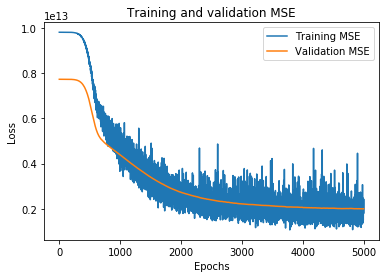

In [0]:
acc3 = history3.history['mean_absolute_error']
val_acc3 = history3.history['val_mean_absolute_error']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(acc3) + 1)

# "bo" es por "blue dot"
plt.plot(epochs, loss3, label='Training MSE')
# b es por "solid blue line"
plt.plot(epochs, val_loss3, label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

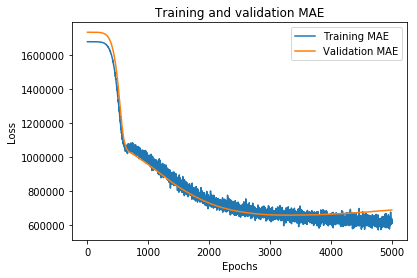

In [0]:
plt.plot(epochs, acc3, label='Training MAE')
# b es por "solid blue line"
plt.plot(epochs, val_acc3, label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
# Imprimimos el MAE obtenido esta vez.
test_mse_score, test_mae_score, test_r2 = model3.evaluate(X_test, y_test)
test_mae_score

510/510 [==============================] - 0s 71us/step


656475.1752450981